# Packages to install :

In [ ]:
pip install understat
pip install lazypredict dask dask[dataframe]
pip install scikit-learn
pip install smogn
pip install pulp
# Plus any of the necessary libraries listed below

# Imported Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import metrics
import os
from collections import Counter
import asyncio
import json
import aiohttp
import io
from understat import Understat
import nest_asyncio
import unicodedata
import math
import lazypredict
from lazypredict.Supervised import LazyRegressor
import dask.dataframe as dd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
import random
from random import sample
import smogn
import requests
from pulp import *
import random
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
nest_asyncio.apply()
pd.options.mode.chained_assignment = None
n_cores = joblib.cpu_count(only_physical_cores=True)

# Datasets to read :

In [ ]:
idmap = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FPL-ID-Map/Master.csv")
understatMap = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FPL-ID-Map/Understat.csv")

# Creating the datasets for each season

In [ ]:
# Dictionaries which map the name of a player to the teams that they played for during the season and the number of games they played for each team (only for players who played for multiple premier league teams)

transferMap2021 = {"Anwar El Ghazi" : ("19-19",0), "Bamidele Alli" : ("20-18",1), "Calum Chambers" : ("21-17",0), "Chris Wood" : ("16-22",0), "Dan Burn" : ("22-16",0), "Daniel James" : ("3-35",1),
                   "Donny van de Beek" : ("22-16",1), "Lucas Digne" : ("18-20", 1), "Matt Targett" : ("21-17",0), "Axel Tuanzebe" : ("19-19", 0)}

transferMap2022 = {"Albert Sambi Lokonga" : ("18-19",0) , "Anthony Gordon" : ("20-18",0) , "Chris Wood" : ("19-19",0) , "Craig Dawson" : ("18-20",0), "Cédric Alves Soares" : ("19-19",0) , "Daniel James" : ("5-33",1),
"Danny Ings" : ("19-19",0) , "Jack Stephens" : ("5-33",1) , "Jan Bednarek" : ("5-33",1) , "Jonjo Shelvey" : ("20-18",0) , "Jorge Luiz Frello Filho" : ("20-19",1) , "Leander Dendoncker" : ("5-33",1), "Leandro Trossard" : ("18-20",1),
"Morgan Gibbs-White" : ("2-36",1) , "Wesley Fofana" : ("5-33",1)}

transferMap2023 = {'Alex Iwobi' : ("4-34",0) , 'Armando Broja' : ("22-16",0), 'Brennan Johnson' : ("3-35",0), 'Cameron Archer' : ("1-37",0), 'Cole Palmer' : ("3-35",1), 'James McAtee' : ("3-35",0),
                   'Kalvin Phillips' : ("20-18",0), 'Matheus Luiz Nunes' : ("4-34",1), 'Neal Maupay' : ("4-34",1), 'Sergio Reguilón' : ("20-18",0), "David Datro Fofana" : ("21-17", 1)}

transferMap2024 = {"James Ward-Prowse" : ("3-21-5",1), "Joachim Andersen" : ("2-28", 0), "Jordan Ayew" : ("2-28", 0), "Odsonne Edouard" : ("3-27", 0), "Reiss Nelson" : ("3-27",0), "Axel Disasi" : ("24-6", 1), "Marcus Rashford" : ("24-6",1), "Evan Ferguson" : ("24-6",0),
                   "Julio Enciso" : ("22-8",0),"Trevoh Chalobah" : ("3-17-10",0), "Ben Chilwell" : ("25-5",0), "Jaden Philogene" : ("21-9", 0), "Ayden Heaven" : ("21-9", 0), "Carlos Alcaraz Durán" : ("23-7",1)}

all_transfer_map = [transferMap2021, transferMap2022, transferMap2023, transferMap2024]

In [ ]:
# Getting the win probabilities for each match from the betting odds

odds_21 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Match Odds/odds_data_21_22.csv")[["HomeTeam", "AwayTeam", "AvgH", "AvgA", "AvgD"]]
odds_22 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Match Odds/odds_data_22_23.csv")[["HomeTeam", "AwayTeam", "AvgH", "AvgA", "AvgD"]]
odds_23 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Match Odds/odds_data_23_24.csv")[["HomeTeam", "AwayTeam", "AvgH", "AvgA", "AvgD"]]
odds_24 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Match Odds/odds_data_24_25.csv")[["HomeTeam", "AwayTeam", "AvgH", "AvgA", "AvgD"]]

#Up to GW 30
odds_24.drop(odds_24.index[[i for i in range(299,308)]], inplace=True)

odds_21[["AvgH", "AvgA", "AvgD"]] = 1/(odds_21[["AvgH", "AvgA", "AvgD"]])
odds_21[["AvgH", "AvgA", "AvgD"]] = odds_21[["AvgH", "AvgA", "AvgD"]].div(odds_21[["AvgH", "AvgA", "AvgD"]].sum(axis=1), axis = 0)

odds_22[["AvgH", "AvgA", "AvgD"]] = 1/(odds_22[["AvgH", "AvgA", "AvgD"]])
odds_22[["AvgH", "AvgA", "AvgD"]] = odds_22[["AvgH", "AvgA", "AvgD"]].div(odds_22[["AvgH", "AvgA", "AvgD"]].sum(axis=1), axis = 0)

odds_23[["AvgH", "AvgA", "AvgD"]] = 1/(odds_23[["AvgH", "AvgA", "AvgD"]])
odds_23[["AvgH", "AvgA", "AvgD"]] = odds_23[["AvgH", "AvgA", "AvgD"]].div(odds_23[["AvgH", "AvgA", "AvgD"]].sum(axis=1), axis = 0)

odds_24[["AvgH", "AvgA", "AvgD"]] = 1/(odds_24[["AvgH", "AvgA", "AvgD"]])
odds_24[["AvgH", "AvgA", "AvgD"]] = odds_24[["AvgH", "AvgA", "AvgD"]].div(odds_24[["AvgH", "AvgA", "AvgD"]].sum(axis=1), axis = 0)

In [ ]:
team_dict = {"Nottingham Forest" : "Nott'm Forest", "Wolverhampton Wanderers" : "Wolves", "Newcastle United" : "Newcastle", "Manchester United" : "Man United", "Manchester City" : "Man City"}
team_odds = [odds_21, odds_22, odds_23, odds_24]

# Mapping each team to their ID on Understat

teamMap2021 = {"Chelsea" : ("80","CHE") , "Tottenham" : ("82","TOT") , "Leicester" : ("75", "LEI"), "West Ham" : ("81", "WHU") , "Wolverhampton Wanderers" : ("229", "WOL"),
           "Manchester United" : ("89", "MUN") , "Arsenal" : ("83", "ARS"), "Manchester City" : ("88", "MCI"), "Crystal Palace" : ("78", "CRY"),
           "Southampton" : ("74", "SOU"), "Leeds" : ("245", "LED"), "Everton" : ("72", "EVE"), "Aston Villa" : ("71", "AVL"), "Liverpool" : ("87", "LIV"),
            "Brighton" : ("220", "BRI"), "Brentford" : ("244", "BRE"), "Newcastle United" : ("86", "NEW"), "Burnley" : ("92","BUR"), "Watford" : ("90","WAT"), "Norwich" : ("79", "NOR")}

teamMap2022 = {"Chelsea" : ("80","CHE") , "Tottenham" : ("82","TOT") , "Leicester" : ("75", "LEI"), "West Ham" : ("81", "WHU") , "Wolverhampton Wanderers" : ("229", "WOL"),
           "Manchester United" : ("89", "MUN") , "Arsenal" : ("83", "ARS"), "Bournemouth" : ("73", "BOU"), "Manchester City" : ("88", "MCI"), "Crystal Palace" : ("78", "CRY"),
           "Fulham" : ("228", "FLH"), "Southampton" : ("74", "SOU"), "Leeds" : ("245", "LED"), "Everton" : ("72", "EVE"), "Aston Villa" : ("71", "AVL"), "Liverpool" : ("87", "LIV"),
            "Brighton" : ("220", "BRI"), "Brentford" : ("244", "BRE"), "Nottingham Forest" : ("249", "NOT"), "Newcastle United" : ("86", "NEW")}

teamMap2023 = {"Chelsea" : ("80","CHE") , "Tottenham" : ("82","TOT"), "West Ham" : ("81", "WHU") , "Wolverhampton Wanderers" : ("229", "WOL"),
           "Manchester United" : ("89", "MUN") , "Arsenal" : ("83", "ARS"), "Bournemouth" : ("73", "BOU"), "Manchester City" : ("88", "MCI"), "Crystal Palace" : ("78", "CRY"),
           "Fulham" : ("228", "FLH"), "Everton" : ("72", "EVE"), "Aston Villa" : ("71", "AVL"), "Liverpool" : ("87", "LIV"),
            "Brighton" : ("220", "BRI"), "Brentford" : ("244", "BRE"), "Nottingham Forest" : ("249", "NOT"), "Newcastle United" : ("86", "NEW"), "Sheffield United" : ("238","SHE"), "Burnley" : ("92","BUR"), "Luton" : ("256","LUT")}

teamMap2024 = {"Chelsea" : ("80","CHE") , "Tottenham" : ("82","TOT"), "West Ham" : ("81", "WHU") , "Wolverhampton Wanderers" : ("229", "WOL"),
           "Manchester United" : ("89", "MUN") , "Arsenal" : ("83", "ARS"), "Bournemouth" : ("73", "BOU"), "Manchester City" : ("88", "MCI"), "Crystal Palace" : ("78", "CRY"),
           "Fulham" : ("228", "FLH"), "Everton" : ("72", "EVE"), "Aston Villa" : ("71", "AVL"), "Liverpool" : ("87", "LIV"),
            "Brighton" : ("220", "BRI"), "Brentford" : ("244", "BRE"), "Nottingham Forest" : ("249", "NOT"), "Newcastle United" : ("86", "NEW"), "Southampton" : ("74", "SOU"), "Ipswich" : ("285", "IPS"), "Leicester" : ("75", "LEI")}

all_team_map = [teamMap2021, teamMap2022, teamMap2023, teamMap2024]


# Function to get team data for each season from understat

def getSeasonGames(team, season, home):
  async def main():
      async with aiohttp.ClientSession() as session:
          understat = Understat(session)
          print(team)
          if(home == "h"):
            results = await understat.get_team_results(team,season, side = "h")
            curr_odds = team_odds[season-2021]
            if(team in team_dict):
              curr_odds = curr_odds[curr_odds["HomeTeam"] == team_dict[team]]
            else:
              curr_odds = curr_odds[curr_odds["HomeTeam"] == team]
            winProb = list(curr_odds["AvgH"])
            drawProb = list(curr_odds["AvgD"])
          elif(home == "a"):
            results = await understat.get_team_results(team,season, side = "a")
            curr_odds = team_odds[season-2021]
            if(team in team_dict):
              curr_odds = curr_odds[curr_odds["AwayTeam"] == team_dict[team]]
            else:
              curr_odds = curr_odds[curr_odds["AwayTeam"] == team]
            winProb = list(curr_odds["AvgA"])
            drawProb = list(curr_odds["AvgD"])
          else:
            results = await understat.get_team_results(team,season)
            curr_odds = team_odds[season-2021]
            if(team in team_dict):
              curr_odds = curr_odds[(curr_odds["HomeTeam"] == team_dict[team]) | (curr_odds["AwayTeam"] == team_dict[team])]
            else:
              curr_odds = curr_odds[(curr_odds["HomeTeam"] == team) | (curr_odds["AwayTeam"] == team)]
            winProb = [curr_odds["AvgH"].iloc[i] if curr_odds["HomeTeam"].iloc[i] == team else curr_odds["AvgA"].iloc[i] for i in range(0,len(curr_odds))]
            drawProb = list(curr_odds["AvgD"])

          raw = pd.read_json(io.StringIO(json.dumps(results)))
          if(team == "Newcastle United" or team == "Leicester"):
            numGames = len(raw)
          else:
            numGames = len(raw)-1
          if(home == "h"):
            g_score = [raw["goals"].iloc[i]["h"] for i in range(0,numGames)]
            g_concede = [raw["goals"].iloc[i]["a"] for i in range(0,numGames)]
            xg_score = [raw["xG"].iloc[i]["h"] for i in range(0,numGames)]
            xg_concede = [raw["xG"].iloc[i]["a"] for i in range(0,numGames)]
            opposition_team = [raw["a"].iloc[i]["title"] for i in range(0,numGames)]
          elif(home == "a"):
            g_score = [raw["goals"].iloc[i]["a"] for i in range(0,numGames)]
            g_concede = [raw["goals"].iloc[i]["h"] for i in range(0,numGames)]
            xg_score = [raw["xG"].iloc[i]["a"] for i in range(0,numGames)]
            xg_concede = [raw["xG"].iloc[i]["h"] for i in range(0,numGames)]
            opposition_team = [raw["h"].iloc[i]["title"] for i in range(0,numGames)]
          else:
            g_score = [raw["goals"].iloc[i]["h"] if raw["h"].iloc[i]["title"] == team else raw["goals"].iloc[i]["a"] for i in range(0,numGames)]
            g_concede = [raw["goals"].iloc[i]["a"] if raw["h"].iloc[i]["title"] == team else raw["goals"].iloc[i]["h"] for i in range(0,numGames)]
            xg_score = [raw["xG"].iloc[i]["h"] if raw["h"].iloc[i]["title"] == team else raw["xG"].iloc[i]["a"] for i in range(0,numGames)]
            xg_concede = [raw["xG"].iloc[i]["a"] if raw["h"].iloc[i]["title"] == team else raw["xG"].iloc[i]["h"] for i in range(0,numGames)]
            opposition_team = [raw["a"].iloc[i]["title"] if raw["h"].iloc[i]["title"] == team else raw["h"].iloc[i]["title"] for i in range(0,numGames)]

          x = {"g_scored" : g_score, "g_conceded" : g_concede, "xG scored" : xg_score, "xG conceded" : xg_concede, "Win Probability" : winProb, "Draw Probability" : drawProb, "Opposition Team" : opposition_team}
          print(len(x["g_scored"]))
          df = pd.DataFrame(x)
          return df

  loop = asyncio.get_event_loop()
  return loop.run_until_complete(main())

# Get data for all teams in a given season

def generateSeasonGames(season):
  for team in all_team_map[season-2021]:
    fileNameHome = team + "_" +str(season) + "_home" + ".csv"
    fileNameAway = team + "_" + str(season) + "_away" + ".csv"
    fileNameAll = team + "_" + str(season) + "_all" + ".csv"
    home = getSeasonGames(team, season, "h")
    away = getSeasonGames(team, season, "a")
    all = getSeasonGames(team, season, "all")
    home.to_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{fileNameHome}")
    away.to_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{fileNameAway}")
    all.to_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{fileNameAll}")


In [ ]:
# A function which adds data about the opposition team for each game that each team plays in a given season

def add_opposition_data(season):
  for file in os.listdir(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/"):
    filename = os.fsdecode(file)
    if("all" in filename):
      print(filename)
      curr_team = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{filename}", index_col = 0)
      print(len(curr_team))
      for i in range(0, len(curr_team)):

        if(i == 0):
          curr_team["prev_opp_goals_scored"] = 0.0
          curr_team["prev_opp_goals_conceded"] = 0.0
          curr_team["prev_opp_xG_scored"] = 0.0
          curr_team["prev_opp_xG_conceded"] = 0.0

          curr_team["prev_3_opp_goals_scored"] = 0.0
          curr_team["prev_3_opp_goals_conceded"] = 0.0
          curr_team["prev_3_opp_xG_scored"] = 0.0
          curr_team["prev_3_opp_xG_conceded"] = 0.0

          curr_team["prev_5_opp_goals_scored"] = 0.0
          curr_team["prev_5_opp_goals_conceded"] = 0.0
          curr_team["prev_5_opp_xG_scored"] = 0.0
          curr_team["prev_5_opp_xG_conceded"] = 0.0

          curr_team["prev_10_opp_goals_scored"] = 0.0
          curr_team["prev_10_opp_goals_conceded"] = 0.0
          curr_team["prev_10_opp_xG_scored"] = 0.0
          curr_team["prev_10_opp_xG_conceded"] = 0.0

          curr_team["avg_opp_goals_scored"] = 0.0
          curr_team["avg_opp_goals_conceded"] = 0.0
          curr_team["avg_opp_xG_scored"] = 0.0
          curr_team["avg_opp_xG_conceded"] = 0.0

        else:
          opp_team = curr_team["Opposition Team"].iloc[i]
          opp_data = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{opp_team}_{season}_all.csv", index_col = 0)
          prev_goals_scored = opp_data["g_scored"].iloc[i-1] if i>0 else 0
          prev_goals_conceded = opp_data["g_conceded"].iloc[i-1] if i>0 else 0
          prev_xG_scored = opp_data["xG scored"].iloc[i-1] if i>0 else 0
          prev_xG_conceded = opp_data["xG conceded"].iloc[i-1] if i>0 else 0

          prev_3_goals_scored = np.mean(opp_data["g_scored"].iloc[i-3:i]) if i>2 else np.mean(opp_data["g_scored"].iloc[0:i])
          prev_3_goals_conceded = np.mean(opp_data["g_conceded"].iloc[i-3:i]) if i>2 else np.mean(opp_data["g_conceded"].iloc[0:i])
          prev_3_xG_scored = np.mean(opp_data["xG scored"].iloc[i-3:i]) if i>2 else np.mean(opp_data["xG scored"].iloc[0:i])
          prev_3_xG_conceded = np.mean(opp_data["xG conceded"].iloc[i-3:i]) if i>2 else np.mean(opp_data["xG conceded"].iloc[0:i])

          prev_5_goals_scored = np.mean(opp_data["g_scored"].iloc[i-5:i]) if i>4 else np.mean(opp_data["g_scored"].iloc[0:i])
          prev_5_goals_conceded = np.mean(opp_data["g_conceded"].iloc[i-5:i]) if i>4 else np.mean(opp_data["g_conceded"].iloc[0:i])
          prev_5_xG_scored = np.mean(opp_data["xG scored"].iloc[i-5:i]) if i>4 else np.mean(opp_data["xG scored"].iloc[0:i])
          prev_5_xG_conceded = np.mean(opp_data["xG conceded"].iloc[i-5:i]) if i>4 else np.mean(opp_data["xG conceded"].iloc[0:i])

          prev_10_goals_scored = np.mean(opp_data["g_scored"].iloc[i-10:i]) if i>9 else np.mean(opp_data["g_scored"].iloc[0:i])
          prev_10_goals_conceded = np.mean(opp_data["g_conceded"].iloc[i-10:i]) if i>9 else np.mean(opp_data["g_conceded"].iloc[0:i])
          prev_10_xG_scored = np.mean(opp_data["xG scored"].iloc[i-10:i]) if i>9 else np.mean(opp_data["xG scored"].iloc[0:i])
          prev_10_xG_conceded = np.mean(opp_data["xG conceded"].iloc[i-10:i]) if i>9 else np.mean(opp_data["xG conceded"].iloc[0:i])

          avg_goals_scored = np.mean(opp_data["g_scored"].iloc[0:i])
          avg_goals_conceded = np.mean(opp_data["g_conceded"].iloc[0:i])
          avg_xG_scored = np.mean(opp_data["xG scored"].iloc[0:i])
          avg_xG_conceded = np.mean(opp_data["xG conceded"].iloc[0:i])

          curr_team.at[i, "prev_opp_goals_scored"] = prev_goals_scored
          curr_team.at[i,"prev_opp_goals_conceded"] = prev_goals_conceded
          curr_team.at[i,"prev_opp_xG_scored"] = prev_xG_scored
          curr_team.at[i,"prev_opp_xG_conceded"] = prev_xG_conceded

          curr_team.at[i,"prev_3_opp_goals_scored"] = prev_3_goals_scored
          curr_team.at[i,"prev_3_opp_goals_conceded"] = prev_3_goals_conceded
          curr_team.at[i,"prev_3_opp_xG_scored"] = prev_3_xG_scored
          curr_team.at[i,"prev_3_opp_xG_conceded"] = prev_3_xG_conceded

          curr_team.at[i,"prev_5_opp_goals_scored"] = prev_5_goals_scored
          curr_team.at[i,"prev_5_opp_goals_conceded"] = prev_5_goals_conceded
          curr_team.at[i,"prev_5_opp_xG_scored"] = prev_5_xG_scored
          curr_team.at[i,"prev_5_opp_xG_conceded"] = prev_5_xG_conceded

          curr_team.at[i,"prev_10_opp_goals_scored"] = prev_10_goals_scored
          curr_team.at[i,"prev_10_opp_goals_conceded"] = prev_10_goals_conceded
          curr_team.at[i,"prev_10_opp_xG_scored"] = prev_10_xG_scored
          curr_team.at[i,"prev_10_opp_xG_conceded"] = prev_10_xG_conceded

          curr_team.at[i,"avg_opp_goals_scored"] = avg_goals_scored
          curr_team.at[i,"avg_opp_goals_conceded"] = avg_goals_conceded
          curr_team.at[i,"avg_opp_xG_scored"] = avg_xG_scored
          curr_team.at[i,"avg_opp_xG_conceded"] = avg_xG_conceded

      curr_team.to_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{filename}")

In [ ]:
# Function to get the statistics for the previous season that each player played in

async def get_prev_season_data(season, id):
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        grouped_stats = await understat.get_player_grouped_stats(id)
        player_matches = await understat.get_player_matches(id, season = str(season))
        teams = []
        a = (grouped_stats["season"])
        out = {}
        count = 0
        total_mins = 0
        total_games = 0
        for data in a:
          if(data["season"] == str(season)):
            #print(data)
            if(count > 0):
              teams.append(data["team"])
              for key in data:
                if(key in ["goals", "shots", "xG", "assists", "xA", "assists", "key_passes", "yellow", "red"]):
                    #print(data[key])
                    out[key] += float(data[key])
                elif(key == "time"):
                    out[key] += int(data[key])
              total_mins += int(data["time"])
              total_games += int(data["games"])
            else:
              count += 1
              teams.append(data["team"])
              for key in data:
                if(key in ["goals", "shots", "xG", "assists", "xA", "assists", "key_passes", "yellow", "red"]):
                    #print(data[key])
                    out[key] = float(data[key])
                elif(key == "time"):
                    out[key] = int(data[key])
              total_mins += int(data["time"])
              total_games += int(data["games"])

        clean_sheet_count = 0
        for game in player_matches:
          if(clean_sheet_count == 0):
            clean_sheet_count = 1
            out["clean_sheets"] = 0
          if((game["h_team"] in teams and game["a_team"] not in teams and game["a_goals"] == "0" and game["position"] != "Sub") or (game["a_team"] in teams and game["h_team"] not in teams and game["h_goals"] == "0" and game["position"] != "Sub")):
              out["clean_sheets"] += 1


        for key in out:
          if(key != "time" and key != "clean_sheets"):
            out[key] = out[key]*90/total_mins
          elif(key != "clean_sheets"):
            out[key] = out[key]/total_games
        if not out:
          return {"goals" : 0, "shots" : 0, "xG" : 0, "assists" : 0, "xA" : 0, "assists" : 0, "key_passes" : 0, "yellow" : 0, "red" : 0, "time" : 0, "clean_sheets" : 0}

        return out

In [ ]:
# This function uses the gw.csv file from Vastaav's repository and creates the gw_v2.csv file for each player

# Change to whatever season you are collecting data for
%cd /content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/2023-24/players

# Season is just one year which is the year that the season started e.g for 2022/23 use 2022

def getPlayerData(season):
  twoTeams = []
  # 2022-2023
  fullSeason = str(season) + "-" + str(season+1)
  # 2022-23
  shortHand = str(season) + "-" + str(season+1)[-2:]
  # 22-23
  short = str(season)[-2:] + "-" + str(season+1)[-2:]

  dir = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/"+shortHand+"/players/"
  directory = os.fsencode(dir)

  # Function to get all the players that played in the Premier League during a given season
  async def main():
    async with aiohttp.ClientSession() as session:
      understat = Understat(session)
      season_stats = await understat.get_league_players("epl", season)
      return pd.read_json(io.StringIO(json.dumps(season_stats)))
  loop = asyncio.get_event_loop()

  # store the above results of the function call
  df = loop.run_until_complete(main())

  # loop through each player
  for file in os.listdir(directory):
    filename = os.fsdecode(file)
    # player's fpl ID
    fplID = filename.split("_")[2]
    # player's name
    name = filename.split("_")[0] + " " + filename.split("_")[1]

    # players understat id
    id = idmap[idmap[short] == int(fplID)]["understat"].iloc[0] if not  idmap[idmap[short] == int(fplID)]["understat"].empty else float("nan")

    if(not math.isnan(id)):
      underStatID = int(id)
      # get the current player's understat data
      currPlayer = df[df["id"] == underStatID]

      if(not currPlayer.empty and ',' not in currPlayer["team_title"].iloc[0]): # filter players that didn't play any games in the season and didn't play for multiple teams
        # the name of the team that the player played for
        teamName = currPlayer["team_title"].iloc[0]
        # data for that player
        currDF = pd.read_csv(dir + "/" + filename + "/gw.csv")
        # store the team and position
        currDF["fpl_id"] = fplID
        currDF["Team"] = teamName
        currDF["Position"] = currPlayer["position"].iloc[0]

        # number of games that the player played for that team in the season
        numRows = currDF.shape[0]
        if(numRows < 39): # filter out in valid data

          if(season == 2024):
            # Accounts for the fact that Newcastle United and Crystal Palace have played one less game then everyone else at the time of collecting the data
            if(teamName == "Newcastle United" or teamName == "Crystal Palace"):
              prem_data_currTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{teamName}_{season}_all.csv").iloc[29-numRows:29]
            else:
              prem_data_currTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{teamName}_{season}_all.csv").iloc[30-numRows:30]

          else:
            prem_data_currTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{teamName}_{season}_all.csv").iloc[38-numRows:38]

          prem_data_currTeam_all.set_index(currDF.index, inplace = True)


          loop = asyncio.get_event_loop()
          prev_season_data = loop.run_until_complete(get_prev_season_data(season-1, underStatID))


          currDF["Win Probability"] = prem_data_currTeam_all["Win Probability"]
          currDF["Draw Probability"] =  prem_data_currTeam_all["Draw Probability"]
          currDF["Team xG scored"] = prem_data_currTeam_all["xG scored"]
          currDF["Team xG conceded"] = prem_data_currTeam_all["xG conceded"]
          currDF["Team Goals scored"] = prem_data_currTeam_all["g_scored"]
          currDF["Team Goals conceded"] = prem_data_currTeam_all["g_conceded"]

          currDF["prev_opp_goals_scored"] = prem_data_currTeam_all["prev_opp_goals_scored"]
          currDF["prev_opp_goals_conceded"] = prem_data_currTeam_all["prev_opp_goals_conceded"]
          currDF["prev_opp_xG_scored"] = prem_data_currTeam_all["prev_opp_xG_scored"]
          currDF["prev_opp_xG_conceded"] = prem_data_currTeam_all["prev_opp_xG_conceded"]
          currDF["prev_3_opp_goals_scored"] = prem_data_currTeam_all["prev_3_opp_goals_scored"]
          currDF["prev_3_opp_goals_conceded"] = prem_data_currTeam_all["prev_3_opp_goals_conceded"]
          currDF["prev_3_opp_xG_scored"] = prem_data_currTeam_all["prev_3_opp_xG_scored"]
          currDF["prev_3_opp_xG_conceded"] = prem_data_currTeam_all["prev_3_opp_xG_conceded"]
          currDF["prev_5_opp_goals_scored"] = prem_data_currTeam_all["prev_5_opp_goals_scored"]
          currDF["prev_5_opp_goals_conceded"] = prem_data_currTeam_all["prev_5_opp_goals_conceded"]
          currDF["prev_5_opp_xG_scored"] = prem_data_currTeam_all["prev_5_opp_xG_scored"]
          currDF["prev_5_opp_xG_conceded"] = prem_data_currTeam_all["prev_5_opp_xG_conceded"]
          currDF["prev_10_opp_goals_scored"] = prem_data_currTeam_all["prev_10_opp_goals_scored"]
          currDF["prev_10_opp_goals_conceded"] = prem_data_currTeam_all["prev_10_opp_goals_conceded"]
          currDF["prev_10_opp_xG_scored"] = prem_data_currTeam_all["prev_10_opp_xG_scored"]
          currDF["prev_10_opp_xG_conceded"] = prem_data_currTeam_all["prev_10_opp_xG_conceded"]
          currDF["avg_opp_goals_scored"] = prem_data_currTeam_all["avg_opp_goals_scored"]
          currDF["avg_opp_goals_conceded"] = prem_data_currTeam_all["avg_opp_goals_conceded"]
          currDF["avg_opp_xG_scored"] = prem_data_currTeam_all["avg_opp_xG_scored"]
          currDF["avg_opp_xG_conceded"] = prem_data_currTeam_all["avg_opp_xG_conceded"]

          currDF["prev_season_goals_scored"] = prev_season_data["goals"]
          currDF["prev_season_shots"] = prev_season_data["shots"]
          currDF["prev_season_xG"] = prev_season_data["xG"]
          currDF["prev_season_assists"] = prev_season_data["assists"]
          currDF["prev_season_xA"] = prev_season_data["xA"]
          currDF["prev_season_key_passes"] = prev_season_data["key_passes"]
          currDF["prev_season_yellow"] = prev_season_data["yellow"]
          currDF["prev_season_red"] = prev_season_data["red"]
          currDF["prev_season_mins"] = prev_season_data["time"]
          currDF["prev_season_clean_sheets"] = prev_season_data["clean_sheets"]

          currDF.to_csv(filename+"/gw_v2.csv")

      # players that played for multiple teams in a season
      elif(not currPlayer.empty and "," in currPlayer["team_title"].iloc[0]):
            twoTeams.append(name)

            currDF = pd.read_csv(dir + "/" + filename + "/gw.csv")

            numRows = currDF.shape[0]

            loop = asyncio.get_event_loop()
            prev_season_data = loop.run_until_complete(get_prev_season_data(season-1, underStatID))


            if(numRows < 39 or name == "Jorge Luiz Frello Filho"): # filter out in valid data

              # Rare case where a player goes on loan to another team and then returns to their original team in the same season
              if(len(all_transfer_map[season-2021][name][0].split("-")) == 3):
                numGamesFirstTeam = int(all_transfer_map[season-2021][name][0].split("-")[0])
                numGamesSecondTeam = int(all_transfer_map[season-2021][name][0].split("-")[1])
                numGamesThirdTeam = int(all_transfer_map[season-2021][name][0].split("-")[2])

                if(all_transfer_map[season-2021][name][1] == 0):
                  firstTeam = (currPlayer["team_title"].iloc[0].split(",")[0])
                  secondTeam = (currPlayer["team_title"].iloc[0].split(",")[1])
                  thirdTeam = firstTeam
                else:
                  firstTeam = (currPlayer["team_title"].iloc[0].split(",")[1])
                  print(firstTeam)
                  secondTeam = (currPlayer["team_title"].iloc[0].split(",")[0])
                  thirdTeam = firstTeam

                currDF_firstTeam = currDF.iloc[0:int(numGamesFirstTeam)] # get the data for the games that the player played for their first team
                currDF_firstTeam["Team"] = firstTeam
                currDF_firstTeam["Position"] = currPlayer["position"].iloc[0]

                currDF_secondTeam = currDF.iloc[int(numGamesFirstTeam):numGamesSecondTeam] # get the data for the game that the player played for their second team
                currDF_secondTeam["Team"] = secondTeam
                currDF_secondTeam["Position"] = currPlayer["position"].iloc[0]

                currDF_thirdTeam = currDF.iloc[int(numGamesSecondTeam):numRows] # get the data for the game that the player played for their second team
                currDF_thirdTeam["Team"] = thirdTeam
                currDF_thirdTeam["Position"] = currPlayer["position"].iloc[0]

                prem_data_firstTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{firstTeam}_{season}_all.csv", index_col = 0).iloc[0:int(numGamesFirstTeam)]

                # anomaly in 22/23 data
                if(name == "Jorge Luiz Frello Filho" and season == 2022):
                  prem_data_secondTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{secondTeam}_{season}_all.csv", index_col = 0).iloc[int(numGamesFirstTeam)-1:numRows]
                else:
                  prem_data_secondTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{secondTeam}_{season}_all.csv", index_col = 0).iloc[int(numGamesFirstTeam):int(numGamesSecondTeam)]

                #  anomaly in 24/25 data
                if(name == "Trevoh Chalobah" and season == 2024):
                  prem_data_thirdTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{thirdTeam}_{season}_all.csv", index_col = 0).iloc[int(numGamesSecondTeam):numRows]
                else:
                  prem_data_thirdTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{thirdTeam}_{season}_all.csv", index_col = 0).iloc[int(numGamesSecondTeam):numRows]

                prem_data_firstTeam_all.set_index(currDF_firstTeam.index, inplace = True)
                prem_data_secondTeam_all.set_index(currDF_secondTeam.index, inplace = True)
                prem_data_thirdTeam_all.set_index(currDF_thirdTeam.index, inplace = True)

                currDF_firstTeam["Win Probability"] = prem_data_firstTeam_all["Win Probability"]
                currDF_firstTeam["Draw Probability"] =  prem_data_firstTeam_all["Draw Probability"]
                currDF_firstTeam["Team xG scored"] = prem_data_firstTeam_all["xG scored"]
                currDF_firstTeam["Team xG conceded"] = prem_data_firstTeam_all["xG conceded"]
                currDF_firstTeam["Team Goals scored"] = prem_data_firstTeam_all["g_scored"]
                currDF_firstTeam["Team Goals conceded"] = prem_data_firstTeam_all["g_conceded"]

                currDF_secondTeam["Win Probability"] = prem_data_secondTeam_all["Win Probability"]
                currDF_secondTeam["Draw Probability"] =  prem_data_secondTeam_all["Draw Probability"]
                currDF_secondTeam["Team xG scored"] = prem_data_secondTeam_all["xG scored"]
                currDF_secondTeam["Team xG conceded"] = prem_data_secondTeam_all["xG conceded"]
                currDF_secondTeam["Team Goals scored"] = prem_data_secondTeam_all["g_scored"]
                currDF_secondTeam["Team Goals conceded"] = prem_data_secondTeam_all["g_conceded"]

                currDF_thirdTeam["Win Probability"] = prem_data_thirdTeam_all["Win Probability"]
                currDF_thirdTeam["Draw Probability"] =  prem_data_thirdTeam_all["Draw Probability"]
                currDF_thirdTeam["Team xG scored"] = prem_data_thirdTeam_all["xG scored"]
                currDF_thirdTeam["Team xG conceded"] = prem_data_thirdTeam_all["xG conceded"]
                currDF_thirdTeam["Team Goals scored"] = prem_data_thirdTeam_all["g_scored"]
                currDF_thirdTeam["Team Goals conceded"] = prem_data_thirdTeam_all["g_conceded"]

                currDF_firstTeam["prev_opp_goals_scored"] = prem_data_firstTeam_all["prev_opp_goals_scored"]
                currDF_firstTeam["prev_opp_goals_conceded"] = prem_data_firstTeam_all["prev_opp_goals_conceded"]
                currDF_firstTeam["prev_opp_xG_scored"] = prem_data_firstTeam_all["prev_opp_xG_scored"]
                currDF_firstTeam["prev_opp_xG_conceded"] = prem_data_firstTeam_all["prev_opp_xG_conceded"]
                currDF_firstTeam["prev_3_opp_goals_scored"] = prem_data_firstTeam_all["prev_3_opp_goals_scored"]
                currDF_firstTeam["prev_3_opp_goals_conceded"] = prem_data_firstTeam_all["prev_3_opp_goals_conceded"]
                currDF_firstTeam["prev_3_opp_xG_scored"] = prem_data_firstTeam_all["prev_3_opp_xG_scored"]
                currDF_firstTeam["prev_3_opp_xG_conceded"] = prem_data_firstTeam_all["prev_3_opp_xG_conceded"]
                currDF_firstTeam["prev_5_opp_goals_scored"] = prem_data_firstTeam_all["prev_5_opp_goals_scored"]
                currDF_firstTeam["prev_5_opp_goals_conceded"] = prem_data_firstTeam_all["prev_5_opp_goals_conceded"]
                currDF_firstTeam["prev_5_opp_xG_scored"] = prem_data_firstTeam_all["prev_5_opp_xG_scored"]
                currDF_firstTeam["prev_5_opp_xG_conceded"] = prem_data_firstTeam_all["prev_5_opp_xG_conceded"]
                currDF_firstTeam["prev_10_opp_goals_scored"] = prem_data_firstTeam_all["prev_10_opp_goals_scored"]
                currDF_firstTeam["prev_10_opp_goals_conceded"] = prem_data_firstTeam_all["prev_10_opp_goals_conceded"]
                currDF_firstTeam["prev_10_opp_xG_scored"] = prem_data_firstTeam_all["prev_10_opp_xG_scored"]
                currDF_firstTeam["prev_10_opp_xG_conceded"] = prem_data_firstTeam_all["prev_10_opp_xG_conceded"]
                currDF_firstTeam["avg_opp_goals_scored"] = prem_data_firstTeam_all["avg_opp_goals_scored"]
                currDF_firstTeam["avg_opp_goals_conceded"] = prem_data_firstTeam_all["avg_opp_goals_conceded"]
                currDF_firstTeam["avg_opp_xG_scored"] = prem_data_firstTeam_all["avg_opp_xG_scored"]
                currDF_firstTeam["avg_opp_xG_conceded"] = prem_data_firstTeam_all["avg_opp_xG_conceded"]

                currDF_secondTeam["prev_opp_goals_scored"] = prem_data_secondTeam_all["prev_opp_goals_scored"]
                currDF_secondTeam["prev_opp_goals_conceded"] = prem_data_secondTeam_all["prev_opp_goals_conceded"]
                currDF_secondTeam["prev_opp_xG_scored"] = prem_data_secondTeam_all["prev_opp_xG_scored"]
                currDF_secondTeam["prev_opp_xG_conceded"] = prem_data_secondTeam_all["prev_opp_xG_conceded"]
                currDF_secondTeam["prev_3_opp_goals_scored"] = prem_data_secondTeam_all["prev_3_opp_goals_scored"]
                currDF_secondTeam["prev_3_opp_goals_conceded"] = prem_data_secondTeam_all["prev_3_opp_goals_conceded"]
                currDF_secondTeam["prev_3_opp_xG_scored"] = prem_data_secondTeam_all["prev_3_opp_xG_scored"]
                currDF_secondTeam["prev_3_opp_xG_conceded"] = prem_data_secondTeam_all["prev_3_opp_xG_conceded"]
                currDF_secondTeam["prev_5_opp_goals_scored"] = prem_data_secondTeam_all["prev_5_opp_goals_scored"]
                currDF_secondTeam["prev_5_opp_goals_conceded"] = prem_data_secondTeam_all["prev_5_opp_goals_conceded"]
                currDF_secondTeam["prev_5_opp_xG_scored"] = prem_data_secondTeam_all["prev_5_opp_xG_scored"]
                currDF_secondTeam["prev_5_opp_xG_conceded"] = prem_data_secondTeam_all["prev_5_opp_xG_conceded"]
                currDF_secondTeam["prev_10_opp_goals_scored"] = prem_data_secondTeam_all["prev_10_opp_goals_scored"]
                currDF_secondTeam["prev_10_opp_goals_conceded"] = prem_data_secondTeam_all["prev_10_opp_goals_conceded"]
                currDF_secondTeam["prev_10_opp_xG_scored"] = prem_data_secondTeam_all["prev_10_opp_xG_scored"]
                currDF_secondTeam["prev_10_opp_xG_conceded"] = prem_data_secondTeam_all["prev_10_opp_xG_conceded"]
                currDF_secondTeam["avg_opp_goals_scored"] = prem_data_secondTeam_all["avg_opp_goals_scored"]
                currDF_secondTeam["avg_opp_goals_conceded"] = prem_data_secondTeam_all["avg_opp_goals_conceded"]
                currDF_secondTeam["avg_opp_xG_scored"] = prem_data_secondTeam_all["avg_opp_xG_scored"]
                currDF_secondTeam["avg_opp_xG_conceded"] = prem_data_secondTeam_all["avg_opp_xG_conceded"]

                currDF_thirdTeam["prev_opp_goals_scored"] = prem_data_thirdTeam_all["prev_opp_goals_scored"]
                currDF_thirdTeam["prev_opp_goals_conceded"] = prem_data_thirdTeam_all["prev_opp_goals_conceded"]
                currDF_thirdTeam["prev_opp_xG_scored"] = prem_data_thirdTeam_all["prev_opp_xG_scored"]
                currDF_thirdTeam["prev_opp_xG_conceded"] = prem_data_thirdTeam_all["prev_opp_xG_conceded"]
                currDF_thirdTeam["prev_3_opp_goals_scored"] = prem_data_thirdTeam_all["prev_3_opp_goals_scored"]
                currDF_thirdTeam["prev_3_opp_goals_conceded"] = prem_data_thirdTeam_all["prev_3_opp_goals_conceded"]
                currDF_thirdTeam["prev_3_opp_xG_scored"] = prem_data_thirdTeam_all["prev_3_opp_xG_scored"]
                currDF_thirdTeam["prev_3_opp_xG_conceded"] = prem_data_thirdTeam_all["prev_3_opp_xG_conceded"]
                currDF_thirdTeam["prev_5_opp_goals_scored"] = prem_data_thirdTeam_all["prev_5_opp_goals_scored"]
                currDF_thirdTeam["prev_5_opp_goals_conceded"] = prem_data_thirdTeam_all["prev_5_opp_goals_conceded"]
                currDF_thirdTeam["prev_5_opp_xG_scored"] = prem_data_thirdTeam_all["prev_5_opp_xG_scored"]
                currDF_thirdTeam["prev_5_opp_xG_conceded"] = prem_data_thirdTeam_all["prev_5_opp_xG_scored"]
                currDF_thirdTeam["prev_10_opp_goals_scored"] = prem_data_thirdTeam_all["prev_10_opp_goals_scored"]
                currDF_thirdTeam["prev_10_opp_goals_conceded"] = prem_data_thirdTeam_all["prev_10_opp_goals_conceded"]
                currDF_thirdTeam["prev_10_opp_xG_scored"] = prem_data_thirdTeam_all["prev_10_opp_xG_scored"]
                currDF_thirdTeam["prev_10_opp_xG_scored"] = prem_data_thirdTeam_all["prev_10_opp_xG_conceded"]
                currDF_thirdTeam["avg_opp_goals_scored"] = prem_data_thirdTeam_all["avg_opp_goals_scored"]
                currDF_thirdTeam["avg_opp_goals_conceded"] = prem_data_thirdTeam_all["avg_opp_goals_conceded"]
                currDF_thirdTeam["avg_opp_xG_scored"] = prem_data_thirdTeam_all["avg_opp_xG_scored"]
                currDF_thirdTeam["avg_opp_xG_conceded"] = prem_data_thirdTeam_all["avg_opp_xG_conceded"]

                currDF = pd.concat([currDF_firstTeam, currDF_secondTeam, currDF_thirdTeam], axis = 0).sort_index()

                currDF["prev_season_goals_scored"] = prev_season_data["goals"]
                currDF["prev_season_shots"] = prev_season_data["shots"]
                currDF["prev_season_xG"] = prev_season_data["xG"]
                currDF["prev_season_assists"] = prev_season_data["assists"]
                currDF["prev_season_xA"] = prev_season_data["xA"]
                currDF["prev_season_key_passes"] = prev_season_data["key_passes"]
                currDF["prev_season_yellow"] = prev_season_data["yellow"]
                currDF["prev_season_red"] = prev_season_data["red"]
                currDF["prev_season_mins"] = prev_season_data["time"]
                currDF["prev_season_clean_sheets"] = prev_season_data["clean_sheets"]
                currDF["fpl_id"] = fplID
                currDF.to_csv(filename+"/gw_v2.csv")

              else:
                numGamesFirstTeam = int(all_transfer_map[season-2021][name][0].split("-")[0])
                numGamesSecondTeam = int(all_transfer_map[season-2021][name][0].split("-")[1])

                if(all_transfer_map[season-2021][name][1] == 0):
                  firstTeam = (currPlayer["team_title"].iloc[0].split(",")[0])
                  secondTeam = (currPlayer["team_title"].iloc[0].split(",")[1])
                else:
                  firstTeam = (currPlayer["team_title"].iloc[0].split(",")[1])
                  secondTeam = (currPlayer["team_title"].iloc[0].split(",")[0])

                currDF_firstTeam = currDF.iloc[0:int(numGamesFirstTeam)] # get the data for the games that the player played for their first team
                currDF_firstTeam["Team"] = firstTeam
                currDF_firstTeam["Position"] = currPlayer["position"].iloc[0]
                currDF_secondTeam = currDF.iloc[int(numGamesFirstTeam):numRows] # get the data for the game that the player played for their second team
                currDF_secondTeam["Team"] = secondTeam
                currDF_secondTeam["Position"] = currPlayer["position"].iloc[0]

                prem_data_firstTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{firstTeam}_{season}_all.csv", index_col = 0).iloc[0:int(numGamesFirstTeam)]

                # anomaly in 22/23 data
                if(name == "Jorge Luiz Frello Filho" and season == 2022):
                  prem_data_secondTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{secondTeam}_{season}_all.csv", index_col = 0).iloc[int(numGamesFirstTeam)-1:numRows]
                elif(name == "Carlos Alcaraz Durán" and season == 2024):
                  prem_data_secondTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{secondTeam}_{season}_all.csv", index_col = 0).iloc[int(numGamesFirstTeam)-1:numRows]
                else:
                  prem_data_secondTeam_all = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{season} DATA/{secondTeam}_{season}_all.csv", index_col = 0).iloc[int(numGamesFirstTeam):numRows]

                prem_data_firstTeam_all.set_index(currDF_firstTeam.index, inplace = True)
                prem_data_secondTeam_all.set_index(currDF_secondTeam.index, inplace = True)


                currDF_firstTeam["Win Probability"] = prem_data_firstTeam_all["Win Probability"]
                currDF_firstTeam["Draw Probability"] =  prem_data_firstTeam_all["Draw Probability"]
                currDF_firstTeam["Team xG scored"] = prem_data_firstTeam_all["xG scored"]
                currDF_firstTeam["Team xG conceded"] = prem_data_firstTeam_all["xG conceded"]
                currDF_firstTeam["Team Goals scored"] = prem_data_firstTeam_all["g_scored"]
                currDF_firstTeam["Team Goals conceded"] = prem_data_firstTeam_all["g_conceded"]

                currDF_secondTeam["Win Probability"] = prem_data_secondTeam_all["Win Probability"]
                currDF_secondTeam["Draw Probability"] =  prem_data_secondTeam_all["Draw Probability"]
                currDF_secondTeam["Team xG scored"] = prem_data_secondTeam_all["xG scored"]
                currDF_secondTeam["Team xG conceded"] = prem_data_secondTeam_all["xG conceded"]
                currDF_secondTeam["Team Goals scored"] = prem_data_secondTeam_all["g_scored"]
                currDF_secondTeam["Team Goals conceded"] = prem_data_secondTeam_all["g_conceded"]

                currDF_firstTeam["prev_opp_goals_scored"] = prem_data_firstTeam_all["prev_opp_goals_scored"]
                currDF_firstTeam["prev_opp_goals_conceded"] = prem_data_firstTeam_all["prev_opp_goals_conceded"]
                currDF_firstTeam["prev_opp_xG_scored"] = prem_data_firstTeam_all["prev_opp_xG_scored"]
                currDF_firstTeam["prev_opp_xG_conceded"] = prem_data_firstTeam_all["prev_opp_xG_conceded"]
                currDF_firstTeam["prev_3_opp_goals_scored"] = prem_data_firstTeam_all["prev_3_opp_goals_scored"]
                currDF_firstTeam["prev_3_opp_goals_conceded"] = prem_data_firstTeam_all["prev_3_opp_goals_conceded"]
                currDF_firstTeam["prev_3_opp_xG_scored"] = prem_data_firstTeam_all["prev_3_opp_xG_scored"]
                currDF_firstTeam["prev_3_opp_xG_conceded"] = prem_data_firstTeam_all["prev_3_opp_xG_conceded"]
                currDF_firstTeam["prev_5_opp_goals_scored"] = prem_data_firstTeam_all["prev_5_opp_goals_scored"]
                currDF_firstTeam["prev_5_opp_goals_conceded"] = prem_data_firstTeam_all["prev_5_opp_goals_conceded"]
                currDF_firstTeam["prev_5_opp_xG_scored"] = prem_data_firstTeam_all["prev_5_opp_xG_scored"]
                currDF_firstTeam["prev_5_opp_xG_conceded"] = prem_data_firstTeam_all["prev_5_opp_xG_conceded"]
                currDF_firstTeam["prev_10_opp_goals_scored"] = prem_data_firstTeam_all["prev_10_opp_goals_scored"]
                currDF_firstTeam["prev_10_opp_goals_conceded"] = prem_data_firstTeam_all["prev_10_opp_goals_conceded"]
                currDF_firstTeam["prev_10_opp_xG_scored"] = prem_data_firstTeam_all["prev_10_opp_xG_scored"]
                currDF_firstTeam["prev_10_opp_xG_conceded"] = prem_data_firstTeam_all["prev_10_opp_xG_conceded"]
                currDF_firstTeam["avg_opp_goals_scored"] = prem_data_firstTeam_all["avg_opp_goals_scored"]
                currDF_firstTeam["avg_opp_goals_conceded"] = prem_data_firstTeam_all["avg_opp_goals_conceded"]
                currDF_firstTeam["avg_opp_xG_scored"] = prem_data_firstTeam_all["avg_opp_xG_scored"]
                currDF_firstTeam["avg_opp_xG_conceded"] = prem_data_firstTeam_all["avg_opp_xG_conceded"]

                currDF_secondTeam["prev_opp_goals_scored"] = prem_data_secondTeam_all["prev_opp_goals_scored"]
                currDF_secondTeam["prev_opp_goals_conceded"] = prem_data_secondTeam_all["prev_opp_goals_conceded"]
                currDF_secondTeam["prev_opp_xG_scored"] = prem_data_secondTeam_all["prev_opp_xG_scored"]
                currDF_secondTeam["prev_opp_xG_conceded"] = prem_data_secondTeam_all["prev_opp_xG_conceded"]
                currDF_secondTeam["prev_3_opp_goals_scored"] = prem_data_secondTeam_all["prev_3_opp_goals_scored"]
                currDF_secondTeam["prev_3_opp_goals_conceded"] = prem_data_secondTeam_all["prev_3_opp_goals_conceded"]
                currDF_secondTeam["prev_3_opp_xG_scored"] = prem_data_secondTeam_all["prev_3_opp_xG_scored"]
                currDF_secondTeam["prev_3_opp_xG_conceded"] = prem_data_secondTeam_all["prev_3_opp_xG_conceded"]
                currDF_secondTeam["prev_5_opp_goals_scored"] = prem_data_secondTeam_all["prev_5_opp_goals_scored"]
                currDF_secondTeam["prev_5_opp_goals_conceded"] = prem_data_secondTeam_all["prev_5_opp_goals_conceded"]
                currDF_secondTeam["prev_5_opp_xG_scored"] = prem_data_secondTeam_all["prev_5_opp_xG_scored"]
                currDF_secondTeam["prev_5_opp_xG_conceded"] = prem_data_secondTeam_all["prev_5_opp_xG_conceded"]
                currDF_secondTeam["prev_10_opp_goals_scored"] = prem_data_secondTeam_all["prev_10_opp_goals_scored"]
                currDF_secondTeam["prev_10_opp_goals_conceded"] = prem_data_secondTeam_all["prev_10_opp_goals_conceded"]
                currDF_secondTeam["prev_10_opp_xG_scored"] = prem_data_secondTeam_all["prev_10_opp_xG_scored"]
                currDF_secondTeam["prev_10_opp_xG_conceded"] = prem_data_secondTeam_all["prev_10_opp_xG_conceded"]
                currDF_secondTeam["avg_opp_goals_scored"] = prem_data_secondTeam_all["avg_opp_goals_scored"]
                currDF_secondTeam["avg_opp_goals_conceded"] = prem_data_secondTeam_all["avg_opp_goals_conceded"]
                currDF_secondTeam["avg_opp_xG_scored"] = prem_data_secondTeam_all["avg_opp_xG_scored"]
                currDF_secondTeam["avg_opp_xG_conceded"] = prem_data_secondTeam_all["avg_opp_xG_conceded"]


                currDF = pd.concat([currDF_firstTeam, currDF_secondTeam], axis = 0).sort_index()

                currDF["prev_season_goals_scored"] = prev_season_data["goals"]
                currDF["prev_season_shots"] = prev_season_data["shots"]
                currDF["prev_season_xG"] = prev_season_data["xG"]
                currDF["prev_season_assists"] = prev_season_data["assists"]
                currDF["prev_season_xA"] = prev_season_data["xA"]
                currDF["prev_season_key_passes"] = prev_season_data["key_passes"]
                currDF["prev_season_yellow"] = prev_season_data["yellow"]
                currDF["prev_season_red"] = prev_season_data["red"]
                currDF["prev_season_mins"] = prev_season_data["time"]
                currDF["prev_season_clean_sheets"] = prev_season_data["clean_sheets"]
                currDF["fpl_id"] = fplID
                currDF.to_csv(filename+"/gw_v2.csv")

# **Adding key passes and shots to the dataset**

In [ ]:
understat21_22 = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/2021-22/understat"
players_21_22 = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/2021-22/players"
understat22_23 = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/2022-23/understat"
players22_23 = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/2022-23/players"
understat23_24 = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/2023-24/understat"
players23_24 = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/2023-24/players"
understat24_25 = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/2024-25/understat"
players24_25 = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/2024-25/players"

In [ ]:
# dictionaries for players which played for multiple premier league teams in a season

transferMap2021_teams = {"Anwar El Ghazi" : ("Aston Villa", "Everton"), "Dele Alli" : ("Tottenham", "Everton"), "Calum Chambers" : ("Arsenal", "Aston Villa"), "Chris Wood" : ("Burnley", "Newcastle United"),
                         "Dan Burn" : ("Brighton","Newcastle United"), "Daniel James" : ("Leeds", "Manchester United"), "Donny van de Beek" : ("Manchester United","Everton"), "Lucas Digne" : ("Everton", "Aston Villa"), "Matt Targett" : ("Aston Villa", "Newcastle United"), "Axel Tuanzebe" : ("Aston Villa", "Manchester United")}

transferMap2022_teams = {"Albert Sambi Lokonga" : ("Crystal Palace", "Arsenal") , "Anthony Gordon" : ("Newcastle United", "Everton") , "Chris Wood" : ("Nottingham Forest", "Newcastle United") , "Craig Dawson" : ("West Ham", "Wolverhampton Wanderers"), "Cédric Soares" : ("Arsenal", "Fulham") , "Daniel James" : ("Leeds", "Fulham"),
"Danny Ings" : ("Aston Villa", "West Ham") , "Jack Stephens" : ("Southampton", "Bournemouth") , "Jan Bednarek" : ("Southampton", "Aston Villa") , "Jonjo Shelvey" : ("Nottingham Forest", "Newcastle United") , "Jorginho" : ("Chelsea", "Arsenal") , "Leander Dendoncker" : ("Wolverhampton Wanderers", "Aston Villa"), "Leandro Trossard" : ("Arsenal", "Brighton"),
"Morgan Gibbs-White" : ("Wolverhampton Wanderers", "Nottingham Forest") , "Wesley Fofana" : ("Leicester", "Chelsea")}

transferMap2023_teams = {'Alex Iwobi' : ("Everton", "Fulham") , 'Armando Broja' : ("Fulham", "Chelsea"), 'Brennan Johnson' : ("Nottingham Forest", "Tottenham"), 'Cameron Archer' : ("Aston Villa", "Sheffield United"), 'Cole Palmer' : ("Chelsea", "Manchester City"), 'James McAtee' : ("Manchester City", "Sheffield United"),
                   'Kalvin Phillips' : ("West Ham", "Manchester City"), 'Matheus Nunes' : ("Wolverhampton Wanderers", "Manchester City"), 'Neal Maupay' : ("Everton", "Brentford"), 'Sergio Reguilón' : ("Tottenham", "Manchester United"), "David Datro Fofana" : ("Chelsea", "Burnley")}

transferMap2024_teams = {"James Ward-Prowse" : ("Nottingham Forest", "West Ham"), "Joachim Andersen" : ("Crystal Palace", "Fulham"), "Jordan Ayew" : ("Crystal Palace", "Leicester"), "Odsonne Edouard" : ("Crystal Palace", "Leicester"), "Reiss Nelson" : ("Arsenal", "Fulham"),
                    "Axel Disasi" : ("Chelsea", "Aston Villa"), "Marcus Rashford" : ("Manchester United", "Aston Villa"), "Evan Ferguson" : ("Brighton", "West Ham"),
                    "Julio Enciso" : ("Brighton", "Ipswich"),"Trevoh Chalobah" : ("Chelsea", "Crystal Palace"), "Ben Chilwell" : ("Chelsea","Crystal Palace"), "Jaden Philogene-Bidace" : ("Aston Villa", "Ipswich"), "Ayden Heaven" : ("Arsenal", "Manchester United"), "Carlos Alcaraz" : ("Southampton", "Everton")}

In [ ]:
all_understat = [understat21_22, understat22_23, understat23_24, understat24_25]
all_players = [players_21_22, players22_23, players23_24, players24_25]
all_transfer_map_teams = [transferMap2021_teams, transferMap2022_teams, transferMap2023_teams, transferMap2024_teams]

In [ ]:
# used to map players not in the idmap fpl ids to their understat ids
player_map = {13066: 628, 13133: 266, 13301: 304, 13206: 629, 13239 : 460, 13060 : 473, 13134: 467, 13242 : 687, 13156 : 561, 13222 : 107, 13302 : 606, 11763 : 732, 12880 : 734, 13392 : 731, 13387 : 730, 13403 : 718, 3387 : 618, 13380 : 733}

In [ ]:
# A function to get the shots and key passes data for each player from understat

def shots_key_passes(season):
  season_long = season+"-"+str(int(season[2:])+1)
  season_short = season[2:]+"-"+str(int(season[2:])+1)
  for file in os.listdir(all_understat[int(season)-2021]):
    print(file)
    curr_df = pd.read_csv(all_understat[int(season)-2021] + "/" + file, index_col = 0)
    curr_df = curr_df[curr_df["season"] == int(season)]

    if(curr_df.empty):
      continue

    x = file.count("_")
    name = " ".join(file.split("_")[:-1])
    print(name)
    understat_id = file.split("_")[x][:-4]

    if(idmap[idmap["understat"] == int(understat_id)][season_short].empty):
      fpl_id = player_map[int(understat_id)]
      for file in os.listdir(all_players[int(season)-2021]):
        if(str(fpl_id) == file.split("_")[2]):
          path = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/"+season_long+"/players/"+file+"/gw_v2.csv"

    elif(not math.isnan(idmap[idmap["understat"] == int(understat_id)][season_short].iloc[0]) and not curr_df.empty):
      fpl_id = int(idmap[idmap["understat"] == int(understat_id)][season_short].iloc[0])
      for file in os.listdir(all_players[int(season)-2021]):
        if(str(fpl_id) == file.split("_")[2]):
          path = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/"+season_long+"/players/"+file+"/gw_v2.csv"

      try:
        new_df = pd.read_csv(path, index_col = 0)
      except:
        continue

      team = new_df["Team"].iloc[0]

      if(name in all_transfer_map_teams[int(season)-2021]):
        print(name)
        team1 = all_transfer_map_teams[int(season)-2021][name][0]
        team2 = all_transfer_map_teams[int(season)-2021][name][1]
        if(season != "2021"):
          shots_kp = curr_df[(curr_df["season"] == int(season)) & ((curr_df["h_team"] == team1) | (curr_df["a_team"] == team1) | (curr_df["h_team"] == team2) | (curr_df["a_team"] == team2))][["shots","key_passes"]]
        else:
          shots_kp_xG_xA = curr_df[(curr_df["season"] == int(season)) & ((curr_df["h_team"] == team1) | (curr_df["a_team"] == team1) | (curr_df["h_team"] == team2) | (curr_df["a_team"] == team2))][["shots","key_passes","xG", "xA"]]
      else:
        if(season != "2021"):
          shots_kp = curr_df[(curr_df["season"] == int(season)) & ((curr_df["h_team"] == team) | (curr_df["a_team"] == team))][["shots","key_passes"]]
        else:
          shots_kp_xG_xA = curr_df[(curr_df["season"] == int(season)) & ((curr_df["h_team"] == team) | (curr_df["a_team"] == team))][["shots","key_passes","xG","xA"]]
      played_games = new_df[new_df["minutes"]>0]
      # reverse the order of the rows in the dataframe
      if(season != "2021"):
        shots_kp = shots_kp.iloc[::-1]
        shots_kp.index = played_games.index
        new_df[["shots","key_passes"]] = shots_kp
        new_df.fillna(0.0, inplace= True)
      else:
        shots_kp_xG_xA = shots_kp_xG_xA.iloc[::-1]
        shots_kp_xG_xA.index = played_games.index
        new_df[["shots","key_passes","expected_goals","expected_assists"]] = shots_kp_xG_xA
        new_df.fillna(0.0, inplace= True)
      new_df.to_csv(path)


## Function to generate the dataset for a given season

In [ ]:
def generateSeasonData(season):
  fullSeason = str(season) + "-" + str(season+1)[-2:]

  dir = "/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/" + fullSeason + "/players/"
  directory = os.fsencode(dir)

  # All the features in the dataset
  allData = pd.DataFrame(columns = ['Name','fpl_id', 'Team', 'GW' , "Date", 'goals', 'assists' , 'clean_sheet_kept', 'saves_made', 'bonus_scored' , 'mins_played', 'G_90', 'G_90_prev' , 'G_90_prev_3',
                                    'G_90_prev_5' , 'G_90_prev_10' ,'xG_90','xG_prev', 'xG_prev_3' , 'xG_prev_5' , 'xG_prev_10' , 'shots_90', 'shots_90_prev', 'shots_90_prev_3', 'shots_90_prev_5', 'shots_90_prev_10',
                                    'A_90', 'A_90_prev' , 'A_90_prev_3' , 'A_90_prev_5' , 'A_90_prev_10' ,'xA_90', 'xA_90_prev' , 'xA_90_prev_3', 'xA_90_prev_5', 'xA_90_prev_10' , 'kp_90', 'kp_prev', 'kp_prev_3', 'kp_prev_5', 'kp_prev_10' , 'team_goals',
                                    'team_concede' , 'mins' , 'mins_prev' , 'mins_prev_3' , 'mins_prev_5' ,'mins_prev_10' , 'yellow_cards' , 'red_cards' , 'was_home' , 'ict', 'ict_prev', 'ict_prev_3', 'ict_prev_5', 'ict_prev_10', 'bonus', 'bonus_prev' , 'bonus_prev_3', 'bonus_prev_5', 'bonus_prev_10' ,'saves', 'saves_prev' , 'saves_prev_3' ,
                                    'saves_prev_5' , 'saves_prev_10' ,'clean_sheets', 'clean_sheets_prev', 'clean_sheets_prev_3' , 'clean_sheets_prev_5', 'clean_sheets_prev_10' ,'transfers_in' , 'transfers_out' , 'total_points' , 'average_points' , 'position' ,
                                    'win_prob', 'draw_prob', 'team_xG_scored','team_xG_scored_prev_3','team_xG_scored_prev_5', 'team_xG_scored_prev_10' ,'team_xG_conceded', 'team_xG_conceded_prev_3', 'team_xG_conceded_prev_5',
                                    'team_xG_conceded_prev_10','team_goals_scored', 'team_goals_scored_prev_3'  ,'team_goals_scored_prev_5', 'team_goals_scored_prev_10' , 'team_goals_conceded', 'team_goals_conceded_prev_3', 'team_goals_conceded_prev_5', 'team_goals_conceded_prev_10',
                                    'prev_opp_goals_scored', 'prev_3_opp_goals_scored', 'prev_5_opp_goals_scored', 'prev_10_opp_goals_scored', 'prev_opp_goals_conceded', 'prev_3_opp_goals_conceded', 'prev_5_opp_goals_conceded', 'prev_10_opp_goals_conceded',
                                    'prev_opp_xG_scored', 'prev_3_opp_xG_scored', 'prev_5_opp_xG_scored', 'prev_10_opp_xG_scored', 'prev_opp_XG_conceded', 'prev_3_opp_xG_conceded', 'prev_5_opp_xG_conceded', 'prev_10_opp_xG_conceded',
                                    'avg_opp_goals_scored', 'avg_opp_goals_conceded', 'avg_opp_xG_scored', 'avg_opp_xG_conceded', 'prev_season_goals', 'prev_season_shots', 'prev_season_xG', 'prev_season_assists', 'prev_season_xA',
                                    'prev_season_key_passes', 'prev_season_yellow', 'prev_season_red', 'prev_season_mins', 'prev_season_clean_sheets'])

  # Iterate over all players
  for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if(os.path.exists(dir + filename + "/gw_v2.csv")):
      curr = pd.read_csv(dir + filename + "/gw_v2.csv")
      k = allData.shape[0] # number of rows
      name = filename.split("_")[0] + " " + filename.split("_")[1]
      for i in range(0, curr.shape[0]):

        if(i == 0):
          gw = curr["round"].iloc[i]
          team = curr["Team"].iloc[i]
          #print(team)
          fplID = curr["fpl_id"].iloc[i]
          goals = np.int64(curr.at[i, 'goals_scored'])
          assists = np.int64(curr.at[i, 'assists'])
          clean_sheet_kept = np.int64(curr.at[i, 'clean_sheets'])
          bonus_scored = np.int64(curr.at[i, 'bonus'])
          mins_played_curr = np.int64(curr.at[i, 'minutes'])
          saves_made = np.int64(curr.at[i, 'saves'])
          minsPlayed = curr['minutes'].sum()
          date = curr['kickoff_time'].iloc[i]
          home = np.float64(1) if curr.at[i, "was_home"] == True else np.float64(0)
          transfersIn = np.int64(curr.at[i, 'transfers_in'])
          transfersOut = np.int64(curr.at[i, 'transfers_out'])
          winProb = np.float64(curr.at[i, 'Win Probability'])
          drawProb = np.float64(curr.at[i, 'Draw Probability'])
          position = curr["Position"].iloc[i]
          total_points = np.int64(curr.at[i, 'total_points'])

          prev_season_goals = np.int64(curr.at[i, 'prev_season_goals_scored'])
          prev_season_shots = np.int64(curr.at[i, 'prev_season_shots'])
          prev_season_xG = np.float64(curr.at[i, 'prev_season_xG'])
          prev_season_assists = np.int64(curr.at[i, 'prev_season_assists'])
          prev_season_xA = np.float64(curr.at[i, 'prev_season_xA'])
          prev_season_key_passes = np.int64(curr.at[i, 'prev_season_key_passes'])
          prev_season_yellow = np.int64(curr.at[i, 'prev_season_yellow'])
          prev_season_red = np.int64(curr.at[i, 'prev_season_red'])
          prev_season_mins = np.int64(curr.at[i, 'prev_season_mins'])
          prev_season_clean_sheets = np.int64(curr.at[i, 'prev_season_clean_sheets'])

          g, xG, a, xA, shots, key_passes, teamGoal, teamConcede, mins, mins_prev, mins_prev_3, mins_prev_5, mins_prev_10, yellow, red, ict, ict_prev, ict_prev_3, ict_prev_5, ict_prev_10, bonus, bonus_prev, bonus_prev_3, bonus_prev_5, bonus_prev_10, saves, saves_prev, saves_prev_3, saves_prev_5, saves_prev_10, cleanSheets, cleanSheets_prev, cleanSheets_prev_3,\
          cleanSheets_prev_5, cleanSheets_prev_10, average_points, G_prev, G_prev_3, G_prev_5, G_prev_10, xG_prev, xG_prev_3, xG_prev_5, xG_prev_10, A_prev, A_prev_3, A_prev_5, A_prev_10, xA_prev, xA_prev_3,\
          xA_prev_5, xA_prev_10, kp_prev, kp_prev_3, kp_prev_5, kp_prev_10, shots_prev, shots_prev_3, shots_prev_5, shots_prev_10, team_xG_scored, team_xG_scored_prev_3, team_xG_scored_prev_5, team_xG_scored_prev_10, team_goals_scored, team_goals_scored_prev_3, team_goals_scored_prev_5,\
          team_goals_scored_prev_10, team_goals_conceded, team_goals_conceded_prev_3, team_goals_conceded_prev_5, team_goals_conceded_prev_10, team_xG_conceded, team_xG_conceded_prev_3, team_xG_conceded_prev_5, team_xG_conceded_prev_10,\
          prev_opp_goals_scored, prev_3_opp_goals_scored, prev_5_opp_goals_scored, prev_10_opp_goals_scored, prev_opp_goals_conceded, prev_3_opp_goals_conceded, prev_5_opp_goals_conceded, prev_10_opp_goals_conceded, prev_opp_xG_scored, prev_3_opp_xG_scored,\
          prev_5_opp_xG_scored, prev_10_opp_xG_scored, prev_opp_xG_conceded, prev_3_opp_xG_conceded, prev_5_opp_xG_conceded, prev_10_opp_xG_conceded, avg_opp_goals_scored, avg_opp_goals_conceded, avg_opp_xG_scored, avg_opp_xG_conceded = \
          0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
        else:

          # Aggregate all features over previous 1,3,5 and 10 games

          filtered = curr[0:i]
          team = curr["Team"].iloc[i]
          gw = curr["round"].iloc[i]
          fplID = curr["fpl_id"].iloc[i]
          goals = np.int64(curr.at[i, 'goals_scored'])
          assists = np.int64(curr.at[i, 'assists'])
          clean_sheet_kept = np.int64(curr.at[i, 'clean_sheets'])
          bonus_scored = np.int64(curr.at[i, 'bonus'])
          mins_played_curr = np.int64(curr.at[i, 'minutes'])
          saves_made = np.int64(curr.at[i, 'saves'])
          minsPlayed = filtered['minutes'].sum()
          g = filtered['goals_scored'].sum()*90/minsPlayed if minsPlayed != 0 else 0
          xG = filtered['expected_goals'].sum()*90/minsPlayed if minsPlayed != 0 else 0
          a = filtered['assists'].sum()*90/minsPlayed if minsPlayed != 0 else 0
          xA = filtered['expected_assists'].sum()*90/minsPlayed if minsPlayed != 0 else 0
          shots = filtered['shots'].sum()*90/minsPlayed if minsPlayed !=0 else 0
          key_passes = filtered['key_passes'].sum()*90/minsPlayed if minsPlayed !=0 else 0
          homeGames = filtered[filtered['was_home'] == True]
          awayGames = filtered[filtered['was_home'] == False]
          teamGoal = (homeGames['team_h_score'].sum()+awayGames['team_a_score'].sum())/(filtered.shape[0])
          teamConcede = (homeGames['team_a_score'].sum()+awayGames['team_h_score'].sum())/(filtered.shape[0])
          mins = filtered['minutes'].mean()
          yellow = filtered['yellow_cards'].sum()*90/minsPlayed if minsPlayed != 0 else 0
          red = filtered['red_cards'].sum()*90/minsPlayed if minsPlayed != 0 else 0
          home = np.float64(1) if curr.at[i, "was_home"] == True else np.float64(0)
          ict = filtered['ict_index'].sum()*90/minsPlayed if minsPlayed != 0 else 0
          date = curr['kickoff_time'].iloc[i]

          prev_game = curr.iloc[i-1]
          prev_3_game = curr.iloc[i-3:i-1] if i>3 else filtered
          prev_5_game = curr.iloc[i-5:i-1] if i>5 else filtered
          prev_10_game = curr.iloc[i-10:i-1] if i>10 else filtered

          mins_prev_sum = prev_game['minutes'].sum()
          mins_prev_3_sum = prev_3_game['minutes'].sum() if i > 3 else minsPlayed
          mins_prev_5_sum = prev_5_game['minutes'].sum() if i > 5 else minsPlayed
          mins_prev_10_sum = prev_10_game['minutes'].sum() if i > 10 else minsPlayed

          mins_prev = prev_game['minutes'].mean()
          mins_prev_3 = prev_3_game['minutes'].mean() if i > 3 else mins
          mins_prev_5 = prev_5_game['minutes'].mean() if i > 5 else mins
          mins_prev_10 = prev_10_game['minutes'].mean() if i > 10 else mins

          ict_prev = prev_game['ict_index'].sum()*90/mins_prev_sum if mins_prev_sum != 0 else 0
          ict_prev_3 = prev_3_game['ict_index'].sum()*90/mins_prev_3_sum if mins_prev_3_sum != 0 else 0
          ict_prev_5 = prev_5_game['ict_index'].sum()*90/mins_prev_5_sum if mins_prev_5_sum != 0 else 0
          ict_prev_10 = prev_10_game['ict_index'].sum()*90/mins_prev_10_sum if mins_prev_10_sum != 0 else 0

          bonus = filtered['bonus'].sum()*90/minsPlayed if minsPlayed != 0 else 0
          bonus_prev = prev_game['bonus'].sum()*90/mins_prev_sum if mins_prev_sum != 0 else 0
          bonus_prev_3 = prev_3_game['bonus'].sum()*90/mins_prev_3_sum if mins_prev_3_sum != 0 else 0
          bonus_prev_5 = prev_5_game['bonus'].sum()*90/mins_prev_5_sum if mins_prev_5_sum != 0 else 0
          bonus_prev_10 = prev_10_game['bonus'].sum()*90/mins_prev_10_sum if mins_prev_10_sum != 0 else 0

          saves = np.float64(filtered['saves'].mean())
          saves_prev = prev_game["saves"].sum()
          saves_prev_3 = prev_3_game["saves"].mean() if i > 3 else saves
          saves_prev_5 = prev_5_game["saves"].mean() if i > 5 else saves
          saves_prev_10 = prev_10_game["saves"].mean() if i > 10 else saves

          cleanSheets = np.int64(filtered['clean_sheets'].mean())
          cleanSheets_prev = prev_game["clean_sheets"].sum()
          cleanSheets_prev_3 = prev_3_game["clean_sheets"].sum() if i > 3 else cleanSheets
          cleanSheets_prev_5 = prev_5_game["clean_sheets"].sum() if i > 5 else cleanSheets
          cleanSheets_prev_10 = prev_10_game["clean_sheets"].sum() if i > 10 else cleanSheets

          transfersIn = np.int64(curr.at[i, 'transfers_in'])
          transfersOut = np.int64(curr.at[i, 'transfers_out'])
          total_points = np.int64(curr.at[i, 'total_points'])
          average_points = np.float64(filtered['total_points'].mean())

          G_prev = prev_game["goals_scored"]*90/mins_prev_sum if mins_prev_sum != 0 else 0
          G_prev_3 = prev_3_game["goals_scored"].sum()*90/mins_prev_3_sum if mins_prev_3_sum != 0 else 0
          G_prev_5 = prev_5_game["goals_scored"].sum()*90/mins_prev_5_sum if mins_prev_5_sum != 0 else 0
          G_prev_10 = prev_10_game["goals_scored"].sum()*90/mins_prev_10_sum if mins_prev_10_sum != 0 else 0

          xG_prev = prev_game["expected_goals"]*90/mins_prev_sum if mins_prev_sum != 0 else 0
          xG_prev_3 = prev_3_game["expected_goals"].sum()*90/mins_prev_3_sum if mins_prev_3_sum != 0 else 0
          xG_prev_5 = prev_5_game["expected_goals"].sum()*90/mins_prev_5_sum if mins_prev_5_sum != 0 else 0
          xG_prev_10 = prev_10_game["expected_goals"].sum()*90/mins_prev_10_sum  if mins_prev_10_sum != 0 else 0

          shots_prev = prev_game["shots"]*90/mins_prev_sum if mins_prev_sum != 0 else 0
          shots_prev_3 = prev_game["shots"].sum()*90/mins_prev_3_sum if mins_prev_3_sum != 0 else 0
          shots_prev_5 = prev_game["shots"].sum()*90/mins_prev_5_sum if mins_prev_5_sum != 0 else 0
          shots_prev_10 = prev_game["shots"].sum()*90/mins_prev_10_sum if mins_prev_10_sum != 0 else 0

          A_prev = prev_game["assists"]*90/mins_prev if mins_prev_sum != 0 else 0
          A_prev_3 = prev_3_game["assists"].sum()*90/mins_prev_3_sum if mins_prev_3_sum != 0 else 0
          A_prev_5 = prev_5_game["assists"].sum()*90/mins_prev_5_sum if mins_prev_5_sum != 0 else 0
          A_prev_10 = prev_10_game["assists"].sum()*90/mins_prev_10_sum if mins_prev_10_sum != 0 else 0

          xA_prev = prev_game["expected_assists"]*90/mins_prev_sum if mins_prev_sum != 0 else 0
          xA_prev_3 = prev_3_game["expected_assists"].sum()*90/mins_prev_3_sum if mins_prev_3_sum != 0 else 0
          xA_prev_5 = prev_5_game["expected_assists"].sum()*90/mins_prev_5_sum if mins_prev_5_sum != 0 else 0
          xA_prev_10 = prev_10_game["expected_assists"].sum()*90/mins_prev_10_sum if mins_prev_10_sum != 0 else 0

          kp_prev = prev_game["key_passes"]*90/mins_prev_sum if mins_prev_sum !=0 else 0
          kp_prev_3 = prev_3_game["key_passes"].sum()*90/mins_prev_3_sum if mins_prev_3_sum != 0 else 0
          kp_prev_5 = prev_5_game["key_passes"].sum()*90/mins_prev_5_sum if mins_prev_5_sum != 0 else 0
          kp_prev_10 = prev_10_game["key_passes"].sum()*90/mins_prev_10_sum if mins_prev_10_sum !=0 else 0

          winProb = curr.at[i, 'Win Probability']
          drawProb = curr.at[i, 'Draw Probability']
          team_xG_scored = filtered["Team xG scored"].mean()
          team_xG_scored_prev_3 = prev_3_game["Team xG scored"].mean()
          team_xG_scored_prev_5 = prev_5_game["Team xG scored"].mean()
          team_xG_scored_prev_10 = prev_10_game["Team xG scored"].mean()
          team_xG_conceded = filtered["Team xG conceded"].mean()
          team_xG_conceded_prev_3 = prev_3_game["Team xG conceded"].mean()
          team_xG_conceded_prev_5 = prev_5_game["Team xG conceded"].mean()
          team_xG_conceded_prev_10 = prev_10_game["Team xG conceded"].mean()
          team_goals_scored = filtered["Team Goals scored"].mean()
          team_goals_scored_prev_3 = prev_3_game["Team Goals scored"].mean()
          team_goals_scored_prev_5 = prev_5_game["Team Goals scored"].mean()
          team_goals_scored_prev_10 = prev_10_game["Team Goals scored"].mean()
          team_goals_conceded = filtered["Team Goals conceded"].mean()
          team_goals_conceded_prev_3 = prev_3_game["Team Goals conceded"].mean()
          team_goals_conceded_prev_5 = prev_5_game["Team Goals conceded"].mean()
          team_goals_conceded_prev_10 = prev_10_game["Team Goals conceded"].mean()

          prev_opp_goals_scored = curr.at[i, 'prev_opp_goals_scored']
          prev_3_opp_goals_scored = curr.at[i, 'prev_3_opp_goals_scored']
          prev_5_opp_goals_scored = curr.at[i, 'prev_5_opp_goals_scored']
          prev_10_opp_goals_scored = curr.at[i, 'prev_10_opp_goals_scored']

          prev_opp_goals_conceded = curr.at[i, 'prev_opp_goals_conceded']
          prev_3_opp_goals_conceded = curr.at[i, 'prev_3_opp_goals_conceded']
          prev_5_opp_goals_conceded = curr.at[i, 'prev_5_opp_goals_conceded']
          prev_10_opp_goals_conceded = curr.at[i, 'prev_10_opp_goals_conceded']

          prev_opp_xG_scored = curr.at[i, 'prev_opp_xG_scored']
          prev_3_opp_xG_scored = curr.at[i, 'prev_3_opp_xG_scored']
          prev_5_opp_xG_scored = curr.at[i, 'prev_5_opp_xG_scored']
          prev_10_opp_xG_scored = curr.at[i, 'prev_10_opp_xG_scored']

          prev_opp_xG_conceded = curr.at[i, 'prev_opp_xG_conceded']
          prev_3_opp_xG_conceded = curr.at[i, 'prev_3_opp_xG_conceded']
          prev_5_opp_xG_conceded = curr.at[i, 'prev_5_opp_xG_conceded']
          prev_10_opp_xG_conceded = curr.at[i, 'prev_10_opp_xG_conceded']

          avg_opp_goals_scored = curr.at[i, 'avg_opp_goals_scored']
          avg_opp_goals_conceded = curr.at[i, 'avg_opp_goals_conceded']
          avg_opp_xG_scored = curr.at[i, 'avg_opp_xG_scored']
          avg_opp_xG_conceded = curr.at[i, 'avg_opp_xG_conceded']

          prev_season_goals = curr.at[i, 'prev_season_goals_scored']
          prev_season_shots = curr.at[i, 'prev_season_shots']
          prev_season_xG = curr.at[i, 'prev_season_xG']
          prev_season_assists = curr.at[i, 'prev_season_assists']
          prev_season_xA = curr.at[i, 'prev_season_xA']
          prev_season_key_passes = curr.at[i, 'prev_season_key_passes']
          prev_season_yellow = curr.at[i, 'prev_season_yellow']
          prev_season_red = curr.at[i, 'prev_season_red']
          prev_season_mins = curr.at[i, 'prev_season_mins']
          prev_season_clean_sheets = curr.at[i, 'prev_season_clean_sheets']

          position = curr.at[i, "Position"]



        allData = pd.concat([allData, pd.DataFrame([{"Name" : name, 'fpl_id' : fplID, "Team" : team, "GW" : gw, "goals" : goals, "Date" : date ,"G_90" : g, "G_90_prev" : G_prev, "G_90_prev_3" : G_prev_3, "G_90_prev_5" : G_prev_5, "G_90_prev_10" : G_prev_10, "xG_90" : xG,
                                                                  "xG_prev" : xG_prev , "xG_prev_3": xG_prev_3 , "xG_prev_5" : xG_prev_5 , "xG_prev_10" : xG_prev_10 , "shots_90" : shots, "shots_90_prev" : shots_prev,
                                                                  "shots_90_prev_3" : shots_prev_3, "shots_90_prev_5" : shots_prev_5, "shots_90_prev_10" : shots_prev_10, "assists" : assists,
                                                                  "A_90" : a, "A_90_prev" : A_prev, "A_90_prev_3" : A_prev_3, "A_90_prev_5" : A_prev_5, "A_90_prev_10" : A_prev_10 , "xA_90" : xA, "xA_90_prev" : xA_prev,
                                                                  "xA_90_prev_3" : xA_prev_3, "xA_90_prev_5" : xA_prev_5, "xA_90_prev_10" : xA_prev_10 ,
                                                                  "kp_90" : key_passes, "kp_prev" : kp_prev, "kp_prev_3" : kp_prev_3, "kp_prev_5" : kp_prev_5, "kp_prev_10" : kp_prev_10,
                                                                  "team_goals" : teamGoal, "team_concede" : teamConcede, "mins_played" : mins_played_curr, "mins" : mins, "mins_prev" : mins_prev, "mins_prev_3" : mins_prev_3 , "mins_prev_5" : mins_prev_5 , "mins_prev_10" : mins_prev_10,
                                                                  "yellow_cards" : yellow, "red_cards" : red, "was_home" : home,"ict" : ict, "ict_prev" : ict_prev, "ict_prev_3" : ict_prev_3, "ict_prev_5" : ict_prev_5, "ict_prev_10" : ict_prev_10, "bonus_scored" : bonus_scored, "bonus" : bonus,
                                                                  "bonus_prev" : bonus_prev, "bonus_prev_3" : bonus_prev_3, "bonus_prev_5" : bonus_prev_5, "bonus_prev_10" : bonus_prev_10, "saves_made" : saves_made, "saves" : saves, "saves_prev" : saves_prev,
                                                                  "saves_prev_3" : saves_prev_3, "saves_prev_5" : saves_prev_5, "saves_prev_10" : saves_prev_10,"clean_sheet_kept" : clean_sheet_kept ,"clean_sheets" : cleanSheets, "clean_sheets_prev" : cleanSheets_prev, "clean_sheets_prev_3" : cleanSheets_prev_3,
                                                                  "clean_sheets_prev_5" : cleanSheets_prev_5 , "clean_sheets_prev_10" : cleanSheets_prev_10, "transfers_in" : transfersIn, "transfers_out" : transfersOut,
                                                                  "total_points" : total_points, "average_points" : average_points,"position" : position , "win_prob" : winProb,
                                                                  "draw_prob" : drawProb,'team_xG_scored' : team_xG_scored,'team_xG_scored_prev_3' : team_xG_scored_prev_3,'team_xG_scored_prev_5' : team_xG_scored_prev_5, 'team_xG_scored_prev_10' : team_xG_scored_prev_10,
                                                                  'team_xG_conceded' : team_xG_conceded, 'team_xG_conceded_prev_3' : team_xG_conceded_prev_3, 'team_xG_conceded_prev_5' : team_xG_conceded_prev_5,
                                                                  'team_xG_conceded_prev_10' : team_xG_conceded_prev_10, 'team_goals_scored' : team_goals_scored, 'team_goals_scored_prev_3' : team_goals_scored_prev_3 ,'team_goals_scored_prev_5' : team_goals_scored_prev_5,
                                                                  'team_goals_scored_prev_10' : team_goals_scored_prev_10 , 'team_goals_conceded' : team_goals_conceded, 'team_goals_conceded_prev_3' : team_goals_conceded_prev_3,  'team_goals_conceded_prev_5' : team_goals_conceded_prev_5, 'team_goals_conceded_prev_10' : team_goals_conceded_prev_10,
                                                                  'prev_opp_goals_scored' : prev_opp_goals_scored, 'prev_3_opp_goals_scored' : prev_3_opp_goals_scored, 'prev_5_opp_goals_scored' : prev_5_opp_goals_scored,
                                                                  'prev_10_opp_goals_scored' : prev_10_opp_goals_scored, 'prev_opp_goals_conceded' : prev_opp_goals_conceded, 'prev_3_opp_goals_conceded' : prev_3_opp_goals_conceded, 'prev_5_opp_goals_conceded' : prev_5_opp_goals_conceded, 'prev_10_opp_goals_conceded' : prev_10_opp_goals_conceded,
                                                                  'prev_opp_xG_scored' : prev_opp_xG_scored, 'prev_3_opp_xG_scored' : prev_3_opp_xG_scored, 'prev_5_opp_xG_scored' : prev_5_opp_xG_scored, 'prev_10_opp_xG_scored' : prev_10_opp_xG_scored,
                                                                  'prev_opp_XG_conceded' : prev_opp_xG_conceded, 'prev_3_opp_xG_conceded' : prev_3_opp_xG_conceded, 'prev_5_opp_xG_conceded' : prev_5_opp_xG_conceded, 'prev_10_opp_xG_conceded' : prev_10_opp_xG_conceded,
                                                                  'avg_opp_goals_scored' : avg_opp_goals_scored, 'avg_opp_goals_conceded' : avg_opp_goals_conceded, 'avg_opp_xG_scored' : avg_opp_xG_scored, 'avg_opp_xG_conceded' : avg_opp_xG_conceded, 'prev_season_goals' : prev_season_goals,
                                                                  'prev_season_shots' : prev_season_shots, 'prev_season_xG' : prev_season_xG, 'prev_season_assists' : prev_season_assists, 'prev_season_xA' : prev_season_xA,
                                                                  'prev_season_key_passes' : prev_season_key_passes, 'prev_season_yellow' : prev_season_yellow, 'prev_season_red' : prev_season_red, 'prev_season_mins' : prev_season_mins, 'prev_season_clean_sheets' : prev_season_clean_sheets}])], ignore_index = True)

  return allData

## Data for the all seasons :

In [ ]:
allData2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllData2021.csv')

allData2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllData2022.csv')

allData2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllData2023.csv')

allData2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllData2024.csv')

## Adding player positions to each dataset

In [ ]:
allDataList = [allData2021, allData2022, allData2023, allData2024]

In [ ]:
# Function to add the player positions to the dataset
def addPositions(year):
  season = year + "-" + str(int(year[-2:])+1)
  path = f"/content/drive/MyDrive/Colab Notebooks/Fantasy-Premier-League-Copy/data/{season}/cleaned_players.csv"
  player_data = pd.read_csv(path)

  x = player_data["first_name"] + " " + player_data["second_name"]
  for index, row in x.items():
    row = unicodedata.normalize('NFC', row)

  name_to_position = dict(zip(x, player_data["element_type"]))
  print(name_to_position)

  allDataList[int(year)-2021]["Name"] = allDataList[int(year)-2021]["Name"].map(lambda x: unicodedata.normalize('NFC', x))
  allDataList[int(year)-2021]["position"] = allDataList[int(year)-2021]["Name"].map(name_to_position)

  # Remove invalid data
  if(year == "2023"):
    allData2023.dropna(axis = 0, inplace = True)
    allData2023.to_csv('/content/drive/MyDrive/Colab Notebooks/AllData2023.csv', index=False)


Converting player positons to numerical values :

In [ ]:
allData2021_normalisedPos = allData2021.copy()
allData2021_normalisedPos["position"] = allData2021["position"].map({"GK" : 1, "DEF" : 2, "MID" : 3, "FWD" : 4})
allData2021_normalisedPos.to_csv('/content/drive/MyDrive/Colab Notebooks/AllData2021_normalisedPos.csv')

In [ ]:
allData2022_normalisedPos = allData2022.copy()
allData2022_normalisedPos["position"] = allData2022["position"].map({"GK" : 1, "DEF" : 2, "MID" : 3, "FWD" : 4})
allData2022_normalisedPos.to_csv('/content/drive/MyDrive/Colab Notebooks/AllData2022_normalisedPos.csv')


In [ ]:
allData2023_normalisedPos = allData2023.copy()
allData2023_normalisedPos["position"] = allData2023["position"].map({"GK" : 1, "DEF" : 2, "MID" : 3, "FWD" : 4})
allData2023_normalisedPos.to_csv('/content/drive/MyDrive/Colab Notebooks/AllData2023_normalisedPos.csv')

In [ ]:
allData2021_2022_2023_normalisedPos_new = pd.concat([allData2021_normalisedPos, allData2022_normalisedPos, allData2023_normalisedPos], axis = 0, ignore_index = True).reset_index(drop = True)
allData2021_2022_2023_normalisedPos_new.to_csv('/content/drive/MyDrive/Colab Notebooks/AllData2021_2022_2023_normalisedPos.csv')

In [ ]:
allData2024_normalisedPos = allData2024.copy()
allData2024_normalisedPos["position"] = allData2024["position"].map({"GK" : 1, "DEF" : 2, "MID" : 3, "FWD" : 4})
allData2024_normalisedPos.to_csv('/content/drive/MyDrive/Colab Notebooks/AllData2024_normalisedPos.csv')

In [ ]:
allData_normalisedPos = pd.concat([allData2021_normalisedPos, allData2022_normalisedPos, allData2023_normalisedPos, allData2024_normalisedPos], axis = 0).reset_index()
allData_normalisedPos.to_csv('/content/drive/MyDrive/Colab Notebooks/AllData_normalisedPos.csv')

# Getting player's web names

In [ ]:
name_map = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FPL-ID-Map/Master.csv")

def get_web_name(season):
    if(season == "21-22"):
        allData2021_normalisedPos["Web Name"] = list(map(lambda x: name_map[name_map["21-22"] == x]["web_name"].iloc[0], allData2021_normalisedPos["fpl_id"]))
        allData2021_normalisedPos.to_csv("/content/drive/MyDrive/Colab Notebooks/AllData2021_normalisedPos.csv")
    elif(season == "22-23"):
        allData2022_normalisedPos["Web Name"] = list(map(lambda x: name_map[name_map["22-23"] == x]["web_name"].iloc[0], allData2022_normalisedPos["fpl_id"]))
        allData2022_normalisedPos.to_csv("/content/drive/MyDrive/Colab Notebooks/AllData2022_normalisedPos.csv")
    elif(season == "23-24"):
        allData2023_normalisedPos["Web Name"] = list(map(lambda x: name_map[name_map["23-24"] == x]["web_name"].iloc[0], allData2023_normalisedPos["fpl_id"]))
        allData2023_normalisedPos.to_csv("/content/drive/MyDrive/Colab Notebooks/AllData2023_normalisedPos.csv")
    else:
        allData2024_normalisedPos["Web Name"] = list(map(lambda x: name_map[name_map["24-25"] == x]["web_name"].iloc[0], allData2024_normalisedPos["fpl_id"]))
        allData2024_normalisedPos.to_csv("/content/drive/MyDrive/Colab Notebooks/AllData2024_normalisedPos.csv")

Reading the created datasets :

In [ ]:
allData2021_normalisedPos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllData2021_normalisedPos.csv', index_col = 0)
allData2022_normalisedPos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllData2022_normalisedPos.csv', index_col = 0)
allData2023_normalisedPos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllData2023_normalisedPos.csv', index_col = 0)
allData2021_2022_2023_normalisedPos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllData2021_2022_2023_normalisedPos.csv', index_col = 0)
allData2024_normalisedPos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllData2024_normalisedPos.csv', index_col = 0)
allData_normalisedPos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllData_normalisedPos.csv', index_col = 0)
smogn_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/smogn_data.csv', index_col = 0)
rus_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rus_dataset.csv', index_col = 0)
allTeamData2021_2022_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllTeamData2021_2022_2023.csv', index_col = 0)
allTeamData2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllTeamData2024.csv', index_col = 0)

## Distribution of total points within dataset :

In [ ]:
points = Counter(allData2021_2022_2023_normalisedPos["total_points"])
x = points.keys()
y = points.values()

plt.bar(x,y)
plt.xlabel("Fantasy points achieved by player")
plt.ylabel("Frequency")
plt.title("Distribution of Total Points")
plt.show()

## Model Hyperparameter Tuning

Gradient Boosting Regressor

In [ ]:
shuffled_data = allData2021_2022_2023_normalisedPos.sample(frac = 1, random_state = 0)
labels = shuffled_data["total_points"]
data = shuffled_data.drop(columns = ["total_points", "Name", "GW", "index", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])
reg = HistGradientBoostingRegressor(random_state=0)
#Initial parameters tested
initial_parameters = {"learning_rate" : [0.025, 0.05, 0.1, 0.2, 0.4, 0.8], "max_iter" : [50, 100, 150, 200, 250, 300], "max_bins" : [190,200,210,220,230,240,255], "min_samples_leaf" : [20,40,60,80,100]}
# More refined testing
parameters = {"learning_rate" : [0.01, 0.02, 0.025], "max_iter" : [250], "max_bins" : [255], "min_samples_leaf" : [100,200,300,400,500]}
cv = GridSearchCV(reg, parameters, cv = 5, n_jobs=n_cores)
cv.fit(data, labels)
# print(cv.best_score_)
# print(cv.best_params_)

Random Forest

In [ ]:
reg2 = RandomForestRegressor(random_state=0, n_jobs = n_cores)
# Initial paraemeters
initial_parameters_2 = {"n_estimators" : [70,80,90,100,110,120,130], "min_samples_split" : [20, 40, 60, 80, 100]}
# More refined testing
parameters2 = {"n_estimators" : [120], "min_samples_split" : [100,200,300,400,500]}
cv2 = GridSearchCV(reg2, parameters2, cv = 5, n_jobs = n_cores)
cv2.fit(data, labels)
# print(cv2.best_score_)
# print(cv2.best_params_)

Model Testing and Training Functions

In [ ]:
def test_gb_reg(train, test, isSmogn):
  gb_reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 255, max_iter = 250, min_samples_leaf = 300)

  labels = train["total_points"]

  if(not isSmogn):
    data = train.drop(columns = ["total_points", "Name", "Team", "GW", "index", 'goals', 'assists', 'clean_sheet_kept', 'saves_made', 'bonus_scored', 'mins_played', 'fpl_id'])
  else:
    data = train.drop(columns = ["total_points",'goals', 'assists', 'clean_sheet_kept', 'saves_made', 'bonus_scored', 'mins_played'])

  X_train = data
  y_train = labels
  y_test = test["total_points"]
  X_test = test.drop(columns = ["total_points", "Name", "GW", "Team", 'goals', 'assists', 'clean_sheet_kept', 'saves_made', 'bonus_scored', 'mins_played', 'fpl_id'])


  gb_reg.fit(X_train, y_train)
  pred = gb_reg.predict(X_test)


  pred_round = np.round(pred)
  y_arr = y_test.to_numpy()

  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(35,15))
  ConfusionMatrixDisplay.from_predictions(y_arr, pred_round, ax=ax1)
  ax1.set_title("Confusion Matrix for Histogram Gradient Boosting Regression")
  ax1.set_xlabel("Predicted Points")
  ax1.set_ylabel("Actual Points")


  unique_vals = np.unique(np.concatenate((pred_round, y_arr)))
  cm = confusion_matrix(y_arr, pred_round, normalize = "pred")
  cm_rounded = np.round(cm, 2)
  disp = ConfusionMatrixDisplay(cm_rounded, display_labels = unique_vals)
  disp.plot(ax=ax2)
  ax2.set_title("Normalised Confusion Matrix for Histogram Gradient Boosting Regression")
  ax2.set_xlabel("Predicted Points")
  ax2.set_ylabel("Actual Points")
  plt.show()

# **Generalised Confusion Matrix Plot Function**

In [ ]:
def plot_confusion_matrix(model_name, normalised, isSmogn):

  all_pred = [[0,0,0,0,0,0,0,0,0,0] for i in range(0, len(allData2024_normalisedPos))]

  for i in range(0,10):
    if(model_name == "gb"):
      reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 255, max_iter = 250, min_samples_leaf = 300)
    elif(model_name == "rf"):
      reg = RandomForestRegressor(n_estimators = 120, n_jobs = n_cores, min_samples_split = 100)
    else:
      reg = LinearRegression()

    if(isSmogn):
      train_labels = smogn_data["total_points"]
      train_data = smogn_data.drop(columns = ["total_points",'goals', 'assists', 'clean_sheet_kept', 'saves_made', 'bonus_scored', 'mins_played'])
      test_labels = allData2024_normalisedPos["total_points"]
      test_data = allData2024_normalisedPos.drop(columns = ["total_points", "Name", "GW", "Team", 'goals', 'assists', 'clean_sheet_kept', 'saves_made', 'bonus_scored', 'mins_played', 'Web Name', 'Date', 'fpl_id'])
      reg.fit(train_data, train_labels)
      pred = reg.predict(test_data)
    else:
      train_labels = allData2021_2022_2023_normalisedPos["total_points"]
      train_data = allData2021_2022_2023_normalisedPos.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"])
      test_labels = allData2024_normalisedPos["total_points"]
      test_data = allData2024_normalisedPos.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"])
      reg.fit(train_data, train_labels)
      pred = reg.predict(test_data)


    curr_pred_round = np.round(pred)
    for j in range(0, len(curr_pred_round)):
      all_pred[j][i] = curr_pred_round[j]

  pred_round = []
  for i in range(0, len(all_pred)):
    pred_round.append(max(set(all_pred[i]), key = all_pred[i].count))

  unique_pred = np.unique(pred_round)
  unique_label = np.unique(allData2024_normalisedPos["total_points"].to_numpy())

  unique_vals = np.unique(np.concatenate((unique_pred, unique_label)))

  fig, ax = plt.subplots(figsize=(15,15))
  if(normalised):
    disp = ConfusionMatrixDisplay.from_predictions(test_labels.to_numpy(), pred_round, normalize = 'true', ax=ax, values_format = '.2f')
    ax.set_title("Normalised Confusion Matrix for Histogram Gradient Boosting Regression Model")
    ax.set_xlabel("Predicted Points")
    ax.set_ylabel("Actual Points")

  else:
    disp = ConfusionMatrixDisplay.from_predictions(test_labels.to_numpy(), pred_round, ax=ax)
    ax.set_title("Confusion Matrix for Histogram Gradient Boosting Regression")
    ax.set_xlabel("Predicted Points")
    ax.set_ylabel("Actual Points")

  plt.show()


# **Generalised Model Testing Function**

In [ ]:
def threshold_rmse(labels, predicted, thresh):
  num_samples, tmse = 0, 0
  for i in range(0, len(labels)):
    #print(i)
    if(labels[i] > thresh or predicted[i] > thresh):
      num_samples += 1
      tmse += (labels[i] - predicted[i])**2
  return math.sqrt(tmse/num_samples) if num_samples > 0 else 0

def threshold_mae(labels, predicted, thresh):
  num_samples, tmae = 0, 0
  for i in range(0, len(labels)):
    if(labels[i] > thresh or predicted[i] > thresh):
      num_samples += 1
      tmae += abs(labels[i] - predicted[i])
  return tmae/num_samples if num_samples > 0 else 0

In [ ]:
def test_model(model_name, trainData, testData, isSmogn, filter, sentiment_type, llm_type):

  # Filter returns the error for the top n players

  rmse_train, rmse_test, r2_train, r2_test, mae_train, mae_test = [], [], [], [], [], []

  train_labels = trainData["total_points"]
  test_labels = testData["total_points"]

  if(isSmogn):
    train_data = trainData.drop(columns = ["total_points","goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"])
    test_data = testData.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "fpl_id", "Web Name", "Date"])

  elif(sentiment_type == "sum"):
    train_data = trainData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name",
                               "Positive", "Neutral", "Negative", "Positive Mean", "Neutral Mean", "Negative Mean", "Positive Majority", "Negative Majority", "Neutral Majority"])
    test_data = testData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name",
                               "Positive", "Neutral", "Negative", "Positive Mean", "Neutral Mean", "Negative Mean", "Positive Majority", "Negative Majority", "Neutral Majority"])
  elif(sentiment_type == "mean"):
    train_data = trainData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team","goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name",
                               "Positive", "Neutral", "Negative", "Positive Sum", "Neutral Sum", "Negative Sum", "Positive Majority", "Negative Majority", "Neutral Majority"])
    test_data = testData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name",
                               "Positive", "Neutral", "Negative", "Positive Sum", "Neutral Sum", "Negative Sum", "Positive Majority", "Negative Majority", "Neutral Majority"])
  elif(sentiment_type == "majority"):
    train_data = trainData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team","goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name",
                               "Positive", "Neutral", "Negative", "Positive Sum", "Neutral Sum", "Negative Sum", "Positive Mean", "Neutral Mean", "Negative Mean"])
    test_data = testData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name",
                               "Positive", "Neutral", "Negative", "Positive Sum", "Neutral Sum", "Negative Sum", "Positive Mean", "Negative Mean", "Neutral Mean"])

  elif(llm_type == "small embedding"):
    train_data = trainData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name", "Good Form", "Bad Form", "Injured", "Unsure"])
    train_data = train_data.drop(train_data.columns[train_data.columns.str.contains('l_em')], axis=1)
    test_data = testData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name", "Good Form", "Bad Form", "Injured", "Unsure"])
    test_data = test_data.drop(test_data.columns[test_data.columns.str.contains('l_em')], axis=1)
  elif(llm_type == "large embedding"):
    train_data = trainData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name", "Good Form", "Bad Form", "Injured", "Unsure"])
    train_data = train_data.drop(train_data.columns[train_data.columns.str.contains('s_em')], axis=1)
    test_data = testData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name", "Good Form", "Bad Form", "Injured", "Unsure"])
    test_data = test_data.drop(test_data.columns[test_data.columns.str.contains('s_em')], axis=1)
  elif(llm_type == "prompt"):
    train_data = trainData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name"])
    train_data = train_data.drop(train_data.columns[(train_data.columns.str.contains('s_em')) | (train_data.columns.str.contains('l_em'))], axis=1)
    test_data = testData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name"])
    test_data = test_data.drop(test_data.columns[(test_data.columns.str.contains('s_em')) | (test_data.columns.str.contains('l_em'))], axis=1)
  elif(llm_type == "both"):
    train_data = trainData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name"])
    train_data = train_data.drop(train_data.columns[train_data.columns.str.contains('s_em')], axis=1)
    test_data = testData.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name"])
    test_data = test_data.drop(test_data.columns[test_data.columns.str.contains('s_em')], axis=1)
  else:
    train_data = trainData.drop(columns = ["total_points", "Name", "GW", "Team","goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played","fpl_id", "Web Name", "Date"])
    test_data = testData.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "fpl_id", "Web Name", "Date"])

  for i in range(0, 5):
    if(model_name == "gb" and not isSmogn):
      model =  HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 255, max_iter = 250, min_samples_leaf = 300)
    elif(model_name == "gb" and isSmogn):
      model =  HistGradientBoostingRegressor(learning_rate=0.1, max_bins = 220, max_iter = 500, min_samples_leaf = 80)
    elif(model_name == "rf" and not isSmogn):
      model = RandomForestRegressor(n_jobs = n_cores, n_estimators=120, min_samples_split=100)
    elif(model_name == "rf" and isSmogn):
      model = RandomForestRegressor(n_jobs = n_cores, n_estimators=500, min_samples_split=20)
    elif(model_name == "lr"):
      model = LinearRegression()

    model.fit(train_data, train_labels)
    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)

    if(filter):
      rmse_train.append(threshold_rmse(train_labels.reset_index(drop = True), train_pred, 3))
      rmse_test.append(threshold_rmse(test_labels.reset_index(drop = True), test_pred, 3))
      r2_train.append(r2_score(train_labels, train_pred))
      r2_test.append(r2_score(test_labels, test_pred))
      mae_train.append(threshold_mae(train_labels.reset_index(drop = True), train_pred, 3))
      mae_test.append(threshold_mae(test_labels.reset_index(drop = True), test_pred, 3))

    else:

      rmse_train.append(root_mean_squared_error(train_labels, train_pred))
      rmse_test.append(root_mean_squared_error(test_labels, test_pred))
      r2_train.append(r2_score(train_labels, train_pred))
      r2_test.append(r2_score(test_labels, test_pred))
      mae_train.append(mean_absolute_error(train_labels, train_pred))
      mae_test.append(mean_absolute_error(test_labels, test_pred))

  print("Average train RMSE :", np.mean(rmse_train))
  print("Average test RMSE :", np.mean(rmse_test))
  print("Average train r2 score :", np.mean(r2_train))
  print("Average test r2 score :", np.mean(r2_test))
  print("Average train MAE :", np.mean(mae_train))
  print("Average test MAE :", np.mean(mae_test))

  return rmse_train, rmse_test, r2_train, r2_test, mae_train, mae_test

## **Generalised GW Testing**

In [ ]:
def gw_predict(gw, train_data, test_data, isSmogn, sentiment_type, llm_type):

  team_freq = {"Chelsea" : 0 , "Tottenham" : 0, "West Ham" : 0 , "Wolverhampton Wanderers" : 0,
            "Manchester United" : 0 , "Arsenal" : 0, "Bournemouth" : 0, "Manchester City" : 0, "Crystal Palace" : 0,
            "Fulham" : 0, "Everton" : 0, "Aston Villa" : 0, "Liverpool" : 0,
              "Brighton" : 0, "Brentford" : 0, "Nottingham Forest" : 0, "Newcastle United" : 0, "Southampton" : 0, "Ipswich" : 0, "Leicester" : 0}

  if(not isSmogn):
    gb_reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 255, max_iter = 250, min_samples_leaf = 300)
  else:
    gb_reg = RandomForestRegressor(n_jobs = n_cores, n_estimators=500, min_samples_split=20)

  labels = train_data["total_points"]
  if(isSmogn):
      data = train_data.drop(columns = ["total_points", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made"])
  elif(sentiment_type == "sum"):
    data = train_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "index", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name",
                                      "Unnamed: 0", "Positive", "Neutral", "Negative", "Positive Mean", "Neutral Mean", "Negative Mean"])
  elif(sentiment_type == "mean"):
    data = train_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "index", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name",
                                      "Unnamed: 0", "Positive", "Neutral", "Negative", "Positive Sum", "Neutral Sum", "Negative Sum"])
  elif(llm_type == "small embedding"):
    data = train_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "index", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name", "Player", "Good Form", "Bad Form", "Injured", "Unsure"])
    data = data.drop(data.columns[data.columns.str.contains('l_em')], axis=1)
  elif(llm_type == "large embedding"):
    data = train_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "index", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name", "Player", "Good Form", "Bad Form", "Injured", "Unsure"])
    data = data.drop(data.columns[data.columns.str.contains('s_em')], axis=1)
  elif(llm_type == "prompt"):
    data = train_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "index", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name", "Player"])
    data = data.drop(data.columns[data.columns.str.contains('s_em') or data.columns.str.contains('l_em')], axis=1)
  else:
    data = train_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name"])

  gb_reg.fit(data, labels)

  gw_data = test_data[test_data["GW"] == gw]

  gw_labels = gw_data["total_points"]

  if(sentiment_type == "sum"):
    gw_data_pred = gw_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "index", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name",
                                           "Unnamed: 0", "Positive", "Neutral", "Negative", "Positive Mean", "Neutral Mean", "Negative Mean"])
  elif(sentiment_type == "mean"):
    gw_data_pred = gw_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "index", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made", "Date", "Web Name",
                                           "Unnamed: 0", "Positive", "Neutral", "Negative", "Positive Sum", "Neutral Sum", "Negative Sum"])
  elif(llm_type == "small embedding"):
    gw_data_pred = gw_data_pred.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "index", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name", "Player", "Good Form", "Bad Form", "Injured", "Unsure"])
    gw_data_pred = gw_data_pred.drop(data.columns[data.columns.str.contains('l_em')], axis=1)
  elif(llm_type == "large embedding"):
    gw_data_pred = gw_data_pred.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "index", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name", "Player", "Good Form", "Bad Form", "Injured", "Unsure"])
    gw_data_pred = gw_data_pred.drop(data.columns[data.columns.str.contains('s_em')], axis=1, inplace=True)
  elif(llm_type == "prompt"):
    gw_data_pred = gw_data_pred.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "index", "goals", "assists", "bonus_scored", "clean_sheet_kept", "mins_played", "saves_made","Date", "Web Name", "Player"])
    gw_data_pred = gw_data_pred.drop(data.columns[data.columns.str.contains('s_em') or data.columns.str.contains('l_em')], axis=1, inplace=True)
  else:
    gw_data_pred = gw_data.drop(columns = ["total_points", "Name", "GW", "Team", "fpl_id", "goals", "assists", "bonus_scored", "clean_sheet_kept","mins_played", "saves_made", "Date", "Web Name"])

  gw_pred = gb_reg.predict(gw_data_pred)

  pairs = {}
  for i in range(0, len(gw_pred)):
    # Account for double gameweeks
    if(gw_data.iloc[i]["fpl_id"] in pairs):
      pairs[gw_data.iloc[i]["fpl_id"]] += gw_pred[i]
    else:
      pairs[gw_data.iloc[i]["fpl_id"]] = gw_pred[i]

  sorted_pairs = dict(sorted(pairs.items(), key=lambda item: item[1], reverse = True))

  return sorted_pairs

def train_gw_predict(train_data, isSmogn):

  if(not isSmogn):
    gb_reg = HistGradientBoostingRegressor(learning_rate=0.1, max_iter=90, max_bins=220)

  else:
    gb_reg = RandomForestRegressor(n_jobs = n_cores, n_estimators=500, min_samples_split=20)


  labels = train_data["total_points"]
  if(isSmogn):
      data = train_data.drop(columns = ["total_points", "goals", "assists", "bonus_scored", "clean_sheet_kept"])
  else:
    data = train_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Team", "goals", "assists", "bonus_scored", "clean_sheet_kept", "Date", "Web Name"])

  gb_reg.fit(data, labels)

  return gb_reg

def test_gw_predict(test_data, gw, model):

  gw_data = test_data[test_data["GW"] == gw]

  gw_labels = gw_data["total_points"]

  gw_data_pred = gw_data.drop(columns = ["total_points", "Name", "GW", "Team", "fpl_id", "goals", "assists", "bonus_scored", "clean_sheet_kept", "Date", "Web Name"])

  gw_pred = model.predict(gw_data_pred)

  pairs = {}
  for i in range(0, len(gw_pred)):
    if(gw_data.iloc[i]["fpl_id"] in pairs):
      pairs[gw_data.iloc[i]["fpl_id"]] += gw_pred[i]
    else:
      pairs[gw_data.iloc[i]["fpl_id"]] = gw_pred[i]

  sorted_pairs = dict(sorted(pairs.items(), key=lambda item: item[1], reverse = True))

  return sorted_pairs


# **Rebalancing the Dataset**

# Original Distribution

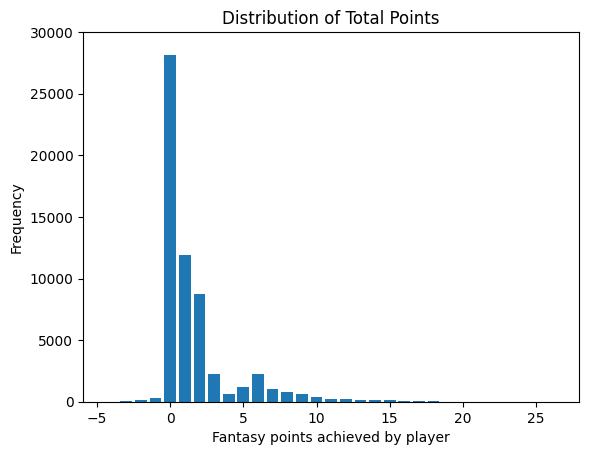

In [ ]:
points = Counter(allData2021_2022_2023_normalisedPos["total_points"])
x = points.keys()
y = points.values()

plt.bar(x,y)
plt.ylim(top=30000)
plt.yticks(np.arange(0, 30001, 5000))
plt.xlabel("Fantasy points achieved by player")
plt.ylabel("Frequency")
plt.title("Distribution of Total Points")
plt.show()


## Random Under Sampling

Finding the optimal sample rates

In [ ]:
sample_rate = [0.1, 0.2, 0.3, 0.4, 0.5]
best_mse = np.inf
best_sample_rate = [0,0,0]

for i in sample_rate:
  for j in sample_rate:
    for k in sample_rate:
      rus_dataset = allData2021_2022_2023_normalisedPos.copy()
      zeros = list(rus_dataset[rus_dataset["total_points"] == 0].index)
      ones = list(rus_dataset[rus_dataset["total_points"] == 1].index)
      twos = list(rus_dataset[rus_dataset["total_points"] == 2].index)

      remove_zeros = sample(zeros, int(np.floor(len(zeros) * i)))
      remove_ones = sample(ones, int(np.floor(len(ones) * j)))
      remove_twos = sample(twos, int(np.floor(len(twos) * k)))

      remove = remove_zeros + remove_ones + remove_twos

      rus_dataset = rus_dataset.drop(remove)

      mse = round(np.mean(test_model("gb", rus_dataset, allData2024_normalisedPos, None, None, None, None)[1]),3)

      if(mse < best_mse):
        best_mse = mse
        best_sample_rate = [i,j,k]

print(best_mse)
print(best_sample_rate)

Creating the random under sampled dataset

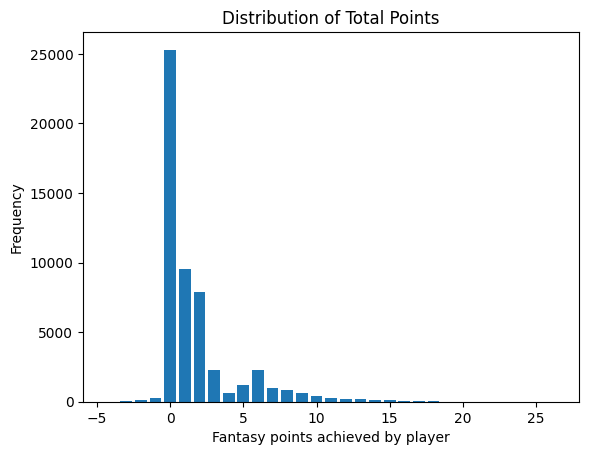

In [ ]:
rus_dataset = allData2021_2022_2023_normalisedPos.copy()
zeros = list(rus_dataset[rus_dataset["total_points"] == 0].index)
ones = list(rus_dataset[rus_dataset["total_points"] == 1].index)
twos = list(rus_dataset[rus_dataset["total_points"] == 2].index)

remove_zeros = sample(zeros, int(np.floor(len(zeros) * 0.1)))
remove_ones = sample(ones, int(np.floor(len(ones) * 0.2)))
remove_twos = sample(twos, int(np.floor(len(twos) * 0.1)))

remove = remove_zeros + remove_ones + remove_twos

rus_dataset = rus_dataset.drop(remove)
rus_dataset.to_csv("/content/drive/MyDrive/Colab Notebooks/rus_dataset.csv")

points = Counter(rus_dataset["total_points"])
x = points.keys()
y = points.values()

plt.bar(x,y)
plt.xlabel("Fantasy points achieved by player")
plt.ylabel("Frequency")
plt.title("Distribution of Total Points")
plt.show()


# SMOGN

Running the SMOGN algorithm

In [ ]:
# Define the points classes to over and under sample
rg_mtrx = [[x,1,0] for x in range(3, 21)] + [[x,0,0] for x in range(0, 3)]

train_data = allData2021_2022_2023_normalisedPos.copy()

train_data.drop(columns = ["Name", "GW", "Team", "fpl_id", "Web Name", "Team", "Date"], inplace = True)
train_data.drop(train_data[train_data["total_points"] < 0].index, inplace = True)

train_data.reset_index(drop=True, inplace=True)

data_smogn = smogn.smoter(
    data = train_data,
    y = 'total_points',
    k = 5,
    samp_method = 'balance',
    drop_na_col = True,
    drop_na_row = True,
    rel_thres = 0.5,
    rel_method = 'auto',
    rel_xtrm_type = 'both',
    rel_ctrl_pts_rg= rg_mtrx
)

data_smogn.to_csv("/content/drive/MyDrive/Colab Notebooks/smogn_data.csv")

points = Counter(data_smogn["total_points"])
x = points.keys()
y = points.values()

plt.bar(x,y)
plt.xlabel("Fantasy points achieved by player")
plt.ylabel("Frequency")
plt.title("Distribution of Total Points")
plt.show()

In [ ]:
smogn_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_data.csv")

SMOGN Hyperparameter Tuning

In [ ]:
shuffled_data = smogn_data.sample(frac = 1, random_state = 0)
labels = shuffled_data["total_points"]
data = shuffled_data.drop(columns = ["total_points", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"])
reg = HistGradientBoostingRegressor(random_state=0)
initial_parameters = {"learning_rate" : [0.01, 0.02, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8], "max_iter" : [50, 100, 150, 200, 250, 300], "max_bins" : [190,200,210,220,230,240,255], "min_samples_leaf" : [20,40,60,80,100,200,300,400,500]}
# More refined testing
parameters = {"learning_rate" : [0.1], "max_iter" : [300,400,500], "max_bins" : [220], "min_samples_leaf" : [80]}
cv = GridSearchCV(reg, parameters, cv = 5, n_jobs=n_cores)
cv.fit(data, labels)
#print(cv.best_score_)
#print(cv.best_params_)

In [ ]:
shuffled_data = smogn_data.sample(frac = 1, random_state = 0)
labels = shuffled_data["total_points"]
data = shuffled_data.drop(columns = ["total_points", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"])
reg2 = RandomForestRegressor(random_state=0, n_jobs = n_cores)
initial_parameters_2 = {"n_estimators" : [70,80,90,100,110,120,130], "min_samples_split" : [20, 40, 60, 80, 100,200,300,400,500]}
parameters2 = {"n_estimators" : [200,300,400,500], "min_samples_split" : [20]}
cv2 = GridSearchCV(reg2, parameters2, cv = 5, n_jobs = n_cores)
cv2.fit(data, labels)
#print(cv2.best_score_)
#print(cv2.best_params_)

# Goals Per Game Statistics

In [ ]:
goals = [0] * 10
clean_sheets = 0
non_clean_sheets = 0
for i in range(2021, 2024):
  for file in os.listdir(f"/content/drive/MyDrive/Colab Notebooks/{i} DATA"):
    if("all" in file):
      curr_file = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/{i} DATA/{file}")
      total_goals = curr_file["g_scored"] + curr_file["g_conceded"]
      for j in range(0, len(total_goals)):
        goals[total_goals.iloc[j]] += 1
        if(curr_file["g_scored"].iloc[j] == 0):
          clean_sheets += 1
        elif(curr_file["g_conceded"].iloc[j] == 0):
          clean_sheets += 1
        elif(curr_file["g_conceded"].iloc[j] !=0 and curr_file["g_scored"].iloc[j] != 0):
          non_clean_sheets += 1

goals = np.divide(goals, 2)
print(goals)
print(clean_sheets/2)
print(non_clean_sheets/2)

[ 56. 177. 256. 240. 197. 124.  58.  23.   6.   3.]
576.0
620.0


In [ ]:
average = sum([goals[i] * i for i in range(0, len(goals))]) / 1140

2.9833333333333334


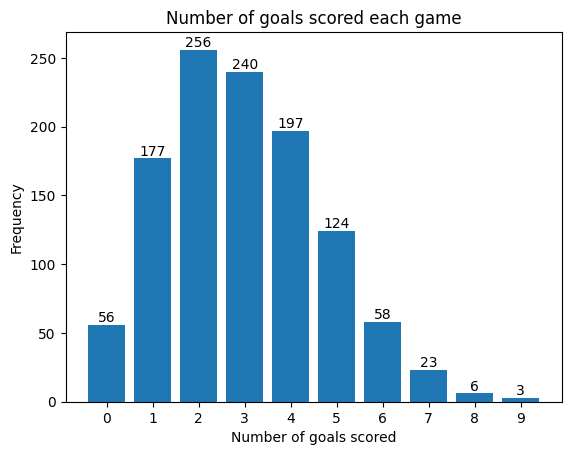

In [ ]:
x = [0,1,2,3,4,5,6,7,8,9]
y = [int(goals[i]) for i in range(0,10)]
plt.bar(x,y)
plt.xticks(x)
plt.xlabel("Number of goals scored")
plt.ylabel("Frequency")
plt.title("Number of goals scored each game")
#plt.yticks(np.arange(0, 40000, 5000))
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')
plt.show()

# Assists per game statistics

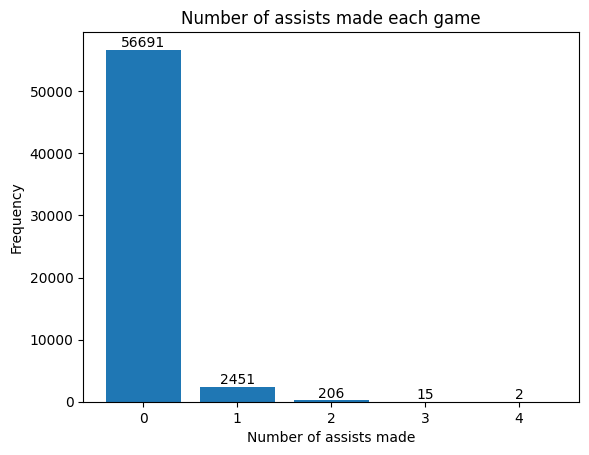

In [ ]:
x = allData2021_2022_2023_normalisedPos["assists"].unique()
y = [int(allData2021_2022_2023_normalisedPos[allData2021_2022_2023_normalisedPos["assists"] == i].shape[0]) for i in x]
plt.bar(x,y)
plt.xticks(x)
plt.xlabel("Number of assists made")
plt.ylabel("Frequency")
plt.title("Number of assists made each game")
#plt.yticks(np.arange(0, 40000, 5000))
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')
plt.show()

# Clean sheets per game statistics

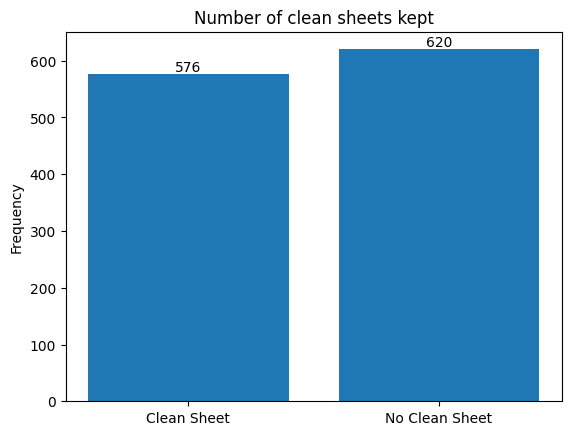

In [ ]:
x = ["Clean Sheet", "No Clean Sheet"]
y = [576, 620]
plt.bar(x,y)
plt.xticks(x)
plt.ylabel("Frequency")
plt.title("Number of clean sheets kept")
#plt.yticks(np.arange(0, 40000, 5000))
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')
plt.show()

# Player minutes statistics

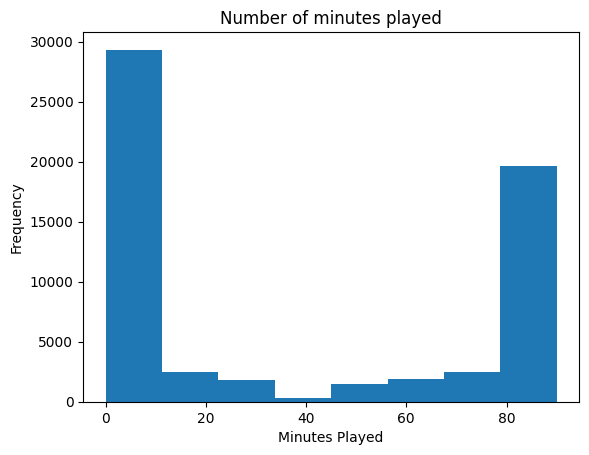

In [ ]:
mins_data = allData2021_2022_2023_normalisedPos["mins_played"]

plt.hist(mins_data, bins=8)

# Add labels and title
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.title('Number of minutes played')

# Show the plot
plt.show()

<ipython-input-35-d45c764210b7>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_points_per_bin = df.groupby('bin')['total_points'].mean()


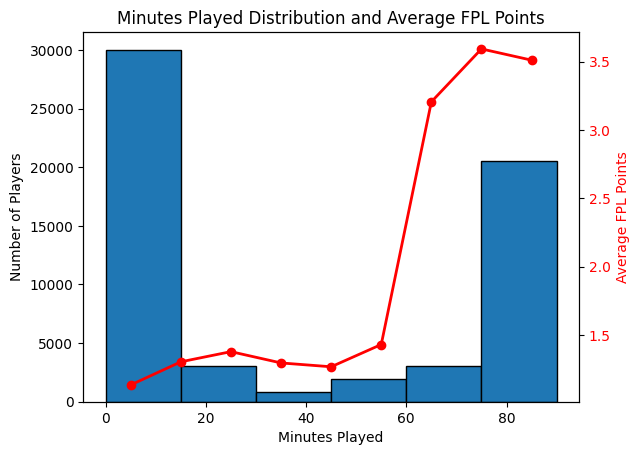

In [ ]:
minutes_played = allData2021_2022_2023_normalisedPos["mins_played"]
fpl_points = allData2021_2022_2023_normalisedPos["total_points"]
bins = [0, 15, 30, 45, 60, 75, 90]
bins2 = [i for i in range(0, 100, 10)]
df = allData2021_2022_2023_normalisedPos.copy()

df['bin'] = pd.cut(df['mins_played'], bins=bins2)
avg_points_per_bin = df.groupby('bin')['total_points'].mean()
fig, ax1 = plt.subplots()

# Histogram plot for the minutes played

ax1.hist(df['mins_played'], bins=bins, edgecolor='black')
ax1.set_xlabel('Minutes Played')
ax1.set_ylabel('Number of Players', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line plot for average points
ax2 = ax1.twinx()
bin_centers = [interval.mid for interval in avg_points_per_bin.index]
ax2.plot(bin_centers, avg_points_per_bin.values, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Average FPL Points', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Minutes Played Distribution and Average FPL Points')
plt.show()


# Making the Position and Points datasets

# Position Dataset Features

In [ ]:
# The features for each position dataset that were found using rfcev

# Position :GK
# Optimal number of features : 52
gk_features = [np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_, np.False_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_]

# Position :DEF
# Optimal number of features : 31
defs_features =  [np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.False_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_]

# Position :MID
# Optimal number of features : 57
mid_features = [np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_]

# Position :FWD
# Optimal number of features : 44
fwd_features = [np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.False_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_]


In [ ]:
def make_position_dataset(data, isSmogn):

  if(isSmogn):
    gk_remove = data[data["position"] == 1][["total_points", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"]]
    defs_remove = data[data["position"] == 2][["total_points", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"]]
    mid_remove = data[data["position"] == 3][["total_points", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"]]
    fwd_remove = data[data["position"] == 4][["total_points", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"]]

  else:
    gk_remove = data[data["position"] == 1][["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]]
    defs_remove = data[data["position"] == 2][["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]]
    mid_remove = data[data["position"] == 3][["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]]
    fwd_remove = data[data["position"] == 4][["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]]

  gk = data[data["position"] == 1].drop(columns = gk_remove.columns)
  gk = gk.loc[:, gk_features]
  gk = pd.concat([gk, gk_remove], axis = 1)

  defs = data[data["position"] == 2].drop(columns = defs_remove.columns)
  defs = defs.loc[:, defs_features]
  defs = pd.concat([defs, defs_remove], axis = 1)

  mid = data[data["position"] == 3].drop(columns = mid_remove.columns)
  mid = mid.loc[:, mid_features]
  mid = pd.concat([mid, mid_remove], axis = 1)

  fwd = data[data["position"] == 4].drop(columns = fwd_remove.columns)
  fwd = fwd.loc[:, fwd_features]
  fwd = pd.concat([fwd, fwd_remove], axis = 1)

  gk.to_csv("/content/drive/MyDrive/Colab Notebooks/gk_data_24.csv")
  defs.to_csv("/content/drive/MyDrive/Colab Notebooks/def_data_24.csv")
  mid.to_csv("/content/drive/MyDrive/Colab Notebooks/mid_data_24.csv")
  fwd.to_csv("/content/drive/MyDrive/Colab Notebooks/fwd_data_24.csv")

In [ ]:
gk_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gk_data_21_22_23.csv", index_col = 0)
def_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/def_data_21_22_23.csv", index_col = 0)
mid_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mid_data_21_22_23.csv", index_col = 0)
fwd_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fwd_data_21_22_23.csv", index_col = 0)

smogn_gk_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_gk_data_21_22_23.csv", index_col = 0)
smogn_def_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_def_data_21_22_23.csv", index_col = 0)
smogn_mid_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_mid_data_21_22_23.csv", index_col = 0)
smogn_fwd_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_fwd_data_21_22_23.csv", index_col = 0)

gk_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gk_data_24.csv", index_col = 0)
def_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/def_data_24.csv", index_col = 0)
mid_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mid_data_24.csv", index_col = 0)
fwd_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fwd_data_24.csv", index_col = 0)

all_gk_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_gk_data.csv", index_col = 0)
all_def_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_def_data.csv", index_col = 0)
all_mid_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_mid_data.csv", index_col = 0)
all_fwd_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_fwd_data.csv", index_col = 0)


#Hyperparameter Tuning of Position Models

HGBM Model

In [ ]:
all_position_data = [gk_train_data, def_train_data, mid_train_data, fwd_train_data]

for i in range(0, 4):
  shuffled_data = all_position_data[i].sample(frac = 1, random_state = 0)
  labels = shuffled_data["total_points"]
  data = shuffled_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])
  reg = HistGradientBoostingRegressor(random_state=0)
  #Initial parameters tested
  initial_parameters = {"learning_rate" : [0.025, 0.05, 0.1, 0.2, 0.4, 0.8], "max_iter" : [50, 100, 150, 200, 250, 300], "max_bins" : [190,200,210,220,230,240,255], "min_samples_leaf" : [20,40,60,80,100]}
  # More refined testing
  if(i == 0):
    parameters = {"learning_rate" : [0.05], "max_iter" : [30,40,50,60,70], "max_bins" : [210], "min_samples_leaf" : [100,200,300,400,500]}
  elif(i == 1):
    parameters = {"learning_rate" : [0.05], "max_iter" : [300,400,500], "max_bins" : [210], "min_samples_leaf" : [80]}
  elif(i == 2):
    parameters = {"learning_rate" : [0.05], "max_iter" : [100], "max_bins" : [150,160,170,180,190], "min_samples_leaf" : [100,200,300,400,500]}
  elif(i == 3):
    parameters = {"learning_rate" : [0.0075, 0.0125, 0.025], "max_iter" : [100], "max_bins" : [230], "min_samples_leaf" : [100,200,300,400,500]}

  cv = GridSearchCV(reg, parameters, cv = 5, n_jobs=n_cores)
  cv.fit(data, labels)
  print(cv.best_score_)
  print(cv.best_params_)

RF Model

In [ ]:
all_position_data = [gk_train_data, def_train_data, mid_train_data, fwd_train_data]

for i in range(1, 2):
  shuffled_data = all_position_data[i].sample(frac = 1, random_state = 0)
  labels = shuffled_data["total_points"]
  data = shuffled_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])
  reg2 = RandomForestRegressor(random_state=0, n_jobs = n_cores)
  initial_parameters_2 = {"n_estimators" : [70,80,90,100,110,120,130], "min_samples_split" : [20, 40, 60, 80, 100,200,300,400,500]}
  parameters2 = {"n_estimators" : [120], "min_samples_split" : [100,200,300,400,500]}
  cv2 = GridSearchCV(reg2, initial_parameters_2, cv = 5, n_jobs = n_cores)
  cv2.fit(data, labels)
  print(cv2.best_score_)
  print(cv2.best_params_)

# Predict player points using the position datasets

In [ ]:
#Train and test in one function
def gw_predict_with_position_data(gw, isSmogn):

  def gw_predict(gw, train_data, test_data, position):

    if(position == "gk"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 210, max_iter = 70, min_samples_leaf = 200)
    elif(position == "def"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 210, max_iter = 400, min_samples_leaf = 80)
    elif(position == "mid"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 170, max_iter = 100, min_samples_leaf = 500)
    elif(position == "fwd"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 230, max_iter = 100, min_samples_leaf = 100)

    labels = train_data["total_points"]

    if(not isSmogn):
      data = train_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])
    else:
      data = train_data.drop(columns = ["total_points", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"])

    gb_reg.fit(data, labels)

    gw_data = test_data[test_data["GW"] == gw]

    gw_labels = gw_data["total_points"]

    gw_data_pred = gw_data.drop(columns =["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])

    gw_pred = gb_reg.predict(gw_data_pred)

    pairs = {}
    for i in range(0, len(gw_pred)):
      if(gw_data.iloc[i]["fpl_id"] in pairs):
        pairs[gw_data.iloc[i]["fpl_id"]] += gw_pred[i]
      else:
        pairs[gw_data.iloc[i]["fpl_id"]] = gw_pred[i]

    return pairs

  if(not isSmogn):
    gk_pred = gw_predict(gw, gk_train_data, gk_test_data, "gk")
    def_pred = gw_predict(gw, def_train_data, def_test_data, "def")
    mid_pred = gw_predict(gw, mid_train_data, mid_test_data, "mid")
    fwd_pred = gw_predict(gw, fwd_train_data, fwd_test_data, "fwd")

  else:
    gk_pred = gw_predict(gw, smogn_gk_train, gk_test_data, "gk")
    def_pred = gw_predict(gw, smogn_def_train, def_test_data, "def")
    mid_pred = gw_predict(gw, smogn_mid_train, mid_test_data, "mid")
    fwd_pred = gw_predict(gw, smogn_fwd_train, fwd_test_data, "fwd")

  sorted_all = dict(sorted((gk_pred | def_pred | mid_pred | fwd_pred).items(), key = lambda item : item[1], reverse = True))
  return sorted_all

# Seperate train function
def train_gw_predict_with_position_data(isSmogn):
  def pos_train(train_data, position):

    if(position == "gk"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 210, max_iter = 70, min_samples_leaf = 200)
    elif(position == "def"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 210, max_iter = 400, min_samples_leaf = 80)
    elif(position == "mid"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 170, max_iter = 100, min_samples_leaf = 500)
    elif(position == "fwd"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 230, max_iter = 100, min_samples_leaf = 100)


    labels = train_data["total_points"]

    if(not isSmogn):
      data = train_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])
    else:
      data = train_data.drop(columns = ["total_points", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"])

    gb_reg.fit(data, labels)

    return gb_reg

  if(not isSmogn):
    gk_pred = pos_train(gk_train_data,"gk")
    def_pred = pos_train(def_train_data,"def")
    mid_pred = pos_train(mid_train_data,"mid")
    fwd_pred = pos_train(fwd_train_data,"fwd")

  else:
    gk_pred = pos_train(smogn_gk_train,"gk")
    def_pred = pos_train(smogn_def_train,"def")
    mid_pred = pos_train(smogn_mid_train,"mid")
    fwd_pred = pos_train(smogn_fwd_train,"fwd")

  return (gk_pred, def_pred, mid_pred, fwd_pred)


# Seperate test function
def test_gw_predict_with_position_data(gw, all_models):
  all_pairs = {}

  for i in range(0, 4):

    if(i == 0):
      test_data = gk_test_data
    elif(i == 1):
      test_data = def_test_data
    elif(i == 2):
      test_data = mid_test_data
    elif(i == 3):
      test_data = fwd_test_data

    gw_data = test_data[test_data["GW"] == gw]

    gw_labels = gw_data["total_points"]

    gw_data_pred = gw_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])

    gw_pred = all_models[i].predict(gw_data_pred)

    pairs = {}
    for i in range(0, len(gw_pred)):
      if(gw_data.iloc[i]["fpl_id"] in pairs):
        pairs[gw_data.iloc[i]["fpl_id"]] += gw_pred[i]
      else:
        pairs[gw_data.iloc[i]["fpl_id"]] = gw_pred[i]

    all_pairs = all_pairs | pairs

  sorted_all = dict(sorted((all_pairs).items(), key = lambda item : item[1], reverse = True))

  return sorted_all


## Evaluating the performance of the position datasets

In [ ]:
def evaluate_position_dataset(model, isSmogn, filter):

  print("Model :", model)

  gk_rmse_train, def_rmse_train, mid_rmse_train, fwd_rmse_train, all_rmse_train = [], [], [], [], []
  gk_rmse_test, def_rmse_test, mid_rmse_test, fwd_rmse_test, all_rsme_test = [], [], [], [], []

  gk_r2_train, def_r2_train, mid_r2_train, fwd_r2_train, all_r2_train = [], [], [], [], []
  gk_r2_test, def_r2_test, mid_r2_test, fwd_r2_test, all_r2_test = [], [], [], [], []

  gk_mae_train, def_mae_train, mid_mae_train, fwd_mae_train, all_mae_train = [], [], [], [], []
  gk_mae_test, def_mae_test, mid_mae_test, fwd_mae_test, all_mae_test = [], [], [], [], []

  for i in range(0, 10):

    if(model == "hgbm"):
      gk_model= HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 210, max_iter = 70, min_samples_leaf = 200)

      def_model = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 210, max_iter = 400, min_samples_leaf = 80)

      mid_model = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 170, max_iter = 100, min_samples_leaf = 500)

      fwd_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 230, max_iter = 100, min_samples_leaf = 100)

    elif(model == "rf"):

      gk_model = RandomForestRegressor(n_estimators = 130, n_jobs = n_cores, min_samples_split = 300)
      def_model = RandomForestRegressor(n_estimators = 130, n_jobs = n_cores, min_samples_split = 20)
      mid_model = RandomForestRegressor(n_estimators = 90, n_jobs = n_cores, min_samples_split = 300)
      fwd_model = RandomForestRegressor(n_estimators = 110, n_jobs = n_cores, min_samples_split = 300)

    elif(model == "lr"):
      gk_model = LinearRegression()
      def_model = LinearRegression()
      mid_model = LinearRegression()
      fwd_model = LinearRegression()

    elif(model == "best"):
      gk_model = RandomForestRegressor(n_estimators = 120, n_jobs = n_cores, min_samples_split = 100)
      def_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 255, max_iter = 250, min_samples_leaf = 300)
      mid_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 255, max_iter = 250, min_samples_leaf = 300)
      fwd_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 255, max_iter = 250, min_samples_leaf = 300)

    if(isSmogn):
      gk_labels_train = smogn_gk_train["total_points"]
      def_labels_train = smogn_def_train["total_points"]
      mid_labels_train = smogn_mid_train["total_points"]
      fwd_labels_train = smogn_fwd_train["total_points"]
      all_labels_train = pd.concat([gk_labels_train, def_labels_train, mid_labels_train, fwd_labels_train])

      gk_model.fit(smogn_gk_train.drop(columns = ["total_points"]), gk_labels_train)
      def_model.fit(smogn_def_train.drop(columns = ["total_points"]), def_labels_train)
      mid_model.fit(smogn_mid_train.drop(columns = ["total_points"]), mid_labels_train)
      fwd_model.fit(smogn_fwd_train.drop(columns = ["total_points"]), fwd_labels_train)

      gk_pred_train = gk_model.predict(smogn_gk_train.drop(columns = ["total_points"]))
      def_pred_train = def_model.predict(smogn_def_train.drop(columns = ["total_points"]))
      mid_pred_train = mid_model.predict(smogn_mid_train.drop(columns = ["total_points"]))
      fwd_pred_train = fwd_model.predict(smogn_fwd_train.drop(columns = ["total_points"]))
      all_pred_train = np.concatenate((gk_pred_train,def_pred_train,mid_pred_train,fwd_pred_train))

    else:

      # some error with indexing to fix

      gk_labels_train = gk_train_data["total_points"]
      def_labels_train = def_train_data["total_points"]
      mid_labels_train = mid_train_data["total_points"]
      fwd_labels_train = fwd_train_data["total_points"]
      all_labels_train = pd.concat([gk_labels_train, def_labels_train, mid_labels_train, fwd_labels_train])

      gk_model.fit(gk_train_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]), gk_labels_train)
      def_model.fit(def_train_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]), def_labels_train)
      mid_model.fit(mid_train_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]), mid_labels_train)
      fwd_model.fit(fwd_train_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]), fwd_labels_train)

      gk_pred_train = gk_model.predict(gk_train_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]))
      def_pred_train = def_model.predict(def_train_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]))
      mid_pred_train = mid_model.predict(mid_train_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]))
      fwd_pred_train = fwd_model.predict(fwd_train_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]))
      all_pred_train = np.concatenate((gk_pred_train,def_pred_train,mid_pred_train,fwd_pred_train))


    gk_labels_test = gk_test_data["total_points"]
    def_labels_test = def_test_data["total_points"]
    mid_labels_test = mid_test_data["total_points"]
    fwd_labels_test = fwd_test_data["total_points"]
    all_labels_test = pd.concat([gk_labels_test, def_labels_test, mid_labels_test, fwd_labels_test])

    gk_pred_test = gk_model.predict(gk_test_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]))
    def_pred_test = def_model.predict(def_test_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]))
    mid_pred_test = mid_model.predict(mid_test_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]))
    fwd_pred_test = fwd_model.predict(fwd_test_data.drop(columns = ["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]))
    all_pred_test = np.concatenate((gk_pred_test,def_pred_test,mid_pred_test,fwd_pred_test))


    if(filter):

      sorted_gk_train_indices = np.argsort(gk_pred_train)[::-1]
      gk_pred_train = gk_pred_train[sorted_gk_train_indices][0:filter+1]
      gk_labels_train = gk_labels_train.to_numpy()
      gk_labels_train = gk_labels_train[sorted_gk_train_indices][0:filter+1]

      sorted_def_train_indices = np.argsort(def_pred_train)[::-1]
      def_pred_train = def_pred_train[sorted_def_train_indices][0:filter+1]
      def_labels_train = def_labels_train.to_numpy()
      def_labels_train = def_labels_train[sorted_def_train_indices][0:filter+1]

      sorted_mid_train_indices = np.argsort(mid_pred_train)[::-1]
      mid_pred_train = mid_pred_train[sorted_mid_train_indices][0:filter+1]
      mid_labels_train = mid_labels_train.to_numpy()
      mid_labels_train = mid_labels_train[sorted_mid_train_indices][0:filter+1]

      sorted_fwd_train_indices = np.argsort(fwd_pred_train)[::-1]
      fwd_pred_train = fwd_pred_train[sorted_fwd_train_indices][0:filter+1]
      fwd_labels_train = fwd_labels_train.to_numpy()
      fwd_labels_train = fwd_labels_train[sorted_fwd_train_indices][0:filter+1]

      sorted_gk_test_indices = np.argsort(gk_pred_test)[::-1]
      gk_pred_test = gk_pred_test[sorted_gk_test_indices][0:filter+1]
      gk_labels_test = gk_labels_test.to_numpy()
      gk_labels_test = gk_labels_test[sorted_gk_test_indices][0:filter+1]

      sorted_def_test_indices = np.argsort(def_pred_test)[::-1]
      def_pred_test = def_pred_test[sorted_def_test_indices][0:filter+1]
      def_labels_test = def_labels_test.to_numpy()
      def_labels_test = def_labels_test[sorted_def_test_indices][0:filter+1]

      sorted_mid_test_indices = np.argsort(mid_pred_test)[::-1]
      mid_pred_test = mid_pred_test[sorted_mid_test_indices][0:filter+1]
      mid_labels_test = mid_labels_test.to_numpy()
      mid_labels_test = mid_labels_test[sorted_mid_test_indices][0:filter+1]

      sorted_fwd_test_indices = np.argsort(fwd_pred_test)[::-1]
      fwd_pred_test = fwd_pred_test[sorted_fwd_test_indices][0:filter+1]
      fwd_labels_test = fwd_labels_test.to_numpy()
      fwd_labels_test = fwd_labels_test[sorted_fwd_test_indices][0:filter+1]

      sorted_all_train_indices = np.argsort(all_pred_train)[::-1]
      all_pred_train = all_pred_train[sorted_all_train_indices][0:filter+1]
      all_labels_train = all_labels_train.to_numpy()
      all_labels_train = all_labels_train[sorted_all_train_indices][0:filter+1]

      sorted_all_test_indices = np.argsort(all_pred_test)[::-1]
      all_pred_test = all_pred_test[sorted_all_test_indices][0:filter+1]
      all_labels_test = all_labels_test.to_numpy()
      all_labels_test = all_labels_test[sorted_all_test_indices][0:filter+1]


    gk_rmse_train.append(root_mean_squared_error(gk_labels_train, gk_pred_train))
    def_rmse_train.append(root_mean_squared_error(def_labels_train, def_pred_train))
    mid_rmse_train.append(root_mean_squared_error(mid_labels_train, mid_pred_train))
    fwd_rmse_train.append(root_mean_squared_error(fwd_labels_train, fwd_pred_train))
    all_rmse_train.append(root_mean_squared_error(all_labels_train, all_pred_train))

    gk_rmse_test.append(root_mean_squared_error(gk_labels_test, gk_pred_test))
    def_rmse_test.append(root_mean_squared_error(def_labels_test, def_pred_test))
    mid_rmse_test.append(root_mean_squared_error(mid_labels_test, mid_pred_test))
    fwd_rmse_test.append(root_mean_squared_error(fwd_labels_test, fwd_pred_test))
    all_rsme_test.append(root_mean_squared_error(all_labels_test, all_pred_test))

    # gk_rmse_train.append(threshold_rmse(gk_labels_train.reset_index(drop = True), gk_pred_train,3))
    # def_rmse_train.append(threshold_rmse(def_labels_train.reset_index(drop = True), def_pred_train,3))
    # mid_rmse_train.append(threshold_rmse(mid_labels_train.reset_index(drop = True), mid_pred_train,3))
    # fwd_rmse_train.append(threshold_rmse(fwd_labels_train.reset_index(drop = True), fwd_pred_train,3))
    # all_rmse_train.append(threshold_rmse(all_labels_train.reset_index(drop = True), all_pred_train,3))

    # gk_rmse_test.append(threshold_rmse(gk_labels_test.reset_index(drop = True), gk_pred_test,3))
    # def_rmse_test.append(threshold_rmse(def_labels_test.reset_index(drop = True), def_pred_test,3))
    # mid_rmse_test.append(threshold_rmse(mid_labels_test.reset_index(drop = True), mid_pred_test,3))
    # fwd_rmse_test.append(threshold_rmse(fwd_labels_test.reset_index(drop = True), fwd_pred_test,3))
    # all_rsme_test.append(threshold_rmse(all_labels_test.reset_index(drop = True), all_pred_test,3))

    gk_r2_train.append(r2_score(gk_labels_train, gk_pred_train))
    def_r2_train.append(r2_score(def_labels_train, def_pred_train))
    mid_r2_train.append(r2_score(mid_labels_train, mid_pred_train))
    fwd_r2_train.append(r2_score(fwd_labels_train, fwd_pred_train))
    all_r2_train.append(r2_score(all_labels_train, all_pred_train))

    gk_r2_test.append(r2_score(gk_labels_test, gk_pred_test))
    def_r2_test.append(r2_score(def_labels_test, def_pred_test))
    mid_r2_test.append(r2_score(mid_labels_test, mid_pred_test))
    fwd_r2_test.append(r2_score(fwd_labels_test, fwd_pred_test))
    all_r2_test.append(r2_score(all_labels_test, all_pred_test))

    gk_mae_train.append(mean_absolute_error(gk_labels_train, gk_pred_train))
    def_mae_train.append(mean_absolute_error(def_labels_train, def_pred_train))
    mid_mae_train.append(mean_absolute_error(mid_labels_train, mid_pred_train))
    fwd_mae_train.append(mean_absolute_error(fwd_labels_train, fwd_pred_train))
    all_mae_train.append(mean_absolute_error(all_labels_train, all_pred_train))

    gk_mae_test.append(mean_absolute_error(gk_labels_test, gk_pred_test))
    def_mae_test.append(mean_absolute_error(def_labels_test, def_pred_test))
    mid_mae_test.append(mean_absolute_error(mid_labels_test, mid_pred_test))
    fwd_mae_test.append(mean_absolute_error(fwd_labels_test, fwd_pred_test))
    all_mae_test.append(mean_absolute_error(all_labels_test, all_pred_test))

  GK_stats = [np.mean(gk_rmse_train), np.mean(gk_rmse_test), np.mean(gk_r2_train), np.mean(gk_r2_test), np.mean(gk_mae_train), np.mean(gk_mae_test)]
  DEF_stats = [np.mean(def_rmse_train), np.mean(def_rmse_test), np.mean(def_r2_train), np.mean(def_r2_test), np.mean(def_mae_train), np.mean(def_mae_test)]
  MID_stats = [np.mean(mid_rmse_train), np.mean(mid_rmse_test), np.mean(mid_r2_train), np.mean(mid_r2_test), np.mean(mid_mae_train), np.mean(mid_mae_test)]
  FWD_stats = [np.mean(fwd_rmse_train), np.mean(fwd_rmse_test), np.mean(fwd_r2_train), np.mean(fwd_r2_test), np.mean(fwd_mae_train), np.mean(fwd_mae_test)]
  all_stats = [np.mean(all_rmse_train), np.mean(all_rsme_test), np.mean(all_r2_train), np.mean(all_r2_test), np.mean(all_mae_train), np.mean(all_mae_test)]

  res = pd.DataFrame( data = {"GK" : GK_stats, "DEF" : DEF_stats, "MID" : MID_stats, "FWD" : FWD_stats, "ALL" : all_stats}, index = ["RMSE Train", "RMSE Test", "R2 Train", "R2 Test", "MAE Train", "MAE Test"])
  print(res,"\n")

  return {"Train RMSE" : (gk_rmse_train, def_rmse_train, mid_rmse_train, fwd_rmse_train, all_rmse_train), "Test RMSE" : (gk_rmse_test, def_rmse_test, mid_rmse_test, fwd_rmse_test, all_rsme_test),
          "Train R2 Score" : (gk_r2_train, def_r2_train, mid_r2_train, fwd_r2_train, all_r2_train), "Test R2 Score" : (gk_r2_test, def_r2_test, mid_r2_test, fwd_r2_test, all_r2_test),
          "Train MAE" : (gk_mae_train, def_mae_train, mid_mae_train, fwd_mae_train, all_mae_train), "Test MAE" : (gk_mae_test, def_mae_test, mid_mae_test, fwd_mae_test, all_mae_test)}


In [ ]:
# hgbm_res = evaluate_position_dataset("hgbm", False, None)

In [ ]:
# Plotting results of the above testing function

x_labels = ("GK", "DEF", "MID", "FWD", "ALL")
x_labels = ("ALL",)
results = {
    "Train RMSE" : (round(np.mean(hgbm_res["Train RMSE"][0]),3), round(np.mean(hgbm_res["Train RMSE"][1]),3), round(np.mean(hgbm_res["Train RMSE"][2]),3), round(np.mean(hgbm_res["Train RMSE"][3]),3), round(np.mean(hgbm_res["Train RMSE"][4]),3)),
    "Train R2" : (round(np.mean(hgbm_res["Train R2 Score"][0]),3), round(np.mean(hgbm_res["Train R2 Score"][1]),3), round(np.mean(hgbm_res["Train R2 Score"][2]),3), round(np.mean(hgbm_res["Train R2 Score"][3]),3), round(np.mean(hgbm_res["Train R2 Score"][4]),3)),
    "Train MAE" : (round(np.mean(hgbm_res["Train MAE"][0]),3), round(np.mean(hgbm_res["Train MAE"][1]),3), round(np.mean(hgbm_res["Train MAE"][2]),3), round(np.mean(hgbm_res["Train MAE"][3]),3), round(np.mean(hgbm_res["Train MAE"][4]),3))
}
results3 = {
    "Train RMSE" : (round(np.mean(hgbm_res["Train RMSE"][4]),3)),
    "Train R2" : (round(np.mean(hgbm_res["Train R2 Score"][4]),3)),
    "Train MAE" : (round(np.mean(hgbm_res["Train MAE"][4]),3))
}
results4 = {
    "Test RMSE" : (round(np.mean(hgbm_res["Test RMSE"][4]),3)),
    "Test R2" : (round(np.mean(hgbm_res["Test R2 Score"][4]),3)),
    "Test MAE" : (round(np.mean(hgbm_res["Test MAE"][4]),3))
}
x = np.arange(len(x_labels))
width = 0.3
mult = 0
fig, ax = plt.subplots(layout = 'constrained')

for attribute, measurement in results.items():
    offset = width * mult
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    mult += 1

ax.set_title("Test Error for combined position predictions")
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 3.2)
plt.show()

Results of RFCEV for the points models

In [ ]:
#Factor :goals
#Optimal number of features : 29
goals_features = [np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_]

#Factor :assists
#Optimal number of features : 47
assists_features = [np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_]

#Factor :clean_sheet_kept
#Optimal number of features : 45
clean_sheet_features = [np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_]

#Factor :saves_made
#Optimal number of features : 39
saves_features = [np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_]

#Factor :bonus_scored
#Optimal number of features : 61
bonus_features = [np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_]

#Factor :mins_played
#Optimal number of features : 28
mins_features = [np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_]

goals_conceded_features = [True, True, True, False, False, True, True, True, True, True, True, True, False, False, False, False, True, False, True, True, False, True, False, False, False, False, True, False, False, True, True, True, True, False, True, False, True, False]

Making the points datasets

In [ ]:
def make_points_dataset(data, isSmogn):
  if(isSmogn):
    remove_features = data[["total_points", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"]]
  else:
    remove_features = data[["total_points", "Name", "GW", "Team", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Date", "fpl_id"]]

  goals = data.drop(columns = remove_features.columns)
  goals = goals.loc[:, goals_features]
  goals = pd.concat([goals, remove_features], axis = 1)

  assists = data.drop(columns = remove_features.columns)
  assists = assists.loc[:, assists_features]
  assists = pd.concat([assists, remove_features], axis = 1)

  mins = data.drop(columns = remove_features.columns)
  mins = mins.loc[:, mins_features]
  mins = pd.concat([mins, remove_features], axis = 1)

  saves = data.drop(columns = remove_features.columns)
  saves = saves.loc[:, saves_features]
  saves = pd.concat([saves, remove_features], axis = 1)

  clean_sheet = data.drop(columns = remove_features.columns)
  clean_sheet = clean_sheet.loc[:, clean_sheet_features]
  clean_sheet = pd.concat([clean_sheet, remove_features], axis = 1)

  bonus = data.drop(columns = remove_features.columns)
  bonus = bonus.loc[:, bonus_features]
  bonus = pd.concat([bonus, remove_features], axis = 1)

  goals.to_csv("/content/drive/MyDrive/Colab Notebooks/smogn_goals_data_21_22_23.csv")
  assists.to_csv("/content/drive/MyDrive/Colab Notebooks/smogn_assists_data_21_22_23.csv")
  mins.to_csv("/content/drive/MyDrive/Colab Notebooks/smogn_mins_data_21_22_23.csv")
  saves.to_csv("/content/drive/MyDrive/Colab Notebooks/smogn_saves_data_21_22_23.csv")
  clean_sheet.to_csv("/content/drive/MyDrive/Colab Notebooks/smogn_clean_sheet_data_21_22_23.csv")
  bonus.to_csv("/content/drive/MyDrive/Colab Notebooks/smogn_bonus_data_21_22_23.csv")

make_points_dataset(smogn_data, True)

Reading the postition datasets

In [ ]:
goals_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/goals_data_21_22_23.csv", index_col = 0)
goals_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/goals_data_24.csv", index_col = 0)
assists_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/assists_data_21_22_23.csv", index_col = 0)
assists_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/assists_data_24.csv", index_col = 0)
mins_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mins_data_21_22_23.csv", index_col = 0)
mins_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mins_data_24.csv", index_col = 0)
saves_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/saves_data_21_22_23.csv", index_col = 0)
saves_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/saves_data_24.csv", index_col = 0)
clean_sheet_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_sheet_data_21_22_23.csv", index_col = 0)
clean_sheet_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_sheet_data_24.csv", index_col = 0)
bonus_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bonus_data_21_22_23.csv", index_col = 0)
bonus_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bonus_data_24.csv", index_col = 0)
goals_conceded_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/goals_conceded_data_21_22_23.csv", index_col = 0)
goals_conceded_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/goals_conceded_data_24.csv", index_col = 0)

smogn_goals_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_goals_data_21_22_23.csv", index_col = 0)
smogn_assists_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_assists_data_21_22_23.csv", index_col = 0)
smogn_mins_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_mins_data_21_22_23.csv", index_col = 0)
smogn_saves_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_saves_data_21_22_23.csv", index_col = 0)
smogn_clean_sheet_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_clean_sheet_data_21_22_23.csv", index_col = 0)
smogn_bonus_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smogn_bonus_data_21_22_23.csv", index_col = 0)

## Hyperparameter Tuning for Points Factor Models

HGBM Model

In [ ]:
all_points_data = [goals_train_data, assists_train_data, mins_train_data, saves_train_data, clean_sheet_train_data, bonus_train_data, goals_conceded_train_data]

for i in range(0, 7):
  shuffled_data = all_points_data[i].sample(frac = 1, random_state = 0)
  if(i != 6):
    data = shuffled_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])
  else:
    data = shuffled_data.drop(columns = ["index", "GW", "Team","goals_conceded"])
  reg = HistGradientBoostingRegressor(random_state=0)
  #Initial parameters tested
  initial_parameters = {"learning_rate" : [0.025, 0.05, 0.1, 0.2, 0.4, 0.8], "max_iter" : [50, 100, 150, 200, 250, 300], "max_bins" : [190,200,210,220,230,240,255], "min_samples_leaf" : [50,100,200,300,400,500]}
  # More refined testing

  if(i == 0):
    parameters = {"learning_rate" : [0.05], "max_iter" : [30,40,50,60,70], "max_bins" : [210], "min_samples_leaf" : [100,200,300,400,500]}
    labels = shuffled_data["goals"]
  elif(i == 1):
    parameters = {"learning_rate" : [0.05], "max_iter" : [300,400,500], "max_bins" : [210], "min_samples_leaf" : [80]}
    labels = shuffled_data["assists"]
  elif(i == 2):
    parameters = {"learning_rate" : [0.05], "max_iter" : [100], "max_bins" : [150,160,170,180,190], "min_samples_leaf" : [100,200,300,400,500]}
    labels = shuffled_data["mins_played"]
  elif(i == 3):
    parameters = {"learning_rate" : [0.0075, 0.0125, 0.025], "max_iter" : [100], "max_bins" : [230], "min_samples_leaf" : [100,200,300,400,500]}
    labels = shuffled_data["saves_made"]
  elif(i == 4):
    labels = shuffled_data["clean_sheet_kept"]
  elif(i == 5):
    labels = shuffled_data["bonus_scored"]
  else:
    labels = shuffled_data["goals_conceded"]

  cv = GridSearchCV(reg, initial_parameters, cv = 5, n_jobs=n_cores)
  cv.fit(data, labels)
  print(cv.best_score_)
  print(cv.best_params_)

RF Model

In [ ]:
all_points_data = all_points_data = [goals_train_data, assists_train_data, mins_train_data, saves_train_data, clean_sheet_train_data, bonus_train_data, goals_conceded_train_data]

for i in range(0, 7):
  shuffled_data = all_points_data[i].sample(frac = 1, random_state = 0)
  if(i != 6):
    data = shuffled_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])
  else:
    data = shuffled_data.drop(columns = ["index", "GW", "Team","goals_conceded"])
  reg2 = RandomForestRegressor(random_state=0, n_jobs = n_cores)
  initial_parameters_2 = {"n_estimators" : [70,80,90,100,110,120,130], "min_samples_split" : [20, 40, 60, 80, 100,200,300,400,500]}
  parameters2 = {"n_estimators" : [120], "min_samples_split" : [100,200,300,400,500]}

  if(i == 0):
    parameters = {"learning_rate" : [0.05], "max_iter" : [30,40,50,60,70], "max_bins" : [210], "min_samples_leaf" : [100,200,300,400,500]}
    labels = shuffled_data["goals"]
  elif(i == 1):
    parameters = {"learning_rate" : [0.05], "max_iter" : [300,400,500], "max_bins" : [210], "min_samples_leaf" : [80]}
    labels = shuffled_data["assists"]
  elif(i == 2):
    parameters = {"learning_rate" : [0.05], "max_iter" : [100], "max_bins" : [150,160,170,180,190], "min_samples_leaf" : [100,200,300,400,500]}
    labels = shuffled_data["mins_played"]
  elif(i == 3):
    parameters = {"learning_rate" : [0.0075, 0.0125, 0.025], "max_iter" : [100], "max_bins" : [230], "min_samples_leaf" : [100,200,300,400,500]}
    labels = shuffled_data["saves_made"]
  elif(i == 4):
    labels = shuffled_data["clean_sheet_kept"]
  elif(i == 5):
    labels = shuffled_data["bonus_scored"]
  else:
    labels = shuffled_data["goals_conceded"]

  cv2 = GridSearchCV(reg2, initial_parameters_2, cv = 5, n_jobs = n_cores)
  cv2.fit(data, labels)
  print(cv2.best_score_)
  print(cv2.best_params_)

# Predict player points using the points models

In [ ]:
# Train and Test within one function

def gw_predict_with_points_data(gw, isSmogn):

  def gw_predict(gw, train_data, test_data, label):

    if(label == "goals"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 230, max_iter = 200, min_samples_leaf = 500)
    elif(label == "assists"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 240, max_iter = 100, min_samples_leaf = 300)
    elif(label == "mins_played"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 190, max_iter = 100, min_samples_leaf = 200)
    elif(label == "saves_made"):
      gb_reg = RandomForestRegressor(min_samples_split=80, n_estimators=120)
    elif(label == "clean_sheet_kept"):
      gb_reg = LinearRegression()
    elif(label == "bonus_scored"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 220, max_iter = 150, min_samples_leaf = 500)
    elif(label == "goals_conceded"):
      gb_reg = RandomForestRegressor(min_samples_split = 100, n_estimators=130)


    labels = train_data[label]
    if(label == "goals_conceded"):
      data = train_data.drop(columns = ["index", "GW", "Team","goals_conceded"])
    elif(isSmogn):
      data = train_data.drop(columns = ["total_points","goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"])
    else:
      data = train_data.drop(columns =  ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])

    gb_reg.fit(data, labels)

    gw_data = test_data[test_data["GW"] == gw].copy()

    gw_labels = gw_data[label]

    if(label != "goals_conceded"):

      player_ids = gw_data["fpl_id"].tolist()
      gw_data_pred = gw_data.drop(columns =  ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])

      gw_pred = gb_reg.predict(gw_data_pred)

      if("position" not in gw_data.columns):
        gw_data["position"] = allData2021_2022_2023_normalisedPos["position"]

      pairs = {}
      for i in range(0, len(gw_pred)):
        if(gw_data.iloc[i]["fpl_id"] in pairs):
          pairs[gw_data.iloc[i]["fpl_id"]] = [pairs[gw_data.iloc[i]["fpl_id"]][0], (gw_pred[i], gw_data.iloc[i]["position"], gw_data.iloc[i]["Team"])]
        else:
          pairs[gw_data.iloc[i]["fpl_id"]] = [(gw_pred[i], gw_data.iloc[i]["position"], gw_data.iloc[i]["Team"])]
      return pairs

    elif(label == "goals_conceded"):

      gw_data_pred = gw_data.drop(columns = ["GW", "Team", "goals_conceded"])

      gw_pred = gb_reg.predict(gw_data_pred)
      pairs = {}
      for i in range(0, len(gw_pred)):
        if(gw_data.iloc[i]["Team"] in pairs):
          pairs[gw_data.iloc[i]["Team"]] = [pairs[gw_data.iloc[i]["Team"]][0], gw_pred[i]]
        else:
          pairs[gw_data.iloc[i]["Team"]] = [gw_pred[i]]
      return pairs


  if(isSmogn):
    pred_goals = gw_predict(gw, smogn_goals_train_data, goals_test_data, "goals")
    pred_assists = gw_predict(gw, smogn_assists_train_data, assists_test_data, "assists")
    pred_mins = gw_predict(gw, smogn_mins_train_data, mins_test_data, "mins_played")
    pred_saves = gw_predict(gw, smogn_saves_train_data, saves_test_data, "saves_made")
    pred_clean_sheet = gw_predict(gw, smogn_clean_sheet_train_data, clean_sheet_test_data, "clean_sheet_kept")
    pred_bonus = gw_predict(gw, smogn_bonus_train_data, bonus_test_data, "bonus_scored")
    pred_goals_conceded = gw_predict(gw, goals_conceded_train_data, goals_conceded_test_data, "goals_conceded")
  else:
    pred_goals = gw_predict(gw, goals_train_data, goals_test_data, "goals")
    pred_assists = gw_predict(gw, assists_train_data, assists_test_data, "assists")
    pred_mins = gw_predict(gw, mins_train_data, mins_test_data, "mins_played")
    pred_saves = gw_predict(gw, saves_train_data, saves_test_data, "saves_made")
    pred_clean_sheet = gw_predict(gw, clean_sheet_train_data, clean_sheet_test_data, "clean_sheet_kept")
    pred_bonus = gw_predict(gw, bonus_train_data, bonus_test_data, "bonus_scored")
    pred_goals_conceded = gw_predict(gw, goals_conceded_train_data, goals_conceded_test_data, "goals_conceded")

  all_points = {}

  for player in pred_mins.keys():
    for i in range(0, len(pred_mins[player])):
      if(i == 0):
        if(pred_mins[player][i][0] > 0 and pred_mins[player][i][0] < 60):
          all_points[player] = 1
        elif(pred_mins[player][i][0] >= 60):
          all_points[player] = 2
        else:
          all_points[player] = 0
      else:
        if(pred_mins[player][i][0] > 0 and pred_mins[player][i][0] < 60):
          all_points[player] += 1
        elif(pred_mins[player][i][0] >= 60):
          all_points[player] += 2
        else:
          all_points[player] += 0

      if(pred_mins[player][i][0] > 80):
        all_points[player] -= (pred_goals_conceded[pred_mins[player][i][2]][i] // 2)
      elif(pred_mins[player][i][0] >= 60):
        all_points[player] -= ((pred_goals_conceded[pred_mins[player][i][2]][i] * 0.75) // 2)
      elif(pred_mins[player][i][0] >= 10):
        all_points[player] -= ((pred_goals_conceded[pred_mins[player][i][2]][i] * 0.5) // 2)

    # Points lost from predicted goals conceded



  for player in pred_goals.keys():
    for i in range(0, len(pred_goals[player])):
      if(pred_goals[player][i][1] == 2):
        all_points[player] += 6*pred_goals[player][i][0]
      elif(pred_goals[player][i][1] == 3):
        all_points[player] += 5*pred_goals[player][i][0]
      elif(pred_goals[player][i][1] == 4):
        all_points[player] += 4*pred_goals[player][i][0]

  for player in pred_assists.keys():
    for i in range(0, len(pred_assists[player])):
      all_points[player] += 3*pred_assists[player][i][0]

  for player in pred_saves.keys():
    for i in range(0, len(pred_saves[player])):
      all_points[player] += pred_saves[player][i][0]//3

  for player in pred_clean_sheet.keys():
    for i in range(0, len(pred_clean_sheet[player])):
      if(pred_clean_sheet[player][i][1] == 1 or pred_clean_sheet[player][i][1] == 2):
        all_points[player] += 4*pred_clean_sheet[player][i][0]
      elif(pred_clean_sheet[player][i][1] == 3):
        all_points[player] += pred_clean_sheet[player][i][0]

  for player in pred_bonus.keys():
    for i in range(0, len(pred_bonus[player])):
      all_points[player] += pred_bonus[player][i][0]


  sorted_points = dict(sorted(all_points.items(), key = lambda item : item[1], reverse = True))

  return sorted_points

# Train function

def train_gw_predict_with_points_data(isSmogn):
  def points_train(train_data, label):

    if(label == "goals"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 230, max_iter = 200, min_samples_leaf = 500)
    elif(label == "assists"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 240, max_iter = 100, min_samples_leaf = 300)
    elif(label == "mins_played"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 190, max_iter = 100, min_samples_leaf = 200)
    elif(label == "saves_made"):
      gb_reg = RandomForestRegressor(min_samples_split=80, n_estimators=120)
    elif(label == "clean_sheet_kept"):
      gb_reg = LinearRegression()
    elif(label == "bonus_scored"):
      gb_reg = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 220, max_iter = 150, min_samples_leaf = 500)
    elif(label == "goals_conceded"):
      gb_reg = RandomForestRegressor(min_samples_split = 100, n_estimators=130)

    labels = train_data[label]
    #print(labels)
    if(label == "goals_conceded"):
      data = train_data.drop(columns = ["index", "GW", "Team","goals_conceded"])
    elif(isSmogn):
      data = train_data.drop(columns = ["total_points","goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played"])
    else:
      data = train_data.drop(columns =  ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])

    gb_reg.fit(data, labels)

    return gb_reg

  if(isSmogn):
    pred_goals = points_train(smogn_goals_train_data, "goals")
    pred_assists = points_train(smogn_assists_train_data, "assists")
    pred_mins = points_train(smogn_mins_train_data, "mins_played")
    pred_saves = points_train(smogn_saves_train_data, "saves_made")
    pred_clean_sheet = points_train(smogn_clean_sheet_train_data, "clean_sheet_kept")
    pred_bonus = points_train(smogn_bonus_train_data, "bonus_scored")
    pred_goals_conceded = points_train(goals_conceded_train_data, "goals_conceded")
  else:
    pred_goals = points_train(goals_train_data, "goals")
    pred_assists = points_train(assists_train_data, "assists")
    pred_mins = points_train(mins_train_data, "mins_played")
    pred_saves = points_train(saves_train_data, "saves_made")
    pred_clean_sheet = points_train(clean_sheet_train_data, "clean_sheet_kept")
    pred_bonus = points_train(bonus_train_data, "bonus_scored")
    pred_goals_conceded = points_train(goals_conceded_train_data, "goals_conceded")

  return (pred_goals, pred_assists, pred_mins, pred_saves, pred_clean_sheet, pred_bonus, pred_goals_conceded)

# Test function

def test_gw_predict_with_points_data(gw, all_models):
  def predictions(label, model, test_data):

    gw_data = test_data[test_data["GW"] == gw]

    gw_labels = gw_data[label]

    if(label != "goals_conceded"):
      player_ids = gw_data["fpl_id"].tolist()
      gw_data_pred = gw_data.drop(columns = ["total_points", "Name", "GW", "fpl_id", "Date", "goals", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Web Name", "Team"])
      gw_pred = model.predict(gw_data_pred)

      if("position" not in gw_data.columns):
        gw_data["position"] = allData2021_2022_2023_normalisedPos["position"]
      pairs = {}
      for i in range(0, len(gw_pred)):
        if(gw_data.iloc[i]["fpl_id"] in pairs):
          pairs[gw_data.iloc[i]["fpl_id"]] = [pairs[gw_data.iloc[i]["fpl_id"]][0], (gw_pred[i], gw_data.iloc[i]["position"], gw_data.iloc[i]["Team"])]
        else:
          pairs[gw_data.iloc[i]["fpl_id"]] = [(gw_pred[i], gw_data.iloc[i]["position"], gw_data.iloc[i]["Team"])]
      return pairs

    else:
      gw_data_pred = gw_data.drop(columns = ["GW", "Team", "goals_conceded"])
      gw_pred = model.predict(gw_data_pred)
      pairs = {}
      for i in range(0, len(gw_pred)):
        if(gw_data.iloc[i]["Team"] in pairs):
          pairs[gw_data.iloc[i]["Team"]] = [pairs[gw_data.iloc[i]["Team"]][0], gw_pred[i]]
        else:
          pairs[gw_data.iloc[i]["Team"]] = [gw_pred[i]]
      return pairs


  pred_goals = predictions("goals", all_models[0],goals_test_data)
  pred_assists = predictions("assists",all_models[1], assists_test_data)
  pred_mins = predictions("mins_played", all_models[2], mins_test_data)
  pred_saves = predictions("saves_made", all_models[3], saves_test_data)
  pred_clean_sheet = predictions("clean_sheet_kept",all_models[4], clean_sheet_test_data)
  pred_bonus = predictions("bonus_scored", all_models[5], bonus_test_data)
  pred_goals_conceded = predictions("goals_conceded", all_models[6], goals_conceded_test_data)

  all_points = {}

  for player in pred_mins.keys():
    for i in range(0, len(pred_mins[player])):
      if(i == 0):
        if(pred_mins[player][i][0] > 0 and pred_mins[player][i][0] < 60):
          all_points[player] = 1
        elif(pred_mins[player][i][0] >= 60):
          all_points[player] = 2
        else:
          all_points[player] = 0
      else:
        if(pred_mins[player][i][0] > 0 and pred_mins[player][i][0] < 60):
          all_points[player] += 1
        elif(pred_mins[player][i][0] >= 60):
          all_points[player] += 2
        else:
          all_points[player] += 0

      if(pred_mins[player][i][0] > 80):
        all_points[player] -= (pred_goals_conceded[pred_mins[player][i][2]][i] // 2)
      elif(pred_mins[player][i][0] >= 60):
        all_points[player] -= ((pred_goals_conceded[pred_mins[player][i][2]][i] * 0.75) // 2)
      elif(pred_mins[player][i][0] >= 10):
        all_points[player] -= ((pred_goals_conceded[pred_mins[player][i][2]][i] * 0.5) // 2)

  for player in pred_goals.keys():
    for i in range(0, len(pred_goals[player])):
      if(pred_goals[player][i][1] == 2):
        all_points[player] += 6*pred_goals[player][i][0]
      elif(pred_goals[player][i][1] == 3):
        all_points[player] += 5*pred_goals[player][i][0]
      elif(pred_goals[player][i][1] == 4):
        all_points[player] += 4*pred_goals[player][i][0]

  for player in pred_assists.keys():
    for i in range(0, len(pred_assists[player])):
      all_points[player] += 3*pred_assists[player][i][0]

  for player in pred_saves.keys():
    for i in range(0, len(pred_saves[player])):
      all_points[player] += pred_saves[player][i][0]//3

  for player in pred_clean_sheet.keys():
    for i in range(0, len(pred_clean_sheet[player])):
      if(pred_clean_sheet[player][i][1] == 1 or pred_clean_sheet[player][i][1] == 2):
        all_points[player] += 4*pred_clean_sheet[player][i][0]
      elif(pred_clean_sheet[player][i][1] == 3):
        all_points[player] += pred_clean_sheet[player][i][0]

  for player in pred_bonus.keys():
    for i in range(0, len(pred_bonus[player])):
      all_points[player] += pred_bonus[player][i][0]

  sorted_points = dict(sorted(all_points.items(), key = lambda item : item[1], reverse = True))

  return sorted_points

# **Evaluating the performance of the points dataset**

In [ ]:
def evaluate_points_dataset(model, isSmogn, filter):

  print("Model", model)

  goals_rmse_train, assists_rmse_train, mins_rmse_train, clean_sheet_rmse_train, saves_rmse_train, bonus_rmse_train, goals_conceded_rmse_train, all_rmse_train, points_rmse_train = [], [], [], [], [], [], [], [], []
  goals_rmse_test, assists_rmse_test, mins_rmse_test, clean_sheet_rmse_test, saves_rmse_test, bonus_rmse_test, goals_conceded_rmse_test, all_rmse_test, points_rmse_test = [], [], [], [], [], [], [], [],[]

  goals_r2_train, assists_r2_train, mins_r2_train, clean_sheet_r2_train, saves_r2_train, bonus_r2_train, goals_conceded_r2_train, all_r2_train, points_r2_train = [], [], [], [], [], [], [], [], []
  goals_r2_test, assists_r2_test, mins_r2_test, clean_sheet_r2_test, saves_r2_test, bonus_r2_test, goals_conceded_r2_test, all_r2_test, points_r2_test = [], [], [], [], [], [], [], [], []

  goals_mae_train, assists_mae_train, mins_mae_train, clean_sheet_mae_train, saves_mae_train, bonus_mae_train, goals_conceded_mae_train, all_mae_train, points_mae_train = [], [], [], [], [], [], [], [], []
  goals_mae_test, assists_mae_test, mins_mae_test, clean_sheet_mae_test, saves_mae_test, bonus_mae_test, goals_conceded_mae_test, all_mae_test, points_mae_test = [], [], [], [], [], [], [], [], []

  if(isSmogn):
    train_data_with_predictions = smogn_data.copy()
  else:
    train_data_with_predictions = allData2021_2022_2023_normalisedPos.copy()

  test_data_with_predictions = allData2024_normalisedPos.copy()


  if(model == "hgbm"):
    goals_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 230, max_iter = 200, min_samples_leaf = 500)
    assists_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 240, max_iter = 100, min_samples_leaf = 300)
    mins_model = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 190, max_iter = 200, min_samples_leaf = 100)
    clean_sheet_model = HistGradientBoostingRegressor(learning_rate=0.2, max_bins = 230, max_iter = 300, min_samples_leaf = 50)
    saves_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 190, max_iter = 200, min_samples_leaf = 100)
    bonus_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 220, max_iter = 150, min_samples_leaf = 500)
    goals_conceded_model = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 220, max_iter = 50, min_samples_leaf = 100)

  elif(model == "rf"):
    goals_model = RandomForestRegressor(n_estimators = 110, n_jobs = n_cores, min_samples_split = 500)
    assists_model = RandomForestRegressor(n_estimators = 130, n_jobs = n_cores, min_samples_split = 500)
    mins_model = RandomForestRegressor(n_estimators = 130, n_jobs = n_cores, min_samples_split = 100)
    clean_sheet_model = RandomForestRegressor(n_estimators = 120, n_jobs = n_cores, min_samples_split = 20)
    saves_model = RandomForestRegressor(n_estimators = 130, n_jobs = n_cores, min_samples_split = 80)
    bonus_model = RandomForestRegressor(n_estimators = 130, n_jobs = n_cores, min_samples_split = 500)
    goals_conceded_model = RandomForestRegressor(n_estimators = 130, n_jobs = n_cores, min_samples_split = 100)

  elif(model == "lr"):
    goals_model = LinearRegression()
    assists_model = LinearRegression()
    mins_model = LinearRegression()
    clean_sheet_model = LinearRegression()
    saves_model = LinearRegression()
    bonus_model = LinearRegression()
    goals_conceded_model = LinearRegression()

  elif(model == "best"):
    goals_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 230, max_iter = 200, min_samples_leaf = 500)
    assists_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 240, max_iter = 100, min_samples_leaf = 300)
    mins_model = HistGradientBoostingRegressor(learning_rate=0.05, max_bins = 190, max_iter = 200, min_samples_leaf = 100)
    clean_sheet_model = LinearRegression()
    bonus_model = HistGradientBoostingRegressor(learning_rate=0.025, max_bins = 220, max_iter = 150, min_samples_leaf = 500)
    saves_model = RandomForestRegressor(n_estimators = 130, n_jobs = n_cores, min_samples_split = 80)
    goals_conceded_model = RandomForestRegressor(n_estimators = 130, n_jobs = n_cores, min_samples_split = 100)

  for i in range(0, 10):

    if(isSmogn):
      goals_labels_train = smogn_goals_train_data["goals"]
      assists_labels_train = smogn_assists_train_data["assists"]
      mins_labels_train = smogn_mins_train_data["mins_played"]
      clean_sheet_labels_train = smogn_clean_sheet_train_data["clean_sheet_kept"]
      saves_labels_train = smogn_saves_train_data["saves_made"]
      bonus_labels_train = smogn_bonus_train_data["bonus_scored"]
      goals_conceded_labels_train = goals_conceded_train_data["goals_conceded"]
      all_labels_train = pd.concat([goals_labels_train, assists_labels_train, mins_labels_train, clean_sheet_labels_train, saves_labels_train, bonus_labels_train, goals_conceded_labels_train])

      goals_model.fit(smogn_goals_train_data.drop(columns = ["goals"]), goals_labels_train)
      assists_model.fit(smogn_assists_train_data.drop(columns = ["assists"]), assists_labels_train)
      mins_model.fit(smogn_mins_train_data.drop(columns = ["mins_played"]), mins_labels_train)
      clean_sheet_model.fit(smogn_clean_sheet_train_data.drop(columns = ["clean_sheet_kept"]), clean_sheet_labels_train)
      saves_model.fit(smogn_saves_train_data.drop(columns = ["saves_made"]), saves_labels_train)
      bonus_model.fit(smogn_bonus_train_data.drop(columns = ["bonus_scored"]), bonus_labels_train)
      goals_conceded_model.fit(goals_conceded_train_data.drop(columns = ["Team", "GW", "index", "goals_conceded"]), goals_conceded_labels_train)


      goals_pred_train = goals_model.predict(smogn_goals_train_data.drop(columns = ["goals"]))
      assists_pred_train = assists_model.predict(smogn_assists_train_data.drop(columns = ["assists"]))
      mins_pred_train = mins_model.predict(smogn_mins_train_data.drop(columns = ["mins_played"]))
      clean_sheet_pred_train = clean_sheet_model.predict(smogn_clean_sheet_train_data.drop(columns = ["clean_sheet_kept"]))
      saves_pred_train = saves_model.predict(smogn_saves_train_data.drop(columns = ["saves_made"]))
      bonus_pred_train = bonus_model.predict(smogn_bonus_train_data.drop(columns = ["bonus_scored",]))
      goals_conceded_pred_train = goals_conceded_model.predict(goals_conceded_train_data.drop(columns = ["Team", "GW", "index", "goals_conceded"]))
      all_pred_train = np.concatenate((goals_pred_train, assists_pred_train, mins_pred_train, clean_sheet_pred_train, saves_pred_train, bonus_pred_train, goals_conceded_pred_train))

    else:
      goals_labels_train = goals_train_data["goals"]
      assists_labels_train = assists_train_data["assists"]
      mins_labels_train = mins_train_data["mins_played"]
      clean_sheet_labels_train = clean_sheet_train_data["clean_sheet_kept"]
      saves_labels_train = saves_train_data["saves_made"]
      bonus_labels_train = bonus_train_data["bonus_scored"]
      goals_conceded_labels_train = goals_conceded_train_data["goals_conceded"]
      all_labels_train = pd.concat([goals_labels_train, assists_labels_train, mins_labels_train, clean_sheet_labels_train, saves_labels_train, bonus_labels_train, goals_conceded_train_data])

      goals_model.fit(goals_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]), goals_labels_train)
      assists_model.fit(assists_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]), assists_labels_train)
      mins_model.fit(mins_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]), mins_labels_train)
      clean_sheet_model.fit(clean_sheet_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]), clean_sheet_labels_train)
      saves_model.fit(saves_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]), saves_labels_train)
      bonus_model.fit(bonus_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]), bonus_labels_train)
      goals_conceded_model.fit(goals_conceded_train_data.drop(columns = ["Team", "GW", "index", "goals_conceded"]), goals_conceded_labels_train)

      goals_pred_train = goals_model.predict(goals_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
      assists_pred_train = assists_model.predict(assists_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
      mins_pred_train = mins_model.predict(mins_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
      clean_sheet_pred_train = clean_sheet_model.predict(clean_sheet_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
      saves_pred_train = saves_model.predict(saves_train_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
      bonus_pred_train = bonus_model.predict(bonus_train_data.drop(columns =["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
      goals_conceded_pred_train = goals_conceded_model.predict(goals_conceded_train_data.drop(columns = ["Team", "GW", "index", "goals_conceded"]))
      all_pred_train = np.concatenate((goals_pred_train, assists_pred_train, mins_pred_train, clean_sheet_pred_train, saves_pred_train, bonus_pred_train, goals_conceded_pred_train))


    train_data_with_predictions["pred goals"] = goals_pred_train
    train_data_with_predictions["pred assists"] = assists_pred_train
    train_data_with_predictions["pred mins"] = mins_pred_train
    train_data_with_predictions["pred clean sheet"] = clean_sheet_pred_train
    train_data_with_predictions["pred saves"] = saves_pred_train
    train_data_with_predictions["pred bonus"] = bonus_pred_train

    x = goals_conceded_train_data.copy()
    x["team pred goals conceded"] = goals_conceded_pred_train
    train_data_with_predictions["pred goals conceded"] = pd.merge(train_data_with_predictions, x, on = ["Team", "GW"])["team pred goals conceded"]



    goals_labels_test = goals_test_data["goals"]
    assists_labels_test = assists_test_data["assists"]
    mins_labels_test = mins_test_data["mins_played"]
    clean_sheet_labels_test = clean_sheet_test_data["clean_sheet_kept"]
    saves_labels_test = saves_test_data["saves_made"]
    bonus_labels_test = bonus_test_data["bonus_scored"]
    goals_conceded_labels_test = goals_conceded_test_data["goals_conceded"]
    all_labels_test = pd.concat([goals_labels_test, assists_labels_test, mins_labels_test, clean_sheet_labels_test, saves_labels_test, bonus_labels_test, goals_conceded_test_data])

    goals_pred_test = goals_model.predict(goals_test_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
    assists_pred_test = assists_model.predict(assists_test_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
    mins_pred_test = mins_model.predict(mins_test_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
    clean_sheet_pred_test = clean_sheet_model.predict(clean_sheet_test_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
    saves_pred_test = saves_model.predict(saves_test_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
    bonus_pred_test = bonus_model.predict(bonus_test_data.drop(columns = ["goals", "Name", "GW", "Team", "fpl_id", "total_points", "assists", "clean_sheet_kept", "saves_made", "bonus_scored", "mins_played", "Date", "Web Name"]))
    goals_conceded_pred_test = goals_conceded_model.predict(goals_conceded_test_data.drop(columns = ["Team", "GW", "goals_conceded"]))
    all_pred_test = np.concatenate((goals_pred_test, assists_pred_test, mins_pred_test, clean_sheet_pred_test, saves_pred_test, bonus_pred_test, goals_conceded_pred_test))

    test_data_with_predictions["pred goals"] = goals_pred_test
    test_data_with_predictions["pred assists"] = assists_pred_test
    test_data_with_predictions["pred mins"] = mins_pred_test
    test_data_with_predictions["pred clean sheet"] = clean_sheet_pred_test
    test_data_with_predictions["pred saves"] = saves_pred_test
    test_data_with_predictions["pred bonus"] = bonus_pred_test

    y = goals_conceded_test_data.copy()
    y["team pred goals conceded"] = goals_conceded_pred_test
    test_data_with_predictions["pred goals conceded"] = pd.merge(test_data_with_predictions, y, on = ["Team", "GW"])["team pred goals conceded"]

    # Calculate Expected Points Scored

    goals_points = {1: 10, 2 : 6, 3 : 5, 4: 4}
    clean_sheet_points = {1 : 6, 2: 6 , 3: 1, 4:0}
    goals_conceded_weight = {1 : 1, 2 : 1, 3: 0, 4: 0}

    train_data_with_predictions["pred points"] = train_data_with_predictions["position"].map(goals_points)*train_data_with_predictions["pred goals"]
    train_data_with_predictions["pred points"] += train_data_with_predictions["position"].map(clean_sheet_points)*train_data_with_predictions["pred clean sheet"]
    train_data_with_predictions["pred points"] += train_data_with_predictions["pred assists"] * 3
    train_data_with_predictions["pred points"] += np.where(train_data_with_predictions["pred mins"] >= 60, 2, np.where((train_data_with_predictions["pred mins"] < 60) & (train_data_with_predictions["pred mins"] > 0), 1, 0))
    train_data_with_predictions["pred points"] += train_data_with_predictions["pred saves"]//3
    train_data_with_predictions["pred points"] += train_data_with_predictions["pred bonus"]

    train_data_with_predictions["pred points"] -= train_data_with_predictions["position"].map(goals_conceded_weight) * np.where(train_data_with_predictions["pred mins"] >= 80, train_data_with_predictions["pred goals conceded"] // 2,
                                                           np.where((train_data_with_predictions["pred mins"] < 80) & (train_data_with_predictions["pred mins"] >= 60), 0.75 * train_data_with_predictions["pred goals conceded"] // 2,
                                                                    np.where((train_data_with_predictions["pred mins"] >= 10) & (train_data_with_predictions["pred mins"] < 60), 0.5 * train_data_with_predictions["pred goals conceded"] // 2, 0)))

    train_data_with_predictions["pred points"] -= train_data_with_predictions["yellow_cards"]
    train_data_with_predictions["pred points"] -= train_data_with_predictions["red_cards"] * 3

    test_data_with_predictions["pred points"] = test_data_with_predictions["position"].map(goals_points)*test_data_with_predictions["pred goals"]
    test_data_with_predictions["pred points"] += test_data_with_predictions["position"].map(clean_sheet_points)*test_data_with_predictions["pred clean sheet"]
    test_data_with_predictions["pred points"] += test_data_with_predictions["pred assists"] * 3
    test_data_with_predictions["pred points"] += np.where(test_data_with_predictions["pred mins"] >= 60, 2, np.where((test_data_with_predictions["pred mins"] < 60) & (test_data_with_predictions["pred mins"] > 0), 1, 0))
    test_data_with_predictions["pred points"] += test_data_with_predictions["pred saves"]//3
    test_data_with_predictions["pred points"] += test_data_with_predictions["pred bonus"]

    test_data_with_predictions["pred points"] -= test_data_with_predictions["position"].map(goals_conceded_weight) * np.where(test_data_with_predictions["pred mins"] >= 80, test_data_with_predictions["pred goals conceded"] // 2,
                                                           np.where((test_data_with_predictions["pred mins"] < 80) & (test_data_with_predictions["pred mins"] >= 60), 0.75 * test_data_with_predictions["pred goals conceded"] // 2,
                                                                    np.where((test_data_with_predictions["pred mins"] >= 10) & (test_data_with_predictions["pred mins"] < 60), 0.5 * test_data_with_predictions["pred goals conceded"] // 2, 0)))

    test_data_with_predictions["pred points"] -= test_data_with_predictions["yellow_cards"]
    test_data_with_predictions["pred points"] -= test_data_with_predictions["red_cards"] * 3



    if(filter):
      all_train_actual = train_data_with_predictions["total_points"]
      all_train_pred = train_data_with_predictions["pred points"]
      train_sort_index = all_train_pred.argsort().iloc[::-1].to_numpy()
      for i in range(0, len(train_sort_index)):
        train_sort_index[i] = all_train_pred.index[i]
      all_train_pred = all_train_pred.reindex(train_sort_index).iloc[0:filter]
      all_train_actual = all_train_actual[train_sort_index].iloc[0:filter]

      all_test_pred = test_data_with_predictions["pred points"]
      all_test_actual = test_data_with_predictions["total_points"]

      test_sort_index = all_test_pred.argsort().iloc[::-1].to_numpy()
      for i in range(0, len(test_sort_index)):
          test_sort_index[i] = all_test_pred.index[i]
      all_test_pred = all_test_pred.reindex(test_sort_index).iloc[0:filter]
      all_test_actual = all_test_actual[test_sort_index].iloc[0:filter]

      points_rmse_train.append(root_mean_squared_error(all_train_pred, all_train_actual))
      points_rmse_test.append(root_mean_squared_error(all_test_pred, all_test_actual))
      points_r2_train.append(r2_score(all_train_actual, all_train_pred, ))
      points_r2_test.append(r2_score(all_test_actual,all_test_pred))
      points_mae_train.append(mean_absolute_error(all_train_pred, all_train_actual))
      points_mae_test.append(mean_absolute_error(all_test_pred, all_test_actual))

    else:

      points_rmse_train.append(threshold_rmse(train_data_with_predictions["pred points"], train_data_with_predictions["total_points"], 3))
      points_rmse_test.append(threshold_rmse(test_data_with_predictions["pred points"], test_data_with_predictions["total_points"], 3))
      points_r2_train.append(r2_score(train_data_with_predictions["total_points"], train_data_with_predictions["pred points"]))
      points_r2_test.append(r2_score(test_data_with_predictions["total_points"], test_data_with_predictions["pred points"] ))
      points_mae_train.append(mean_absolute_error(train_data_with_predictions["pred points"], train_data_with_predictions["total_points"]))
      points_mae_test.append(mean_absolute_error(test_data_with_predictions["pred points"], test_data_with_predictions["total_points"]))

    goals_rmse_train.append(root_mean_squared_error(goals_labels_train, goals_pred_train))
    assists_rmse_train.append(root_mean_squared_error(assists_labels_train, assists_pred_train))
    mins_rmse_train.append(root_mean_squared_error(mins_labels_train, mins_pred_train))
    clean_sheet_rmse_train.append(root_mean_squared_error(clean_sheet_labels_train, clean_sheet_pred_train))
    saves_rmse_train.append(root_mean_squared_error(saves_labels_train, saves_pred_train))
    bonus_rmse_train.append(root_mean_squared_error(bonus_labels_train, bonus_pred_train))
    goals_conceded_rmse_train.append(root_mean_squared_error(goals_conceded_labels_train, goals_conceded_pred_train))

    goals_rmse_test.append(root_mean_squared_error(goals_labels_test, goals_pred_test))
    assists_rmse_test.append(root_mean_squared_error(assists_labels_test, assists_pred_test))
    mins_rmse_test.append(root_mean_squared_error(mins_labels_test, mins_pred_test))
    clean_sheet_rmse_test.append(root_mean_squared_error(clean_sheet_labels_test, clean_sheet_pred_test))
    saves_rmse_test.append(root_mean_squared_error(saves_labels_test, saves_pred_test))
    bonus_rmse_test.append(root_mean_squared_error(bonus_labels_test, bonus_pred_test))
    goals_conceded_rmse_test.append(root_mean_squared_error(goals_conceded_labels_test, goals_conceded_pred_test))

    goals_r2_train.append(r2_score(goals_labels_train, goals_pred_train))
    assists_r2_train.append(r2_score(assists_labels_train, assists_pred_train))
    mins_r2_train.append(r2_score(mins_labels_train, mins_pred_train))
    clean_sheet_r2_train.append(r2_score(clean_sheet_labels_train, clean_sheet_pred_train))
    saves_r2_train.append(r2_score(saves_labels_train, saves_pred_train))
    bonus_r2_train.append(r2_score(bonus_labels_train, bonus_pred_train))
    goals_conceded_r2_train.append(r2_score(goals_conceded_labels_train, goals_conceded_pred_train))

    goals_r2_test.append(r2_score(goals_labels_test, goals_pred_test))
    assists_r2_test.append(r2_score(assists_labels_test, assists_pred_test))
    mins_r2_test.append(r2_score(mins_labels_test, mins_pred_test))
    clean_sheet_r2_test.append(r2_score(clean_sheet_labels_test, clean_sheet_pred_test))
    saves_r2_test.append(r2_score(saves_labels_test, saves_pred_test))
    bonus_r2_test.append(r2_score(bonus_labels_test, bonus_pred_test))
    goals_conceded_r2_test.append(r2_score(goals_conceded_labels_test, goals_conceded_pred_test))

    goals_mae_train.append(mean_absolute_error(goals_labels_train, goals_pred_train))
    assists_mae_train.append(mean_absolute_error(assists_labels_train, assists_pred_train))
    mins_mae_train.append(mean_absolute_error(mins_labels_train, mins_pred_train))
    clean_sheet_mae_train.append(mean_absolute_error(clean_sheet_labels_train, clean_sheet_pred_train))
    saves_mae_train.append(mean_absolute_error(saves_labels_train, saves_pred_train))
    bonus_mae_train.append(mean_absolute_error(bonus_labels_train, bonus_pred_train))
    goals_conceded_mae_train.append(mean_absolute_error(goals_conceded_labels_train, goals_conceded_pred_train))

    goals_mae_test.append(mean_absolute_error(goals_labels_test, goals_pred_test))
    assists_mae_test.append(mean_absolute_error(assists_labels_test, assists_pred_test))
    mins_mae_test.append(mean_absolute_error(mins_labels_test, mins_pred_test))
    clean_sheet_mae_test.append(mean_absolute_error(clean_sheet_labels_test, clean_sheet_pred_test))
    saves_mae_test.append(mean_absolute_error(saves_labels_test, saves_pred_test))
    bonus_mae_test.append(mean_absolute_error(bonus_labels_test, bonus_pred_test))
    goals_conceded_mae_test.append(mean_absolute_error(goals_conceded_labels_test, goals_conceded_pred_test))


  goals_stats = [np.mean(goals_rmse_train), np.mean(goals_rmse_test), np.mean(goals_r2_train), np.mean(goals_r2_test), np.mean(goals_mae_train), np.mean(goals_mae_test)]
  assists_stats = [np.mean(assists_rmse_train), np.mean(assists_rmse_test), np.mean(assists_r2_train), np.mean(assists_r2_test), np.mean(assists_mae_train), np.mean(assists_mae_test)]
  mins_stats = [np.mean(mins_rmse_train), np.mean(mins_rmse_test), np.mean(mins_r2_train), np.mean(mins_r2_test), np.mean(mins_mae_train), np.mean(mins_mae_test)]
  clean_sheet_stats = [np.mean(clean_sheet_rmse_train), np.mean(clean_sheet_rmse_test), np.mean(clean_sheet_r2_train), np.mean(clean_sheet_r2_test), np.mean(clean_sheet_mae_train), np.mean(clean_sheet_mae_test)]
  saves_stats = [np.mean(saves_rmse_train), np.mean(saves_rmse_test), np.mean(saves_r2_train), np.mean(saves_r2_test), np.mean(saves_mae_train), np.mean(saves_mae_test)]
  bonus_stats = [np.mean(bonus_rmse_train), np.mean(bonus_rmse_test), np.mean(bonus_r2_train), np.mean(bonus_r2_test), np.mean(bonus_mae_train), np.mean(bonus_mae_test)]
  goals_conceded_stats = [np.mean(goals_conceded_rmse_train), np.mean(goals_conceded_rmse_test), np.mean(goals_conceded_r2_train), np.mean(goals_conceded_r2_test), np.mean(goals_conceded_mae_train), np.mean(goals_conceded_mae_test)]
  points_stats = [np.mean(points_rmse_train), np.mean(points_rmse_test), np.mean(points_r2_train), np.mean(points_r2_test), np.mean(points_mae_train), np.mean(points_mae_test)]

  res = pd.DataFrame( data = {"Goals" : goals_stats, "Assists" : assists_stats, "Mins" : mins_stats, "Clean Sheets" : clean_sheet_stats, "Saves" : saves_stats, "Bonus" : bonus_stats, "Goals Conceded" : goals_conceded_stats, "Points" : points_stats}, index = ["RMSE Train", "RMSE Test", "R2 Train", "R2 Test", "MAE Train", "MAE Test"])

  print(res)

  return {"Train RMSE" : (goals_rmse_train, assists_rmse_train, mins_rmse_train, clean_sheet_rmse_train, saves_rmse_train, bonus_rmse_train, goals_conceded_rmse_train, points_rmse_train),
          "Test RMSE" : (goals_rmse_test, assists_rmse_test, mins_rmse_test, clean_sheet_rmse_test, saves_rmse_test, bonus_rmse_test, goals_conceded_rmse_test, points_rmse_test),
          "Train R2 Score" : (goals_r2_train, assists_r2_train, mins_r2_train, clean_sheet_r2_train, saves_r2_train, bonus_r2_train, goals_conceded_r2_train, points_r2_train),
          "Test R2 Score" : (goals_r2_test, assists_r2_test, mins_r2_test, clean_sheet_r2_test, saves_r2_test, bonus_r2_test, goals_conceded_r2_test, points_r2_test),
          "Train MAE" : (goals_mae_train, assists_mae_train, mins_mae_train, clean_sheet_mae_train, saves_mae_train, bonus_mae_train, goals_conceded_mae_train, points_mae_train),
          "Test MAE" : (goals_mae_test, assists_mae_test, mins_mae_test, clean_sheet_mae_test, saves_mae_test, bonus_mae_test, goals_conceded_mae_test, points_mae_test)}


In [ ]:
best_points_res = evaluate_points_dataset("best", False, None)

In [ ]:
# Plots for metrics for goals, assists, clean sheets, saves and bonus points

x_labels = ("Goals", "Assists", "Clean Sheets", "Saves", "Bonus Points")
results = {
    "Train RMSE" : (round(np.mean(best_points_res["Train RMSE"][0]),3), round(np.mean(best_points_res["Train RMSE"][1]),3), round(np.mean(best_points_res["Train RMSE"][3]),3), round(np.mean(best_points_res["Train RMSE"][4]),3), round(np.mean(best_points_res["Train RMSE"][5]),3)),
    "Train R2 Score" : (round(np.mean(best_points_res["Train R2 Score"][0]),3), round(np.mean(best_points_res["Train R2 Score"][1]),3), round(np.mean(best_points_res["Train R2 Score"][3]),3), round(np.mean(best_points_res["Train R2 Score"][4]),3), round(np.mean(best_points_res["Train R2 Score"][5]),3)),
    "Train MAE" : (round(np.mean(best_points_res["Train MAE"][0]),3), round(np.mean(best_points_res["Train MAE"][1]),3), round(np.mean(best_points_res["Train MAE"][3]),3), round(np.mean(best_points_res["Train MAE"][4]),3), round(np.mean(best_points_res["Train MAE"][5]),3))
}
results2 = {
    "Test RMSE" : (round(np.mean(best_points_res["Test RMSE"][0]),3), round(np.mean(best_points_res["Test RMSE"][1]),3), round(np.mean(best_points_res["Test RMSE"][3]),3), round(np.mean(best_points_res["Test RMSE"][4]),3), round(np.mean(best_points_res["Test RMSE"][5]),3)),
    "Test R2 Score" : (round(np.mean(best_points_res["Test R2 Score"][0]),3), round(np.mean(best_points_res["Test R2 Score"][1]),3), round(np.mean(best_points_res["Test R2 Score"][3]),3), round(np.mean(best_points_res["Test R2 Score"][4]),3), round(np.mean(best_points_res["Test R2 Score"][5]),3)),
    "Test MAE" : (round(np.mean(best_points_res["Test MAE"][0]),3), round(np.mean(best_points_res["Test MAE"][1]),3), round(np.mean(best_points_res["Test MAE"][3]),3), round(np.mean(best_points_res["Test MAE"][4]),3), round(np.mean(best_points_res["Test MAE"][5]),3))
}
results3 = {
    "Train RMSE" : (round(np.mean(best_points_res["Train RMSE"][6]),3)),
    "Train R2 Score" : (round(np.mean(best_points_res["Train R2 Score"][6]),3)),
    "Train MAE" : (round(np.mean(best_points_res["Train MAE"][6]),3))
}
results4 = {
    "Test RMSE" : (round(np.mean(best_points_res["Test RMSE"][6]),3)),
    "Test R2 Score" : (round(np.mean(best_points_res["Test R2 Score"][6]),3)),
    "Test MAE" : (round(np.mean(best_points_res["Test MAE"][6]),3))
}
x = np.arange(len(x_labels))
width = 0.3
mult = 0
fig, ax = plt.subplots(layout = 'constrained')

for attribute, measurement in results2.items():
    offset = width * mult
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    mult += 1

ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.1, 1)
plt.show()

# Plot for minutes

x_labels = ("Minutes",)
results = {
    "Train RMSE" : (round(np.mean(best_points_res["Train RMSE"][2]),3)),
    "Train R2 Score" : (round(np.mean(best_points_res["Train R2 Score"][2]),3)),
    "Train MAE" : (round(np.mean(best_points_res["Train MAE"][2]),3))
}
results2 = {
    "Test RMSE" : (round(np.mean(best_points_res["Test RMSE"][2]),3)),
    "Test R2 Score" : (round(np.mean(best_points_res["Test R2 Score"][2]),3)),
    "Test MAE" : (round(np.mean(best_points_res["Test MAE"][2]),3))
}
x = np.arange(len(x_labels))
width = 0.3
mult = 0
fig, ax = plt.subplots(layout = 'constrained')

for attribute, measurement in results2.items():
    offset = width * mult
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    mult += 1

ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 35)
plt.show()

# Plot for all points

x_labels = ("Points",)
results = {
    "Train RMSE" : (round(np.mean(best_points_res["Train RMSE"][6]),3)),
    "Train R2 Score" : (round(np.mean(best_points_res["Train R2 Score"][6]),3)),
    "Train MAE" : (round(np.mean(best_points_res["Train MAE"][6]),3))
}
results2 = {
    "Test RMSE" : (round(np.mean(best_points_res["Test RMSE"][6]),3)),
    "Test R2 Score" : (round(np.mean(best_points_res["Test R2 Score"][6]),3)),
    "Test MAE" : (round(np.mean(best_points_res["Test MAE"][6]),3))
}
x = np.arange(len(x_labels))
width = 0.3
mult = 0
fig, ax = plt.subplots(layout = 'constrained')

for attribute, measurement in results2.items():
    offset = width * mult
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    mult += 1

ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-2, 4)
plt.show()


In [ ]:
# Plots for minutes prediction metrics

x_labels = ("Minutes",)

results = {
    "Train RMSE" : (24.20),
    "Train R2" : (0.639),
    "Train MAE" : (16.50)
}
results2 = {
    "Test RMSE" : (26.30),
    "Test R2" : (0.569),
    "Test MAE" : (18.50)
}

x_labels2 = ("Total Points",)

results3 = {
     "Train RMSE" : (2.136),
    "Train R2" : (-1.215),
    "Train MAE" : (1.573)
}
results4 = {
    "Test RMSE" : (2.407),
    "Test R2" : (-1.885),
    "Test MAE" : (1.750)
}

x = np.arange(len(x_labels2))
width = 0.3
mult = 0
fig, ax = plt.subplots(layout = 'constrained')

for attribute, measurement in results4.items():
    offset = width * mult
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    mult += 1

# ax.set_ylabel("Error")
ax.set_xticks(x + width, x_labels2)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-2.2, 3)
plt.show()

# Using Linear Programming to create the optimal team

Generating the data containing player prices

In [ ]:
for file in os.listdir("/content/drive/MyDrive/Colab Notebooks/Player Prices"):
  if(file == "prices"):
    continue
  #print(file.split("(")[1].split(")")[0])
  if(int(file.split("(")[1].split(")")[0]) > 20):
    print(file)
    curr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Player Prices/" + file)
    curr_prices = curr[["id", "now_cost", "photo"]]
    curr_prices["now_cost"] = curr_prices["now_cost"]/10
    gw = int(file.split(" ")[1].split(".")[0][1:-1])
    curr_prices.to_csv("/content/drive/MyDrive/Colab Notebooks/Player Prices/prices_" + str(gw+1) + ".csv")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
0
21
players_raw (21).csv
22
players_raw (22).csv
23
players_raw (23).csv
24
players_raw (24).csv
25
players_raw (25).csv
26
players_raw (26).csv
27
players_raw (27).csv
28
players_raw (28).csv
29
players_raw (29).csv
30
players_raw (30).csv


IndexError: list index out of range

Merging all player prices into one file

In [ ]:
all_prices = pd.DataFrame(columns = ["id", "now_cost", "photo", "gw"])
for file in os.listdir("/content/drive/MyDrive/Colab Notebooks/Player Prices/prices"):
  gw = int(file.split("_")[1].split(".")[0])
  curr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Player Prices/prices/" + file, index_col = 0)
  curr["gw"] = gw
  #print(curr)
  all_prices = pd.concat([all_prices, curr])
#print(all_prices)
all_prices.to_csv("/content/drive/MyDrive/Colab Notebooks/Player Prices/prices/all_prices.csv")

<ipython-input-17-7fad6d59fb22>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_prices = pd.concat([all_prices, curr])


In [ ]:
def sum_data(player_data):
  if(player_data.shape[0] < 2):
    return player_data
  else:
    #print(player_data)
    ret = pd.DataFrame(columns = player_data.columns)
    ret.loc[0] = [player_data["Name"].iloc[0], player_data["position"].iloc[0],sum(player_data["total_points"]), sum(player_data["mins_played"])]
    #print(ret)
    return ret

# Function which uses linear programming to find the optimal team for a given gameweek

In [ ]:
def optimal_team(gw, pred_points, budget):

  # Read the files cotaining player prices and player positions
  curr_prices = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/Player Prices/prices/prices_{gw}.csv", index_col = 0)[["id","now_cost", "photo"]]
  all_prices = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/Player Prices/prices/all_prices.csv", index_col = 0).sort_values(by = ["gw"])
  positions = allData2024_normalisedPos[allData2024_normalisedPos["GW"]==gw][["Name", "fpl_id", "position", "Team", "total_points", "mins_played"]]

  # Accounts for if a player plays twice in a gameweek
  for player in positions.itertuples():
    if(positions[positions["fpl_id"] == player.fpl_id].shape[0] > 1):
      positions.loc[positions["fpl_id"] == player.fpl_id, "total_points"] = positions.loc[positions["fpl_id"] == player.fpl_id, "total_points"].sum()
      positions.loc[positions["fpl_id"] == player.fpl_id, "mins_played"] = positions.loc[positions["fpl_id"] == player.fpl_id, "mins_played"].sum()
      positions = positions.drop_duplicates(subset = ["fpl_id"], keep = "first")

  n = positions.shape[0]
  # Dictionary mapping player cost to player fpl id
  cost = dict(zip(curr_prices["id"], curr_prices["now_cost"]))
  # Dictionary mapping player position to fpl id
  pos = dict(zip(positions["fpl_id"], positions["position"]))

  # Dictionary mapping player fpl id to player photo
  image = dict(zip(curr_prices["id"], curr_prices["photo"]))
  # Dictionary mapping player fpl id to player position
  club = dict(zip(positions["fpl_id"], positions["Team"]))
  all_clubs = ["Arsenal", "Aston Villa", "Bournemouth", "Brentford", "Brighton", "Chelsea","Crystal Palace", "Everton", "Fulham", "Ipswich", "Leicester", "Liverpool", "Manchester City", "Manchester United", "Newcastle United", "Nottingham Forest", "Southampton", "Tottenham", "West Ham", "Wolverhampton Wanderers"]
  prob = LpProblem("FPL_Team", LpMaximize)

  # Binary variable for each player representing whether they are chosen in the team (1) or not (0)
  player_vars = [pulp.LpVariable("x{}".format(i), cat='Binary') for i in range(n)]
  # Binary variable for each player representing whether they are chosen in the starting eleven (1) or not (0)
  starting_player_vars = [pulp.LpVariable("y{}".format(i), cat='Binary') for i in range(n)]
  # Binary variable for each player representing whether they are chosen as the captain (1) or not (0)
  captain_player_vars = [pulp.LpVariable("z{}".format(i), cat = 'Binary') for i in range(n)]
  # Binary variable for each player representing whether they are chosen as the vice captain (1) or not (0)
  vice_captain_player_vars = [pulp.LpVariable("w{}".format(i), cat = 'Binary') for i in range(n)]

  # Dictionary mapping variables to fpl id
  var_id_map = dict(zip([i for i in range(n)], positions["fpl_id"]))

  # Objective function to balance maximising the points of players in the starting 11 and bench
  prob += (lpSum([(pred_points[var_id_map[i]] * (0.99 * starting_player_vars[i] + captain_player_vars[i] + 0.01 * vice_captain_player_vars[i] + 0.01 * player_vars[i])) for i in range(0,n)]), "Total points per player",)

  # Total team cost must not exceed the budget of the team
  prob += (lpSum([cost[var_id_map[j]] * player_vars[j] if var_id_map[j] in cost else all_prices[all_prices["id"] == var_id_map[j]]["now_cost"].iloc[0] * player_vars[j] for j in range(0,n)]) <= budget, "Total Cost constraint",) # Accounts for differences in the price and player datasets
  # Starting eleven must consist of eleven players
  prob += (lpSum(starting_player_vars) == 11, "Starting 11 Number Requirement",)
  # Team must consist of 15 players
  prob += (lpSum(player_vars) == 15, "Team Number Requirement",)
  # One captain in the team
  prob += (lpSum(captain_player_vars) == 1, "Captain Number Requirement",)
  # One vice-captain in the team
  prob += (lpSum(vice_captain_player_vars) == 1, "Vice Captain Number Requirement",)

  # Position Constraints for starting 11
  prob += (lpSum(starting_player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 1) == 1, "Goalkeeper Number Requirement",)
  prob += (lpSum(starting_player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 2) >= 3, "Defender Number Requirement LB",)
  prob += (lpSum(starting_player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 2) <= 5, "Defender Number Requirement UB",)
  prob += (lpSum(starting_player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 3) >= 2, "Midfielder Number Requirement LB",)
  prob += (lpSum(starting_player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 3) <= 5, "Midfielder Number Requirement UB",)
  prob += (lpSum(starting_player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 4) >= 1, "Forward Number Requirement LB",)
  prob += (lpSum(starting_player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 4) <= 3, "Forward Number Requirement UB",)

  # Position Constraints for the entire team
  prob += (lpSum(player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 1) == 2, "Goalkeeper Number Requirement Starting 11",)
  prob += (lpSum(player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 2) == 5, "Defender Number Requirement Starting 11",)
  prob += (lpSum(player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 3) == 5, "Midfielder Number Requirement Starting 11",)
  prob += (lpSum(player_vars[i] for i in range(0,n) if pos[var_id_map[i]] == 4) == 3, "Forward Number Requirement Starting 11",)

  # Number of players from each team constraint
  for i in range(0, 20):
    prob += (lpSum(player_vars[j] for j in range(0,n) if club[var_id_map[j]] == all_clubs[i]) <= 3, "Team Requirement" + str(i),)

  # All players in the starting 11 must be in the team
  for i in range(0, n):
    prob += (player_vars[i] - starting_player_vars[i] >= 0, "Starting 11 constraint" + str(i),)

  # Captain and vice captain must be in the starting 11. Vice captain cannot be captain either.
  for i in range(0, n):
    prob += (starting_player_vars[i] - captain_player_vars[i] >= 0, "Captain constraint" + str(i),)
    prob += (starting_player_vars[i] - vice_captain_player_vars[i] >= 0, "Vice Captain constraint" + str(i),)
    prob += (captain_player_vars[i] + vice_captain_player_vars[i] <= 1.5, "Captain can't be vice captain constraint" + str(i),)

  prob.writeLP("FPL_Team.lp")
  prob.solve()

  goalkeepers, defenders, midfielders, forwards, bench = [], [], [], [], []
  team_points = 0
  budget_used = 0
  gk_bench = []
  zero_mins_players = []
  captain_played = False
  vice_captain_points = 0
  for v in range(0,n):
    # if the player is in the starting eleven
    if(starting_player_vars[v].varValue == 1):
      curr_player = sum_data(positions[positions["fpl_id"] == var_id_map[v]][["Name", "position", "total_points", "mins_played"]])
      team_points += int(curr_player["total_points"].iloc[0])
      budget_used += cost[var_id_map[v]] if var_id_map[v] in cost else all_prices[all_prices["id"] == var_id_map[v]]["now_cost"].iloc[0]

      if(curr_player["position"].iloc[0] == 1):
        if(captain_player_vars[v].varValue == 1):
          team_points += int(curr_player["total_points"].iloc[0])
          if(curr_player["mins_played"].iloc[0] != 0):
            captain_played = True
          goalkeepers.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2)*2, int(curr_player["total_points"].iloc[0])*2, "image_" + str(var_id_map[v]) + ".png", "Captain"))
        elif(vice_captain_player_vars[v].varValue == 1):
          goalkeepers.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2), int(curr_player["total_points"].iloc[0]), "image_" + str(var_id_map[v]) + ".png", "Vice Captain"))
          vice_captain_points = curr_player["total_points"].iloc[0]
        else:
          goalkeepers.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2), int(curr_player["total_points"].iloc[0]), "image_" + str(var_id_map[v]) + ".png", "Not Captain"))
        if(curr_player["mins_played"].iloc[0] == 0):
          zero_mins_players.append((1,1))
      elif(curr_player["position"].iloc[0] == 2):
        if(captain_player_vars[v].varValue == 1):
          team_points += int(curr_player["total_points"].iloc[0])
          defenders.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2)*2, int(curr_player["total_points"].iloc[0])*2, "image_" + str(var_id_map[v]) + ".png", "Captain"))
          if(curr_player["mins_played"].iloc[0] != 0):
              captain_played = True
        elif(vice_captain_player_vars[v].varValue == 1):
          defenders.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2), int(curr_player["total_points"].iloc[0]), "image_" + str(var_id_map[v]) + ".png", "Vice Captain"))
          vice_captain_points = curr_player["total_points"].iloc[0]
        else:
          defenders.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2), int(curr_player["total_points"].iloc[0]), "image_" + str(var_id_map[v]) + ".png", "Not Captain"))
        if(curr_player["mins_played"].iloc[0] == 0):
          zero_mins_players.append((2,len(defenders)-1))
      elif(curr_player["position"].iloc[0] == 3):
        if(captain_player_vars[v].varValue == 1):
          team_points += int(curr_player["total_points"].iloc[0])
          midfielders.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2)*2, int(curr_player["total_points"].iloc[0])*2, "image_" + str(var_id_map[v]) + ".png", "Captain"))
          if(curr_player["mins_played"].iloc[0] != 0):
              captain_played = True
        elif(vice_captain_player_vars[v].varValue == 1):
          midfielders.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2), int(curr_player["total_points"].iloc[0]), "image_" + str(var_id_map[v]) + ".png", "Vice Captain"))
          vice_captain_points = curr_player["total_points"].iloc[0]
        else:
          midfielders.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2), int(curr_player["total_points"].iloc[0]), "image_" + str(var_id_map[v]) + ".png", "Not Captain"))
        if(curr_player["mins_played"].iloc[0] == 0):
          zero_mins_players.append((3,len(midfielders)-1))
      else:
        if(captain_player_vars[v].varValue == 1):
          team_points += int(curr_player["total_points"].iloc[0])
          forwards.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2)*2, int(curr_player["total_points"].iloc[0])*2, "image_" + str(var_id_map[v]) + ".png", "Captain"))
          if(curr_player["mins_played"].iloc[0] != 0):
              captain_played = True
        elif(vice_captain_player_vars[v].varValue == 1):
          forwards.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2), int(curr_player["total_points"].iloc[0]), "image_" + str(var_id_map[v]) + ".png", "Vice Captain"))
          vice_captain_points = curr_player["total_points"].iloc[0]
        else:
          forwards.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2), int(curr_player["total_points"].iloc[0]), "image_" + str(var_id_map[v]) + ".png", "Not Captain"))
        if(curr_player["mins_played"].iloc[0] == 0):
          zero_mins_players.append((4,len(forwards)-1))

    # if the player is on the team but not starting eleven
    elif(starting_player_vars[v].varValue == 0 and player_vars[v].varValue == 1):
      curr_player = positions[positions["fpl_id"] == var_id_map[v]][["Name", "position", "total_points", "mins_played"]]
      budget_used += cost[var_id_map[v]] if var_id_map[v] in cost else all_prices[all_prices["id"] == var_id_map[v]]["now_cost"].iloc[0]
      # Goalkeeper must be the first position in the bench
      if(curr_player["position"].iloc[0] == 1):
        gk_bench = [(curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2), int(curr_player["total_points"].iloc[0]), "image_" + str(var_id_map[v]) + ".png", curr_player["mins_played"].iloc[0], curr_player["position"].iloc[0])]
      else:
        bench.append((curr_player["Name"].iloc[0], round(pred_points[var_id_map[v]],2), int(curr_player["total_points"].iloc[0]), "image_" + str(var_id_map[v]) + ".png", curr_player["mins_played"].iloc[0], curr_player["position"].iloc[0]))

  # if the captain does not play then double the vice captains points
  if(not captain_played):
    team_points += vice_captain_points

  # make any substitutions necessary
  all_players = [goalkeepers.copy(), defenders.copy(), midfielders.copy(), forwards.copy()]
  bench.sort(key = lambda x: x[1], reverse = True)
  bench = gk_bench + bench
  bench_available = [0,1,2,3]
  bench_after_swaps = bench.copy()
  for i in range(0, len(zero_mins_players)):
    if(i > 3):
      # Max 4 subs allowed
      break
    # If player being subbed is a goalkeeper than swap with goalkeeper on the bench, if they played
    if(zero_mins_players[i][0] == 1 and bench[0][4] > 0):
      player_subbed_out = all_players[zero_mins_players[i][0]-1][zero_mins_players[i][1]-1]
      all_players[0] = bench[0]
      bench_after_swaps[0] = player_subbed_out
      team_points += bench[0][2]
      bench_available.remove(0)
    # If the player being subbed is a defender
    elif(zero_mins_players[i][0] == 2):
      for j in bench_available:
        if(bench[j][4] > 0):
          if(bench[j][5] == 2):
            all_players[1][zero_mins_players[i][1]-1] = bench[j]
          elif(bench[j][5] == 3 and len(defenders) > 3):
            all_players[2].append(bench[j])
          elif(bench[j][5] == 4 and len(defenders) > 3):
            all_players[3].append(bench[j])
          else:
            continue
            #forwards.append(bench[j])
          player_subbed_out = all_players[zero_mins_players[i][0]-1][zero_mins_players[i][1]-1]
          bench_after_swaps[j] = player_subbed_out
          team_points += bench[j][2]
          bench_available.remove(j)
          break

    # If the player being subbed is a midfielder
    elif(zero_mins_players[i][0] == 3):
      #print("Subbing Midfielder")
      for j in bench_available:
        if(bench[j][4] > 0):
          if(bench[j][5] == 2 and len(midfielders) > 2):
            all_players[1].append(bench[j])
          elif(bench[j][5] == 3):
            all_players[2][zero_mins_players[i][1]-1] = bench[j]
          elif(bench[j][5] == 4 and len(midfielders) > 2):
            all_players[3].append(bench[j])
          else:
            continue
          player_subbed_out = all_players[zero_mins_players[i][0]-1][zero_mins_players[i][1]-1]
          bench_after_swaps[j] = player_subbed_out
          team_points += bench[j][2]
          bench_available.remove(j)
          break

    # If the player being subbed is a forward
    elif(zero_mins_players[i][0] == 4):
      for j in bench_available:
        if(bench[j][4] > 0):
          if(bench[j][5] == 2 and len(forwards) > 1):
            all_players[1].append(bench[j])
          elif(bench[j][5] == 3 and len(forwards) > 1):
            all_players[2].append(bench[j])
          elif(bench[j][5] == 4):
            all_players[3][zero_mins_players[i][1]-1] = bench[j]
          else:
            continue
          player_subbed_out = all_players[zero_mins_players[i][0]-1][zero_mins_players[i][1]-1]
          #print("Player swapped out :", player_subbed_out[0])
          #print("Player swapped in :", bench[j][0])
          bench_after_swaps[j] = player_subbed_out
          team_points += bench[j][2]
          bench_available.remove(j)
          break

  # print("Budget Used :", round(budget_used,2))
  # print("Predicted Points : ", round(value(prob.objective),2))
  # print("Actual Points", team_points)
  # print("Goalkeepers :", goalkeepers)
  # print("Defenders :", defenders)
  # print("Midfielders :", midfielders)
  # print("Forwards :", forwards)
  #print("Bench :", bench)

  # return the optimal team and its predicted points

  return round(value(prob.objective),2), team_points, goalkeepers, defenders, midfielders, forwards, bench

## Function to compare the use of points predictions from each model when predicting an optimal team for each gameweek

In [ ]:
def compare_predictions(num_runs):

  weekly_budget = [100] * 30

  # Budget for each week
  for i in range(1, 30):
    x = random.choices([-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5], weights = [0.025, 0.025 , 0.1, 0.1, 0.25, 0.25, 0.15, 0.1, 0.05])
    weekly_budget[i] = round(weekly_budget[i-1] + x[0],2)

  pred, points_pred, pos_pred, pred_smogn, points_pred_smogn, pos_pred_smogn = [], [], [], [], [], []
  pred_actual, points_actual, pos_actual, pred_actual_smogn, points_actual_smogn, pos_actual_smogn = [], [], [], [], [], []
  avg_pred, avg_points_pred, avg_pos_pred, avg_pred_smogn, avg_points_pred_smogn, avg_pos_pred_smogn = [], [], [], [], [], []
  avg_actual, avg_points_actual, avg_pos_actual, avg_actual_smogn, avg_points_actual_smogn, avg_pos_actual_smogn = [], [], [], [], [], []
  highest_predicted, highest_actual = [0,0,0,0], [0,0,0,0]
  highest_predicted_mean, highest_actual_mean = [0,0,0,0], [0,0,0,0]
  regular_models, points_models, position_models, smogn_models , smogn_points_models, smogn_position_models = [],[],[],[],[],[]

  # Train Models
  for i in range(num_runs):
    regular_models.append(train_gw_predict(allData2021_2022_2023_normalisedPos, False))
    points_models.append(train_gw_predict_with_points_data(False))
    position_models.append(train_gw_predict_with_position_data(False))
    smogn_models.append(train_gw_predict(smogn_data, True))

  # Test models for each gameweek and store the predictions
  for i in range(1, 31):

    avg_pred_opt, avg_points_opt, avg_pos_opt, avg_pred_opt_smogn, avg_points_opt_smogn, avg_pos_opt_smogn = [], [], [], [], [], []
    avg_actual_opt, avg_actual_points_opt, avg_actual_pos_opt, avg_actual_opt_smogn, avg_actual_points_opt_smogn, avg_actual_pos_opt_smogn = [], [], [], [], [], []

    print("GW :", i)
    best_pred, best_points_pred, best_pos_pred, best_pred_smogn, best_points_pred_smogn, best_pos_pred_smogn = 0, 0, 0, 0, 0 ,0
    best_actual, best_points_actual, best_pos_actual, best_actual_smogn, best_points_actual_smogn, best_pos_actual_smogn = 0, 0, 0, 0, 0, 0
    for j in range(0, num_runs):
      print("Run :", j)

      # Calculate Points Predictions
      gw_pred = test_gw_predict(allData2024_normalisedPos, i, regular_models[j])
      gw_points_pred = test_gw_predict_with_points_data(i, points_models[j])
      gw_pos_pred = test_gw_predict_with_position_data(i, position_models[j])
      gw_pred_smogn = test_gw_predict(allData2024_normalisedPos, i, smogn_models[j])

      # Calculate Optimal Team
      pred_opt = optimal_team(i, gw_pred, weekly_budget[i-1])
      points_opt = optimal_team(i, gw_points_pred, weekly_budget[i-1])
      pos_opt = optimal_team(i, gw_pos_pred,  weekly_budget[i-1])
      pred_opt_smogn = optimal_team(i, gw_pred_smogn,  weekly_budget[i-1])

      avg_pred_opt.append(pred_opt[0])
      avg_points_opt.append(points_opt[0])
      avg_pos_opt.append(pos_opt[0])

      avg_actual_opt.append(pred_opt[1])
      avg_actual_points_opt.append(points_opt[1])
      avg_actual_pos_opt.append(pos_opt[1])
      avg_actual_opt_smogn.append(pred_opt_smogn[1])

      if(pred_opt[0] > best_pred):
        best_pred = pred_opt[0]
        best_actual = pred_opt[1]
      if(points_opt[0] > best_points_pred):
        best_points_pred = points_opt[0]
        best_points_actual = points_opt[1]
      if(pos_opt[0] > best_pos_pred):
        best_pos_pred = pos_opt[0]
        best_pos_actual = pos_opt[1]
      if(pred_opt_smogn[0] > best_pred_smogn):
        best_pred_smogn = pred_opt_smogn[0]
        best_actual_smogn = pred_opt_smogn[1]

      best_points_pred_smogn = 0
      best_points_actual_smogn = 0
      best_pos_pred_smogn = 0
      best_pos_actual_smogn = 0

    # Store model with the highest team score
    curr_highest_pred = np.argmax([best_pred, best_points_pred, best_pos_pred, best_pred_smogn, best_points_pred_smogn, best_pos_pred_smogn])
    highest_predicted[curr_highest_pred] += 1
    curr_highest_actual = np.argmax([best_actual, best_points_actual, best_pos_actual, best_actual_smogn, best_points_actual_smogn, best_pos_actual_smogn])
    highest_actual[curr_highest_actual] += 1

    # Store model with the highest average team score
    curr_highest_mean_pred = np.argmax([np.mean(avg_pred_opt), np.mean(avg_pred_opt_smogn), np.mean(avg_pos_opt) ,np.mean(avg_points_opt)])
    highest_predicted_mean[curr_highest_mean_pred] += 1
    curr_highest_mean_actual = np.argmax([np.mean(avg_actual_opt), np.mean(avg_actual_opt_smogn), np.mean(avg_actual_points_opt), np.mean(avg_actual_pos_opt)])
    highest_actual_mean[curr_highest_mean_actual] += 1

    pred.append(best_pred)
    points_pred.append(best_points_pred)
    pos_pred.append(best_pos_pred)
    pred_smogn.append(best_pred_smogn)

    pred_actual.append(best_actual)
    points_actual.append(best_points_actual)
    pos_actual.append(best_pos_actual)
    pred_actual_smogn.append(best_actual_smogn)

    # Store average predictions

    avg_pred.append(np.mean(avg_pred_opt))
    avg_points_pred.append(np.mean(avg_points_opt))
    avg_pos_pred.append(np.mean(avg_pos_opt))
    avg_pred_smogn.append(np.mean(avg_pred_opt_smogn))

    avg_actual.append(np.mean(avg_actual_opt))
    avg_points_actual.append(np.mean(avg_actual_points_opt))
    avg_pos_actual.append(np.mean(avg_actual_pos_opt))
    avg_actual_smogn.append(np.mean(avg_actual_opt_smogn))


  fig,(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9, figsize = (20,15))

  fig.set_figheight(35)
  ax1.set_ylabel("Total team points")
  ax1.set_title("Distribution of predicted and actual points scored for each model")
  labels = ["SD Predictions", "PD Predictions", "PosD Predictions", "Actual Points SD", "Actual Points PD", "Actual Points PosD"]
  colours = ['b','g','r','c','m','y']
  bplot = ax1.boxplot([pred, points_pred, pos_pred, pred_actual, points_actual, pos_actual], patch_artist = True, tick_labels = labels)

  for patch, color in zip(bplot['boxes'], colours):
    patch.set_facecolor(color)

  ax2.set_ylabel("Total team points")
  ax2.set_title("Distribution of predicted and actual points scored for each smogn model")
  labels2 = ["SD Predictions", "PD Predictions", "PosD Predictions", "Actual Points SD", "Actual Points PD", "Actual Points PosD"]
  colours2 = ['b','g','r','c','m','y']
  bplot2 = ax2.boxplot([pred_smogn, points_pred_smogn, pos_pred_smogn, pred_actual_smogn, points_actual_smogn, pos_actual_smogn], patch_artist = True, tick_labels = labels2)

  for patch, color in zip(bplot2['boxes'], colours2):
    patch.set_facecolor(color)

  x_labels = ["Model 1", "Model 2", "Model 3", "Model 4"]
  bar_colors = ["b", "g", "r", "c"]
  errors = [root_mean_squared_error(pred, pred_actual) ,root_mean_squared_error(pred_smogn, pred_actual_smogn), root_mean_squared_error(pos_pred, pos_actual), root_mean_squared_error(points_pred, points_actual)]
  ax3.bar(x_labels,errors, color = bar_colors)
  ax3.set_ylabel("Root Mean Squared Error")
  ax3.set_title("Average RMSE between predicted and actual points for each model")

  x_labels = ["Model 1", "Model 2", "Model 3", "Model 4"]
  bar_colors = ["b", "g", "r", "c"]
  data = [highest_predicted[0], highest_predicted[1], highest_predicted[2], highest_predicted[3]]
  ax4.bar(x_labels,data, color = bar_colors)
  ax4.set_title("Number of times each model was predicted to score highest (using max prediction)")
  ax4.set_ylabel("Frequency")

  data2 = [highest_actual[0], highest_actual[1], highest_actual[2], highest_actual[3]]
  ax5.bar(x_labels,data2, color = bar_colors)
  ax5.set_title("Number of times each model actually scored highest (using max score)")
  ax5.set_ylabel("Frequency")

  x_labels = ["Model 1", "Model 2", "Model 3", "Model 4"]
  bar_colors = ["b", "g", "r", "c"]
  errors = [total_loss(pred, pred_actual), total_loss(pred_smogn, pred_actual_smogn), total_loss(pos_pred, pos_actual), total_loss(points_pred, points_actual)]
  ax6.bar(x_labels,errors, color = bar_colors)
  ax6.set_ylabel("Error")
  ax6.set_title("Average difference between predicted and actual team scores (using max)")

  x_labels = ["Model 1", "Model 2", "Model 3", "Model 4"]
  bar_colors = ["b", "g", "r", "c"]
  data = [highest_predicted_mean[0], highest_predicted_mean[1], highest_predicted_mean[2], highest_predicted_mean[3]]
  ax7.bar(x_labels,data, color = bar_colors)
  ax7.set_title("Number of times the optimal team predicted using each model's predicted points was predicted to score highest")
  ax7.set_ylabel("Frequency")

  data2 = [highest_actual_mean[0], highest_actual_mean[1], highest_actual_mean[2], highest_actual_mean[3]]
  ax8.bar(x_labels,data2, color = bar_colors)
  ax8.set_title("Number of times the optimal team predicted using each model's predicted player points actually scored highest")
  ax8.set_ylabel("Frequency")

  bar_colors = ["b", "g", "r", "c"]
  errors = [total_loss(avg_pred, avg_actual), total_loss(avg_pred_smogn, avg_actual_smogn), total_loss(avg_pos_pred, avg_pos_actual), total_loss(avg_points_pred, avg_points_actual)]
  ax9.bar(x_labels,errors, color = bar_colors)
  ax9.set_ylabel("Error")
  ax9.set_title("Average OSTE between predicted and actual optimal team scores using each of the model's predicted player points")

  plt.subplots_adjust(hspace = 0.5)
  plt.show()

def total_loss(pred, actual):
  loss = 0
  for i in range(len(pred)):
    if(pred[i] > actual[i]):
      loss += (pred[i]-actual[i])
  return loss/len(pred)

Get player images

In [ ]:
image_data = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/Player Prices/prices/prices_{30}.csv", index_col = 0)[["id", "photo"]]
m = list(zip(list(image_data["id"]), list(image_data["photo"])))
for entry in m:
  extension = "p" + entry[1].split(".")[0] + ".png"
  img = requests.get("https://resources.premierleague.com/premierleague/photos/players/110x140/" + extension).content
  with open(f"/content/drive/MyDrive/Colab Notebooks/Player Images/image_{entry[0]}.png", 'wb') as handler:
    handler.write(img)

## Twitter Data Testing

In [ ]:
chelsea_23_24_llm_dir = "/content/drive/MyDrive/Colab Notebooks/LLM Data New/Chelsea 23-24/"
chelsea_24_25_llm_dir = "/content/drive/MyDrive/Colab Notebooks/LLM Data New/Chelsea 24-25/"
wolves_23_24_llm_dir = "/content/drive/MyDrive/Colab Notebooks/LLM Data New/Wolves 23-24/"
wolves_24_25_llm_dir = "/content/drive/MyDrive/Colab Notebooks/LLM Data New/Wolves 24-25/"
arsenal_23_24_llm_dir = "/content/drive/MyDrive/Colab Notebooks/LLM Data New/Arsenal 23-24/"
arsenal_24_25_llm_dir = "/content/drive/MyDrive/Colab Notebooks/LLM Data New/Arsenal 24-25/"

Reading required datasets

In [ ]:
chelsea_23_24_sentiment_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/chelsea 23-24/merged_sentiment_all.csv", index_col = 0)
chelsea_24_25_sentiment_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/chelsea 24-25/merged_sentiment_all.csv", index_col = 0)
wolves_23_24_sentiment_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/wolves 23-24/merged_sentiment_all.csv", index_col = 0)
wolves_24_25_sentiment_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/wolves 24-25/merged_sentiment_all.csv", index_col = 0)
arsenal_23_24_sentiment_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/arsenal 23-24/merged_sentiment_all.csv", index_col = 0)
arsenal_24_25_sentiment_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/arsenal 24-25/merged_sentiment_all.csv", index_col = 0)

chelsea_23_24_sentiment = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/chelsea 23-24/merged_sentiment_no_nan.csv", index_col = 0)
chelsea_24_25_sentiment = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/chelsea 24-25/merged_sentiment_no_nan.csv", index_col = 0)
wolves_23_24_sentiment = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/wolves 23-24/merged_sentiment_no_nan.csv", index_col = 0)
wolves_24_25_sentiment = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/wolves 24-25/merged_sentiment_no_nan.csv", index_col = 0)
arsenal_23_24_sentiment = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/arsenal 23-24/merged_sentiment_no_nan.csv", index_col = 0)
arsenal_24_25_sentiment = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/arsenal 24-25/merged_sentiment_no_nan.csv", index_col = 0)


sentiment_all_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/sentiment_all_train_data.csv", index_col = 0)
sentiment_all_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/sentiment_all_test_data.csv", index_col = 0)
sentiment_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/sentiment_train_data.csv", index_col = 0)
sentiment_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Data/sentiment_test_data.csv", index_col = 0)

chelsea_23_24 = allData2023_normalisedPos[allData2023_normalisedPos["Team"] == "Chelsea"]
chelsea_24_25 = allData2024_normalisedPos[allData2024_normalisedPos["Team"] == "Chelsea"]
wolves_23_24 = allData2023_normalisedPos[allData2023_normalisedPos["Team"] == "Wolverhampton Wanderers"]
wolves_24_25 = allData2024_normalisedPos[allData2024_normalisedPos["Team"] == "Wolverhampton Wanderers"]
arsenal_23_24 = allData2023_normalisedPos[allData2023_normalisedPos["Team"] == "Arsenal"]
arsenal_24_25 = allData2024_normalisedPos[allData2024_normalisedPos["Team"] == "Arsenal"]

chelsea_wolves_arsenal_23_24 = allData2023_normalisedPos[(allData2023_normalisedPos["Team"] == "Chelsea") | (allData2023_normalisedPos["Team"] == "Wolverhampton Wanderers") | (allData2023_normalisedPos["Team"] == "Arsenal")]
chelsea_wolves_arsenal_24_25 = allData2024_normalisedPos[(allData2024_normalisedPos["Team"] == "Chelsea") | (allData2024_normalisedPos["Team"] == "Wolverhampton Wanderers") | (allData2024_normalisedPos["Team"] == "Arsenal")]

chelsea_23_24_llm_all = pd.read_csv(chelsea_23_24_llm_dir+"llm_data_all.csv", index_col = 0)
chelsea_24_25_llm_all = pd.read_csv(chelsea_24_25_llm_dir+"llm_data_all.csv", index_col = 0)
wolves_23_24_llm_all = pd.read_csv(wolves_23_24_llm_dir+"llm_data_all.csv", index_col = 0)
wolves_24_25_llm_all = pd.read_csv(wolves_24_25_llm_dir+"llm_data_all.csv", index_col = 0)
arsenal_23_24_llm_all = pd.read_csv(arsenal_23_24_llm_dir+"llm_data_all.csv", index_col = 0)
arsenal_24_25_llm_all = pd.read_csv(arsenal_24_25_llm_dir+"llm_data_all.csv", index_col = 0)

chelsea_23_24_llm_merged_all = pd.read_csv(chelsea_23_24_llm_dir+"merged_llm_all.csv", index_col = 0)
chelsea_24_25_llm_merged_all = pd.read_csv(chelsea_24_25_llm_dir+"merged_llm_all.csv", index_col = 0)
chelsea_23_24_llm_merged = pd.read_csv(chelsea_23_24_llm_dir+"merged_llm_no_nan.csv", index_col = 0)
chelsea_24_25_llm_merged = pd.read_csv(chelsea_24_25_llm_dir+"merged_llm_no_nan.csv", index_col = 0)

wolves_23_24_llm_merged_all = pd.read_csv(wolves_23_24_llm_dir+"merged_llm_all.csv", index_col = 0)
wolves_24_25_llm_merged_all = pd.read_csv(wolves_24_25_llm_dir+"merged_llm_all.csv", index_col = 0)
wolves_23_24_llm_merged = pd.read_csv(wolves_23_24_llm_dir+"merged_llm_no_nan.csv", index_col = 0)
wolves_24_25_llm_merged = pd.read_csv(wolves_23_24_llm_dir+"merged_llm_no_nan.csv", index_col = 0)

arsenal_23_24_llm_merged_all = pd.read_csv(arsenal_23_24_llm_dir+"merged_llm_all.csv", index_col = 0)
arsenal_24_25_llm_merged_all = pd.read_csv(arsenal_24_25_llm_dir+"merged_llm_all.csv", index_col = 0)
arsenal_23_24_llm_merged = pd.read_csv(arsenal_23_24_llm_dir+"merged_llm_no_nan.csv", index_col = 0)
arsenal_24_25_llm_merged = pd.read_csv(arsenal_24_25_llm_dir+"merged_llm_no_nan.csv", index_col = 0)

llm_merged_all_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LLM Data New/llm_merged_all_train_data.csv", index_col = 0)
llm_merged_all_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LLM Data New/llm_merged_all_test_data.csv", index_col = 0)
llm_merged_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LLM Data New/llm_merged_train_data.csv", index_col = 0)
llm_merged_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LLM Data New/llm_merged_test_data.csv", index_col = 0)



# Creating the required datasets

### Merging LLM Data with original data

In [ ]:
def process_response(text):
  numA, numB, numC, numD = 0,0,0,0
  if("(A)" in text):
    numA += 1
  elif("(B)" in text):
    numB += 1
  elif("(C)" in text):
    numC += 1
  elif("(D)" in text):
    numD += 1
  return np.array([numA, numB, numC, numD])


def process_llm_data(path):
  small_em = [f"s_em_{i}" for i in range(0,256)]
  large_em = [f"l_em_{i}" for i in range(0,1536)]
  new_df = pd.DataFrame(columns = ["Name","fpl_id", "GW", "Good Form", "Bad Form", "Injured", "Unsure"] + small_em + large_em)
  for file in os.listdir(path):
    if("old" in file):
       continue
    print(file)
    curr_df = pd.read_csv(path+"/"+file)
    unique_ids = curr_df["fpl_id"].unique()
    for id in unique_ids:
      curr_player_data = [0]*1799
      curr_player = curr_df[curr_df["fpl_id"] == id]
      curr_player_data[0] = curr_player["Player"].iloc[0]
      curr_player_data[1] = curr_player["fpl_id"].iloc[0]
      curr_player_data[2] = curr_player["GW"].iloc[0]
      average_large_embedding = np.mean([eval(x) for x in curr_player["Embedding"]], axis = 0)
      average_small_embedding = np.mean([eval(x) for x in curr_player["Embedding Reduced"]], axis = 0)
      y = np.array(curr_player["GPT Response"].apply(lambda x: process_response(x.split("ChatCompletionMessage")[1].split("refusal")[0])))
      curr_player_data[3:7] = np.sum(y, axis = 0)/len(y)
      curr_player_data[7:7+256] = average_small_embedding
      curr_player_data[263:263+1536] = average_large_embedding
      new_df.loc[len(new_df)] = curr_player_data

  new_df.to_csv(path+"llm_data_all.csv", index = False)

In [ ]:
# process_llm_data("/content/drive/MyDrive/Colab Notebooks/LLM Data New/Chelsea 23-24/")
# process_llm_data("/content/drive/MyDrive/Colab Notebooks/LLM Data New/Chelsea 24-25/")
# process_llm_data("/content/drive/MyDrive/Colab Notebooks/LLM Data New/Wolves 23-24/")
# process_llm_data("/content/drive/MyDrive/Colab Notebooks/LLM Data New/Wolves 24-25/")
# process_llm_data("/content/drive/MyDrive/Colab Notebooks/LLM Data New/Arsenal 23-24/")
# process_llm_data("/content/drive/MyDrive/Colab Notebooks/LLM Data New/Arsenal 24-25/")

llm_analysis_gw_10.csv
llm_analysis_gw_11.csv
llm_analysis_gw_12.csv
llm_analysis_gw_13.csv
llm_analysis_gw_14.csv
llm_analysis_gw_15.csv
llm_analysis_gw_16.csv
llm_analysis_gw_17.csv
llm_analysis_gw_18.csv
llm_analysis_gw_19.csv
llm_analysis_gw_20.csv
llm_analysis_gw_21.csv
llm_analysis_gw_22.csv
llm_analysis_gw_23.csv
llm_analysis_gw_24.csv
llm_analysis_gw_25.csv
llm_analysis_gw_27.csv
llm_analysis_gw_28.csv
llm_analysis_gw_2.csv
llm_analysis_gw_30.csv
llm_analysis_gw_31.csv
llm_analysis_gw_32.csv
llm_analysis_gw_33.csv
llm_analysis_gw_34.csv
llm_analysis_gw_35.csv
llm_analysis_gw_36.csv
llm_analysis_gw_37.csv
llm_analysis_gw_38.csv
llm_analysis_gw_3.csv
llm_analysis_gw_4.csv
llm_analysis_gw_5.csv
llm_analysis_gw_6.csv
llm_analysis_gw_7.csv
llm_analysis_gw_8.csv
llm_analysis_gw_9.csv
llm_analysis_gw_1.csv
llm_analysis_gw_10.csv
llm_analysis_gw_11.csv
llm_analysis_gw_12.csv
llm_analysis_gw_13.csv
llm_analysis_gw_14.csv
llm_analysis_gw_15.csv
llm_analysis_gw_16.csv
llm_analysis_gw_17.c

In [ ]:
def merge_llm_data(dir, data, llm_data):
  merged_data_all = pd.merge(data, llm_data, on = ["fpl_id", "GW"], how = "left")
  merged_data_nonan = pd.merge(data, llm_data, on = ["fpl_id", "GW"], how = "inner")
  merged_data_all.fillna(0, axis = 1)
  merged_data_all.to_csv(dir + "merged_llm_all.csv")
  merged_data_nonan.to_csv(dir + "merged_llm_no_nan.csv")

# merge_llm_data(chelsea_23_24_llm_dir, chelsea_23_24, chelsea_23_24_llm_all)
# merge_llm_data(chelsea_24_25_llm_dir, chelsea_24_25, chelsea_24_25_llm_all)
# merge_llm_data(wolves_23_24_llm_dir, wolves_23_24, wolves_23_24_llm_all)
# merge_llm_data(wolves_24_25_llm_dir, wolves_24_25, wolves_24_25_llm_all)
# merge_llm_data(arsenal_23_24_llm_dir, arsenal_23_24, arsenal_23_24_llm_all)
# merge_llm_data(arsenal_24_25_llm_dir, arsenal_24_25, arsenal_24_25_llm_all)


### Testing the addition of sentiment analysis data, vector embeddings and LLM categorisation data to the original training dataset

In [ ]:
sentiment_model = test_model("gb", sentiment_all_train_data, sentiment_all_test_data, False, None, "sum", None)
og_model = test_model("gb", chelsea_wolves_arsenal_23_24, chelsea_wolves_arsenal_24_25, False, None, None, None)
prompt_model = test_model("gb", llm_merged_all_train_data, llm_merged_all_test_data, False, None, None, "prompt")
large_embedding_model = test_model("gb", llm_merged_all_train_data, llm_merged_all_test_data, False, None, None, "large embedding")
small_embedding_model = test_model("gb", llm_merged_all_train_data, llm_merged_all_test_data, False, None, None, "small embedding")
both_model = test_model("gb", llm_merged_all_train_data, llm_merged_all_test_data, False, None, None, "both")

gb
(2978, 120)
Average train RMSE : 2.237737761919478
Average test RMSE : 2.538321430405732
Average train r2 score : 0.41596290029913885
Average test r2 score : 0.2004262919724753
Average train MAE : 1.3502126259851288
Average test MAE : 1.657177725022811
gb
(2982, 112)
Average train RMSE : 2.2358105572931004
Average test RMSE : 2.540806254116302
Average train r2 score : 0.4164693838713511
Average test r2 score : 0.19842374196441326
Average train MAE : 1.3485310799630175
Average test MAE : 1.6636902701782195
gb
(2050, 116)
Average train RMSE : 2.121659822616091
Average test RMSE : 2.3902408818854246
Average train r2 score : 0.3655233068192054
Average test r2 score : 0.23689391619164643
Average train MAE : 1.2185084009260572
Average test MAE : 1.5272847653459096
gb
(2050, 1648)
Average train RMSE : 2.0854449858943913
Average test RMSE : 2.3939411858460318
Average train r2 score : 0.3869983493010497
Average test r2 score : 0.23452937613787314
Average train MAE : 1.2021194761263687
Averag

### Plot Comparing Sentiment/LLM Methods

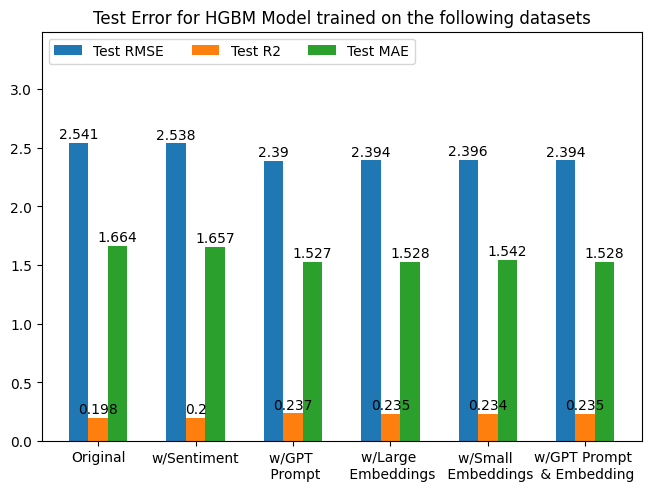

In [ ]:
x_labels = ("Original", "w/Sentiment", "w/GPT \n Prompt", "w/Large \n Embeddings", "w/Small \n Embeddings", "w/GPT Prompt \n & Embedding")

results = {
    "Test RMSE" : (round(np.mean(og_model[1]),3), round(np.mean(sentiment_model[1]),3), round(np.mean(prompt_model[1]),3), round(np.mean(large_embedding_model[1]),3), round(np.mean(small_embedding_model[1]),3), round(np.mean(both_model[1]),3)),
    "Test R2" : (round(np.mean(og_model[3]),3), round(np.mean(sentiment_model[3]),3), round(np.mean(prompt_model[3]),3), round(np.mean(large_embedding_model[3]),3), round(np.mean(small_embedding_model[3]),3), round(np.mean(both_model[3]),3)),
    "Test MAE" : (round(np.mean(og_model[5]),3), round(np.mean(sentiment_model[5]),3), round(np.mean(prompt_model[5]),3), round(np.mean(large_embedding_model[5]),3), round(np.mean(small_embedding_model[5]),3),round(np.mean(both_model[5]),3))
}

x = np.arange(len(x_labels)) * 5
width = 1
mult = 0
fig, ax = plt.subplots(layout = 'constrained')

for attribute, measurement in results.items():
    offset = width * mult
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    mult += 1

# ax.set_ylabel("Error")
ax.set_title("Test Error for HGBM Model trained on the following datasets")
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 3.49)
plt.show()

In [ ]:
sentiment_model = test_model("rf", sentiment_all_train_data, sentiment_all_test_data, False, None, "sum", None)
og_model = test_model("rf", chelsea_wolves_arsenal_23_24, chelsea_wolves_arsenal_24_25, False, None, None, None)
prompt_model = test_model("rf", llm_merged_all_train_data, llm_merged_all_test_data, False, None, None, "prompt")
large_embedding_model = test_model("rf", llm_merged_all_train_data, llm_merged_all_test_data, False, None, None, "large embedding")
small_embedding_model = test_model("rf", llm_merged_all_train_data, llm_merged_all_test_data, False, None, None, "small embedding")
both_model = test_model("rf", llm_merged_all_train_data.sample, llm_merged_all_test_data, False, None, None, "both")